In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import missingno as msno

In [2]:
data=pd.read_csv('city_day.csv')

In [3]:
data.head()

State       City station                  StationName  Status  \
0  Gujarat  Ahmedabad   GJ001  Maninagar, Ahmedabad - GPCB  Active   
1  Gujarat  Ahmedabad   GJ001  Maninagar, Ahmedabad - GPCB  Active   
2  Gujarat  Ahmedabad   GJ001  Maninagar, Ahmedabad - GPCB  Active   
3  Gujarat  Ahmedabad   GJ001  Maninagar, Ahmedabad - GPCB  Active   
4  Gujarat  Ahmedabad   GJ001  Maninagar, Ahmedabad - GPCB  Active   

         Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
0  01-01-2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64  133.36   
1  02-01-2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   34.06   
2  03-01-2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   30.70   
3  04-01-2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   36.08   
4  05-01-2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   39.31   

   Benzene  Toluene  Xylene  AQI AQI_Bucket  
0     0.00     0.02    0.00  NaN        NaN  
1     3.68     5.50    3.77  NaN        NaN  
2     6.80    16.40    2.25  NaN        NaN  
3     4.43    10.14    1.00  NaN        NaN  
4     7.01    18.89    2.78  NaN        NaN

# Exploratory Data Analysis

In [4]:
data.shape

(29531, 20)

In [5]:
data.isna().sum()

State              0
City               0
station            0
StationName        0
Status           324
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
dtype: int64

15 columns out of 20 has null values in it

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        29531 non-null  object 
 1   City         29531 non-null  object 
 2   station      29531 non-null  object 
 3   StationName  29531 non-null  object 
 4   Status       29207 non-null  object 
 5   Date         29531 non-null  object 
 6   PM2.5        24933 non-null  float64
 7   PM10         18391 non-null  float64
 8   NO           25949 non-null  float64
 9   NO2          25946 non-null  float64
 10  NOx          25346 non-null  float64
 11  NH3          19203 non-null  float64
 12  CO           27472 non-null  float64
 13  SO2          25677 non-null  float64
 14  O3           25509 non-null  float64
 15  Benzene      23908 non-null  float64
 16  Toluene      21490 non-null  float64
 17  Xylene       11422 non-null  float64
 18  AQI          24850 non-null  float64
 19  AQI_

Out of the 20 attributes of the dataset,7 are of 'object' datatype and rest 13 are of 'float' datatype.

In [7]:
data.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [8]:
data.State.unique()

array(['Gujarat', 'Mizoram', 'Andhra Pradesh', 'Punjab', 'Karnataka',
       'Madhya Pradesh', 'Odisha', 'Chandigarh', 'Tamilnadu', 'Delhi',
       'Kerala', 'Haryana', 'Assam', 'Telengana', 'Rajasthan',
       'Jharkhand', 'kerala', 'West Bengal', 'Uttar Pradesh',
       'Maharashtra', 'Bihar', 'Meghalaya'], dtype=object)

In [9]:
data['State'].value_counts()

Andhra Pradesh    2413
Tamilnadu         2395
Gujarat           2009
Karnataka         2009
Maharashtra       2009
Uttar Pradesh     2009
Delhi             2009
Telengana         2006
Odisha            1863
Bihar             1858
Haryana           1679
Kerala            1355
Punjab            1221
Jharkhand         1169
Rajasthan         1114
West Bengal        814
Assam              502
Meghalaya          310
Chandigarh         304
Madhya Pradesh     289
Mizoram            113
kerala              81
Name: State, dtype: int64

Kerala data is counted twice.Hence replacing 'kerala' with 'Kerala'

In [10]:
data.loc[data["State"] == "kerala", "State"] = 'Kerala'

In [11]:
print(data['State'].unique())
print(data['State'].value_counts())

['Gujarat' 'Mizoram' 'Andhra Pradesh' 'Punjab' 'Karnataka'
 'Madhya Pradesh' 'Odisha' 'Chandigarh' 'Tamilnadu' 'Delhi' 'Kerala'
 'Haryana' 'Assam' 'Telengana' 'Rajasthan' 'Jharkhand' 'West Bengal'
 'Uttar Pradesh' 'Maharashtra' 'Bihar' 'Meghalaya']
Andhra Pradesh    2413
Tamilnadu         2395
Gujarat           2009
Karnataka         2009
Maharashtra       2009
Uttar Pradesh     2009
Delhi             2009
Telengana         2006
Odisha            1863
Bihar             1858
Haryana           1679
Kerala            1436
Punjab            1221
Jharkhand         1169
Rajasthan         1114
West Bengal        814
Assam              502
Meghalaya          310
Chandigarh         304
Madhya Pradesh     289
Mizoram            113
Name: State, dtype: int64


<AxesSubplot:>

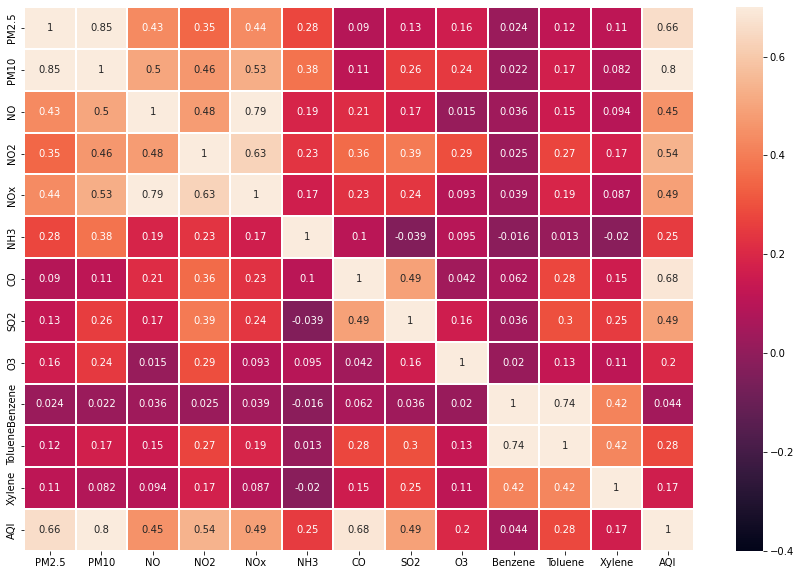

In [12]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin= -0.4,vmax=.7,annot=True,linewidth=0.3)

- We should find that there is a PM2.5- PM10 , NOx-NO, NOx-NO2, Benzene-Toluene are positively co-related

## Identifying major pollutants and concentration in each city

([<matplotlib.patches.Wedge at 0x162cf72f070>,
 [Text(-1.0329446755118679, -0.3781868550487737, 'NO'),
  Text(-0.3235708424829275, -1.0513333961664533, 'NO2'),
  Text(0.8629833278136636, -0.6820995351967741, 'NOx'),
  Text(1.048099493243424, 0.3338973678585654, 'NH3'),
  Text(0.8391992815762234, 0.7111572018913617, 'CO'),
  Text(0.5590246290294517, 0.9473602610087062, 'SO2'),
  Text(-0.4597347640780949, 0.9993217433329762, 'O3'),
  Text(-1.0122482017330416, 0.43052709332656813, 'Benzene'),
  Text(-1.07853531188145, 0.2162442624089334, 'Toluene'),
  Text(-1.0995994565001022, 0.02968223820199599, 'Xylene')],
 [Text(-0.5634243684610188, -0.2062837391175129, '11.2%'),
  Text(-0.17649318680886952, -0.5734545797271563, '18.2%'),
  Text(0.4707181788074528, -0.3720542919255131, '20.1%'),
  Text(0.5716906326782312, 0.18212583701376292, '11.0%'),
  Text(0.4577450626779399, 0.38790392830437903, '1.5%'),
  Text(0.3049225249251555, 0.5167419605502034, '9.1%'),
  Text(-0.2507644167698699, 0.54508458

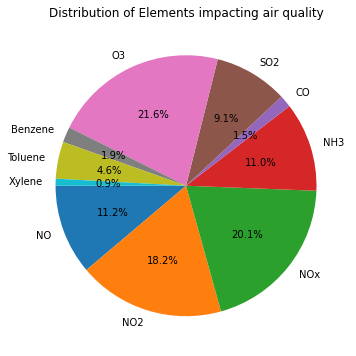

In [13]:
#Distribustion of Elements which are impacting air quality
Pollutants_list = ['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
pollutants = data[Pollutants_list].sum()
plt.figure(figsize=(12,6))
plt.title('Distribution of Elements impacting air quality')
plt.pie(pollutants, labels=pollutants.index, autopct='%1.1f%%', startangle=180)

[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Aizawl'),
 Text(2, 0, 'Amaravati'),
 Text(3, 0, 'Amritsar'),
 Text(4, 0, 'Bengaluru'),
 Text(5, 0, 'Bhopal'),
 Text(6, 0, 'Brajrajnagar'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Chennai'),
 Text(9, 0, 'Coimbatore'),
 Text(10, 0, 'Delhi'),
 Text(11, 0, 'Ernakulam'),
 Text(12, 0, 'Gurugram'),
 Text(13, 0, 'Guwahati'),
 Text(14, 0, 'Hyderabad'),
 Text(15, 0, 'Jaipur'),
 Text(16, 0, 'Jorapokhar'),
 Text(17, 0, 'Kochi'),
 Text(18, 0, 'Kolkata'),
 Text(19, 0, 'Lucknow'),
 Text(20, 0, 'Mumbai'),
 Text(21, 0, 'Patna'),
 Text(22, 0, 'Shillong'),
 Text(23, 0, 'Talcher'),
 Text(24, 0, 'Thiruvananthapuram'),
 Text(25, 0, 'Visakhapatnam')]

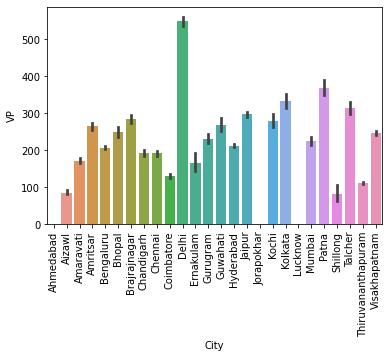

In [14]:
#Study of effect of industry pollutants and vehicle pollutants 
data1=data.copy()
data1['VP'] = data1['PM2.5']+data1['PM10']+data1['NO']+data1['NO2']+data1['NOx']+data1['NH3']+data1['CO']
ax=sns.barplot('City','VP',data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)



Vehicle pollution is highest in Delhi and least in Aizawl

[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Aizawl'),
 Text(2, 0, 'Amaravati'),
 Text(3, 0, 'Amritsar'),
 Text(4, 0, 'Bengaluru'),
 Text(5, 0, 'Bhopal'),
 Text(6, 0, 'Brajrajnagar'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Chennai'),
 Text(9, 0, 'Coimbatore'),
 Text(10, 0, 'Delhi'),
 Text(11, 0, 'Ernakulam'),
 Text(12, 0, 'Gurugram'),
 Text(13, 0, 'Guwahati'),
 Text(14, 0, 'Hyderabad'),
 Text(15, 0, 'Jaipur'),
 Text(16, 0, 'Jorapokhar'),
 Text(17, 0, 'Kochi'),
 Text(18, 0, 'Kolkata'),
 Text(19, 0, 'Lucknow'),
 Text(20, 0, 'Mumbai'),
 Text(21, 0, 'Patna'),
 Text(22, 0, 'Shillong'),
 Text(23, 0, 'Talcher'),
 Text(24, 0, 'Thiruvananthapuram'),
 Text(25, 0, 'Visakhapatnam')]

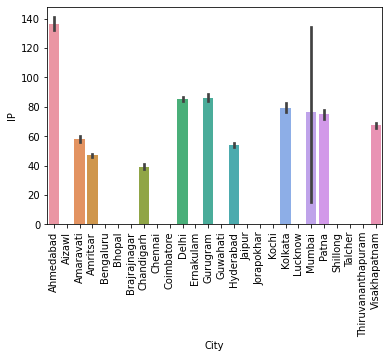

In [15]:
data1['IP']=data1['SO2']+data1['O3']+data1['Benzene']+data1['Toluene']+data1['Xylene']
ax=sns.barplot('City','IP',data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Industry pollution is highest in Ahmedabad and Shillong and least in Kochi

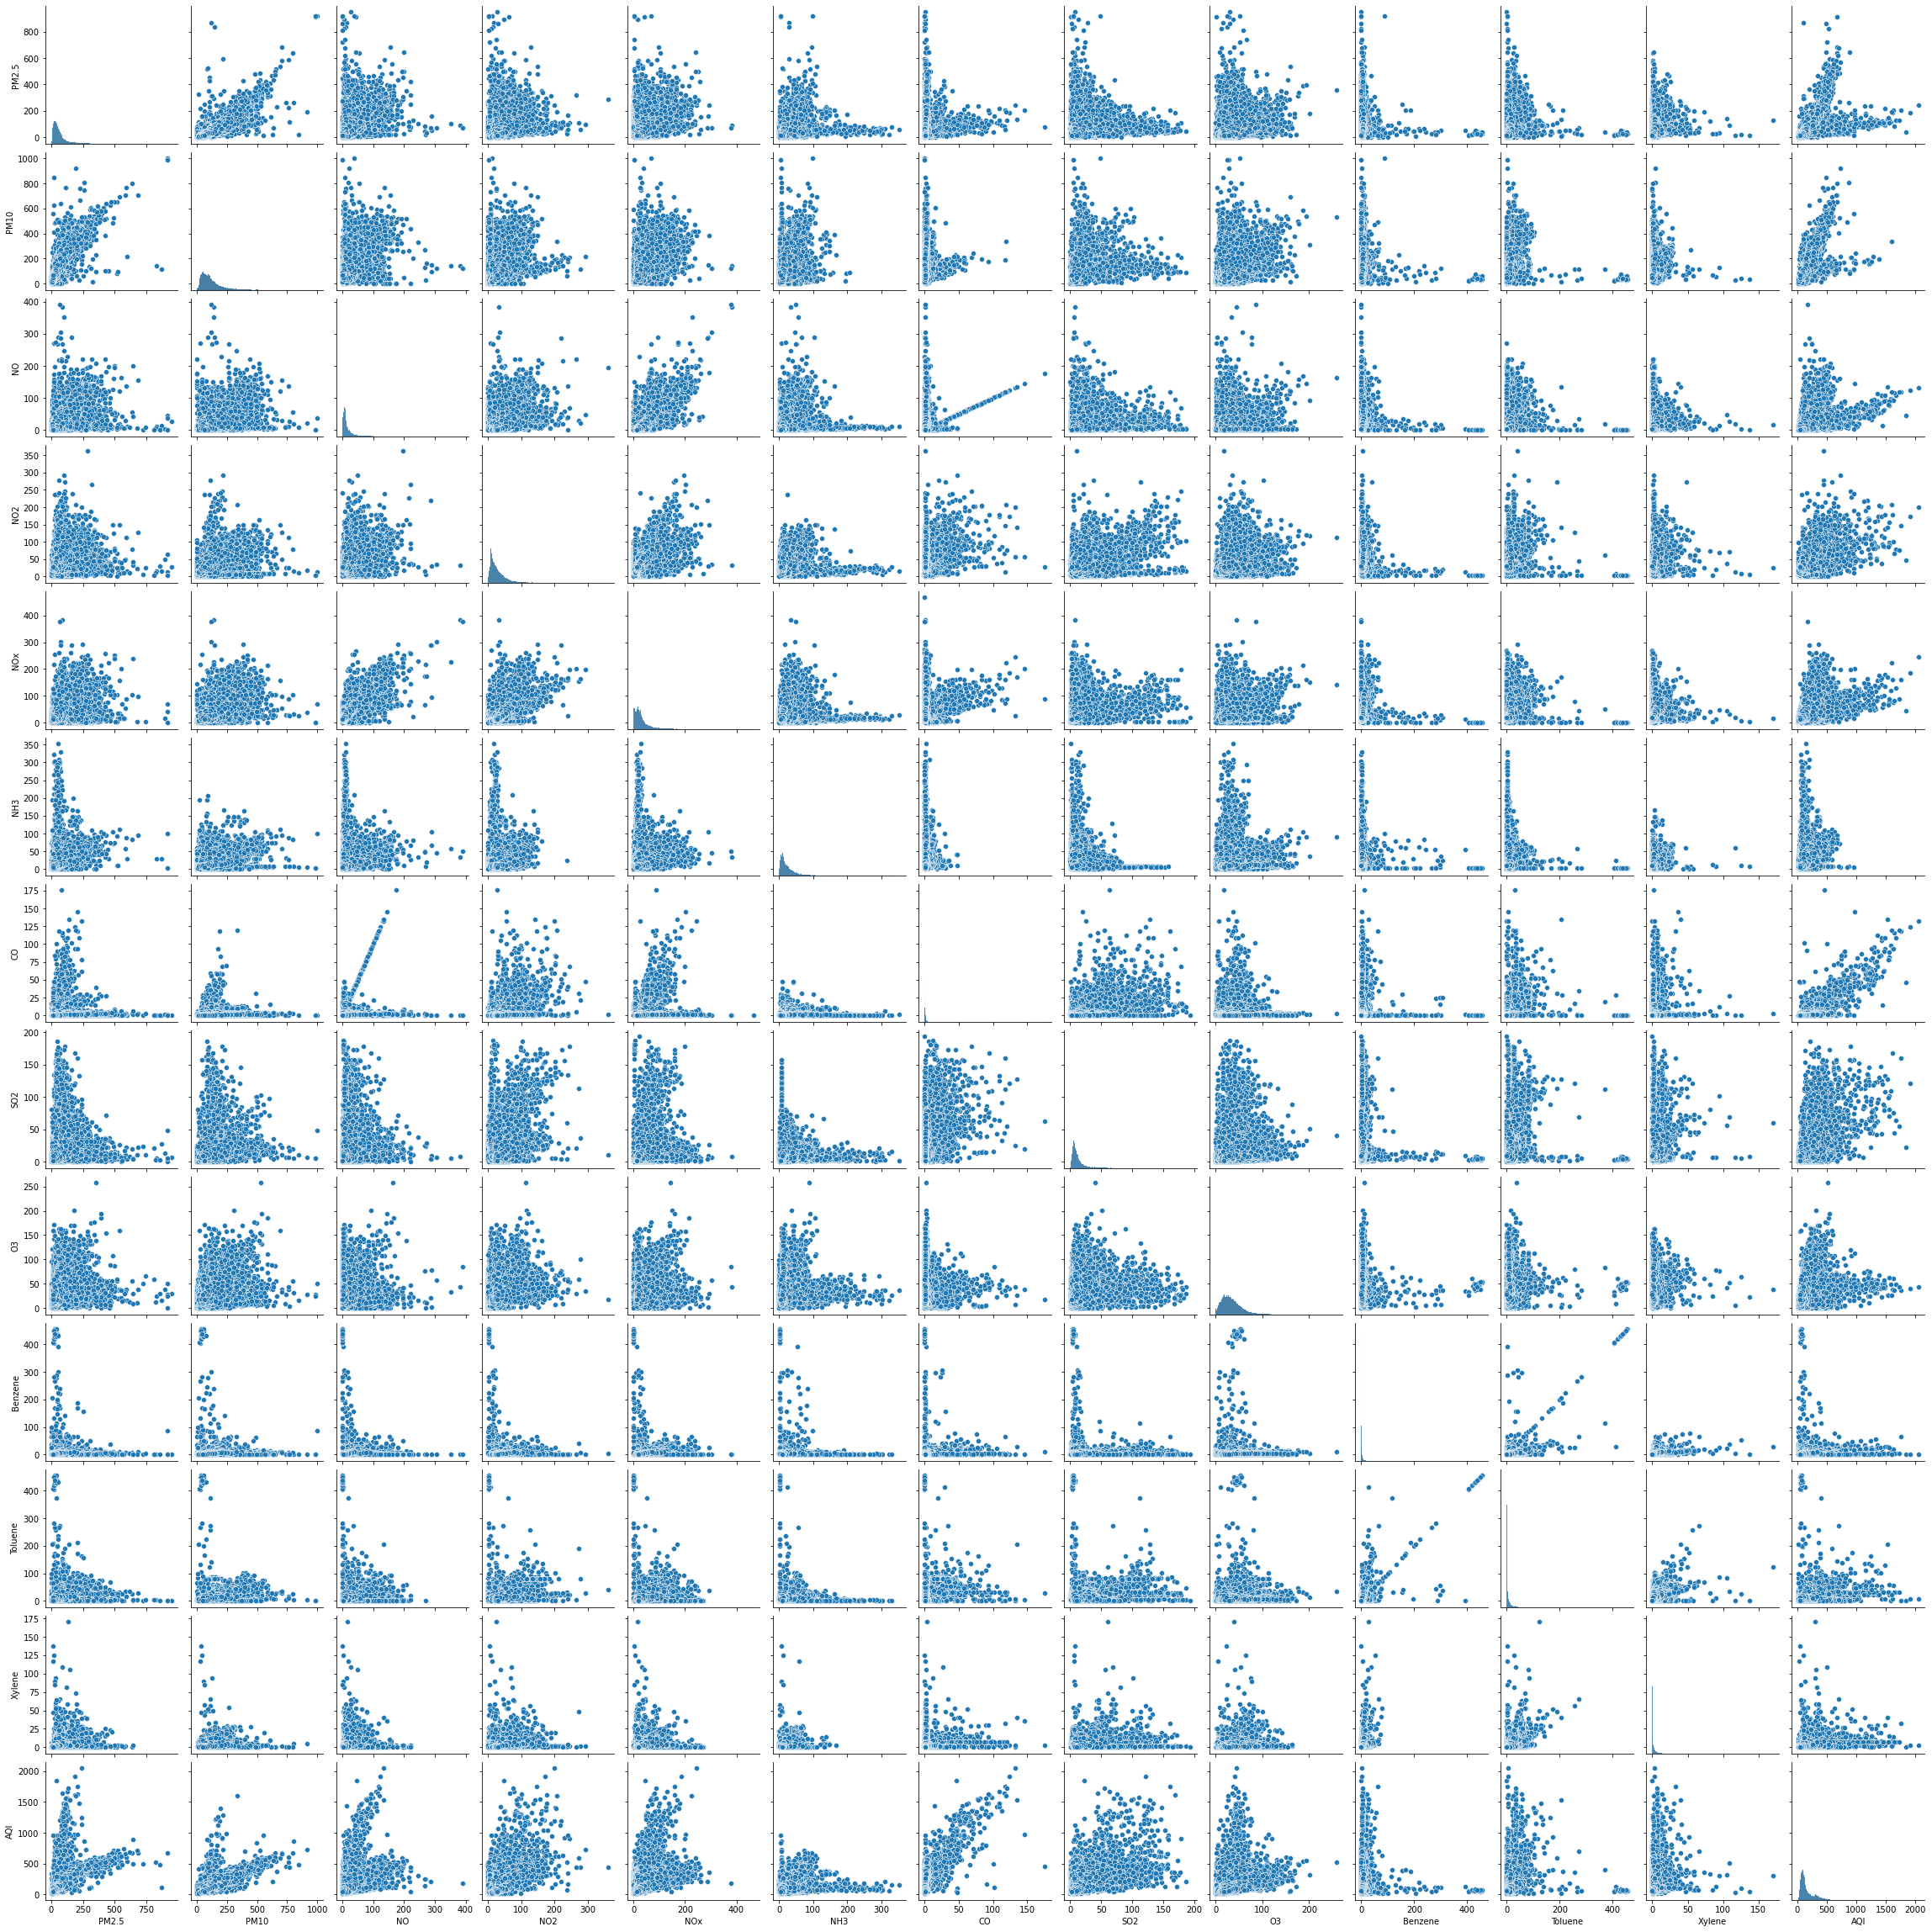

In [16]:
#Univariate and bivariate analysis using pair plotting
sns.pairplot(data)

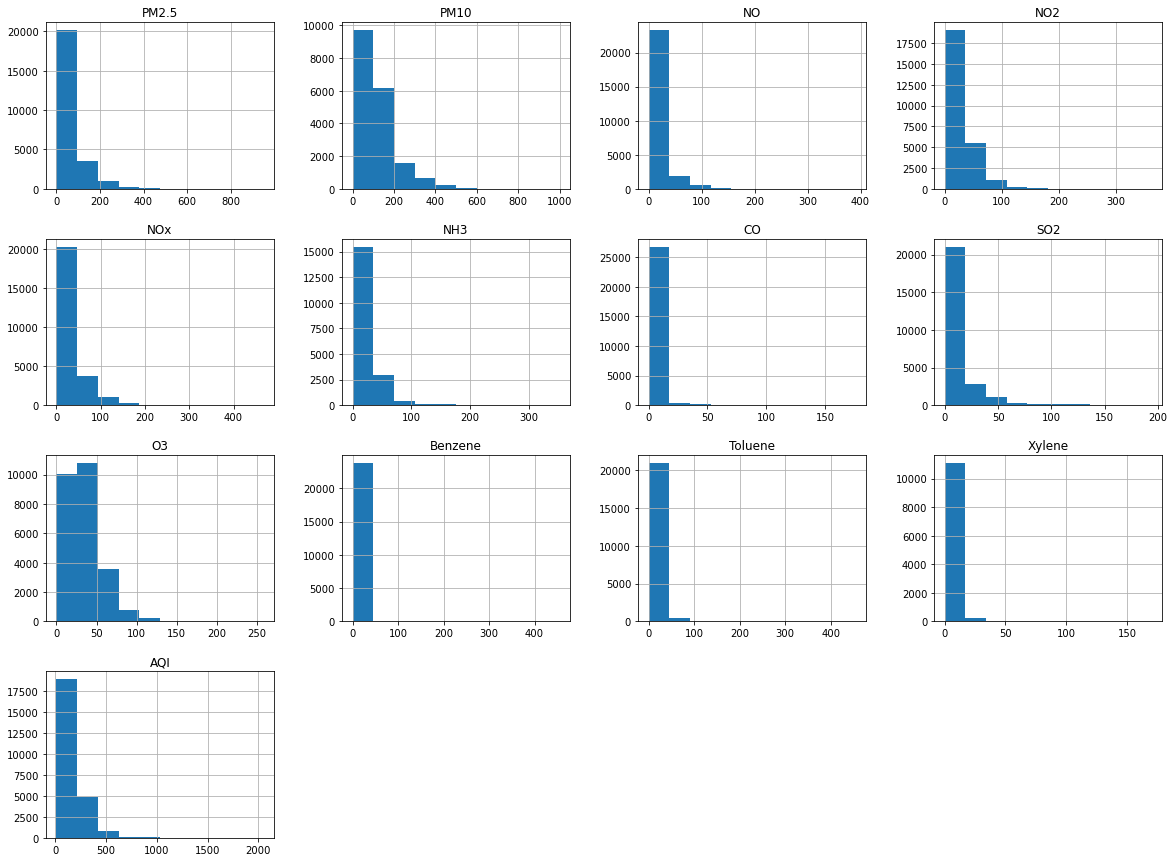

In [17]:
# frequency distribution of the pollutants before filling missing value

freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

All the graphs are right-screwed

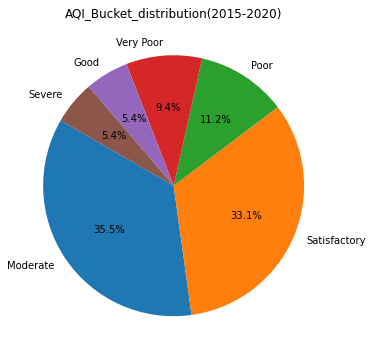

In [18]:
# count graph of the categorical features before filling missing value
#piechart on AQI_Bucket_distribution(2015-2020)
AQI_Bucket_distribution =data.AQI_Bucket.value_counts()
plt.figure(figsize=(10,6))
plt.title('AQI_Bucket_distribution(2015-2020)')
plt.pie(AQI_Bucket_distribution, labels=AQI_Bucket_distribution.index, autopct='%1.1f%%', startangle=150);

Text(0.5, 1.0, 'AQI')

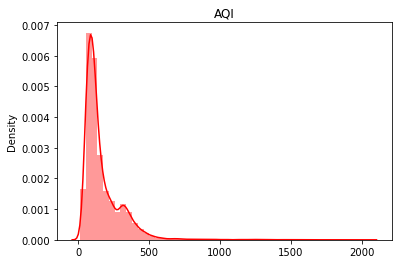

In [19]:
# distplot Air Quality Index per density
sns.distplot(x=data['AQI'],color='red')
plt.title('AQI')

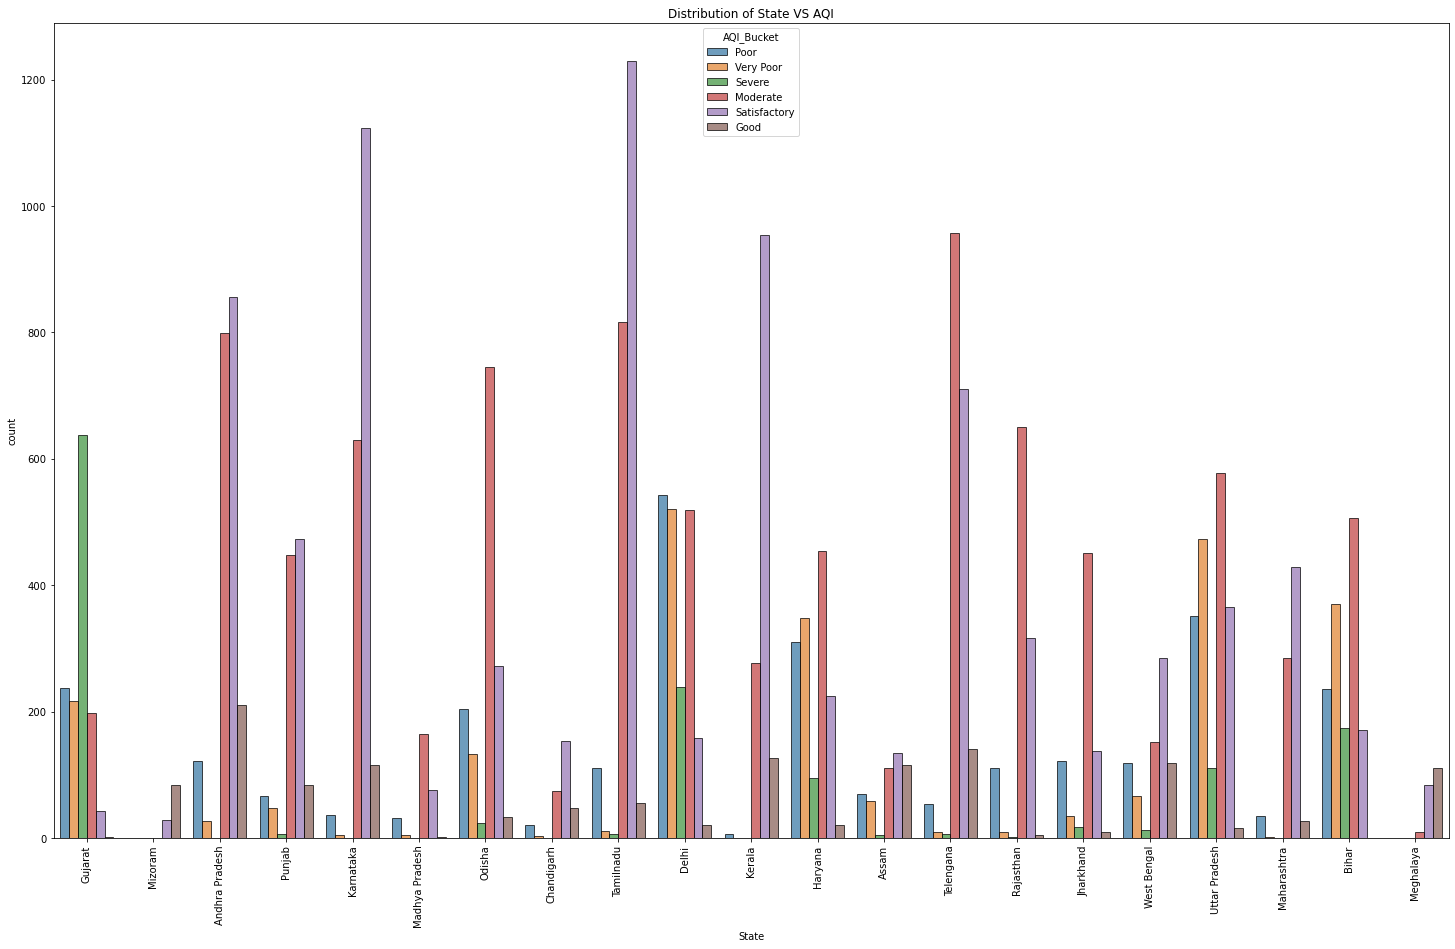

In [20]:
plt.figure(figsize=[25,15])
sns.countplot(x='State',hue='AQI_Bucket',edgecolor="black", alpha=0.7, data=data)
plt.title('Distribution of State VS AQI')
plt.xticks(rotation=90) 
plt.show()

Most of the datas of Gujarat contain severe AQI and All the states there are only few good AQI index when cpmapred to the rest of the indexs.

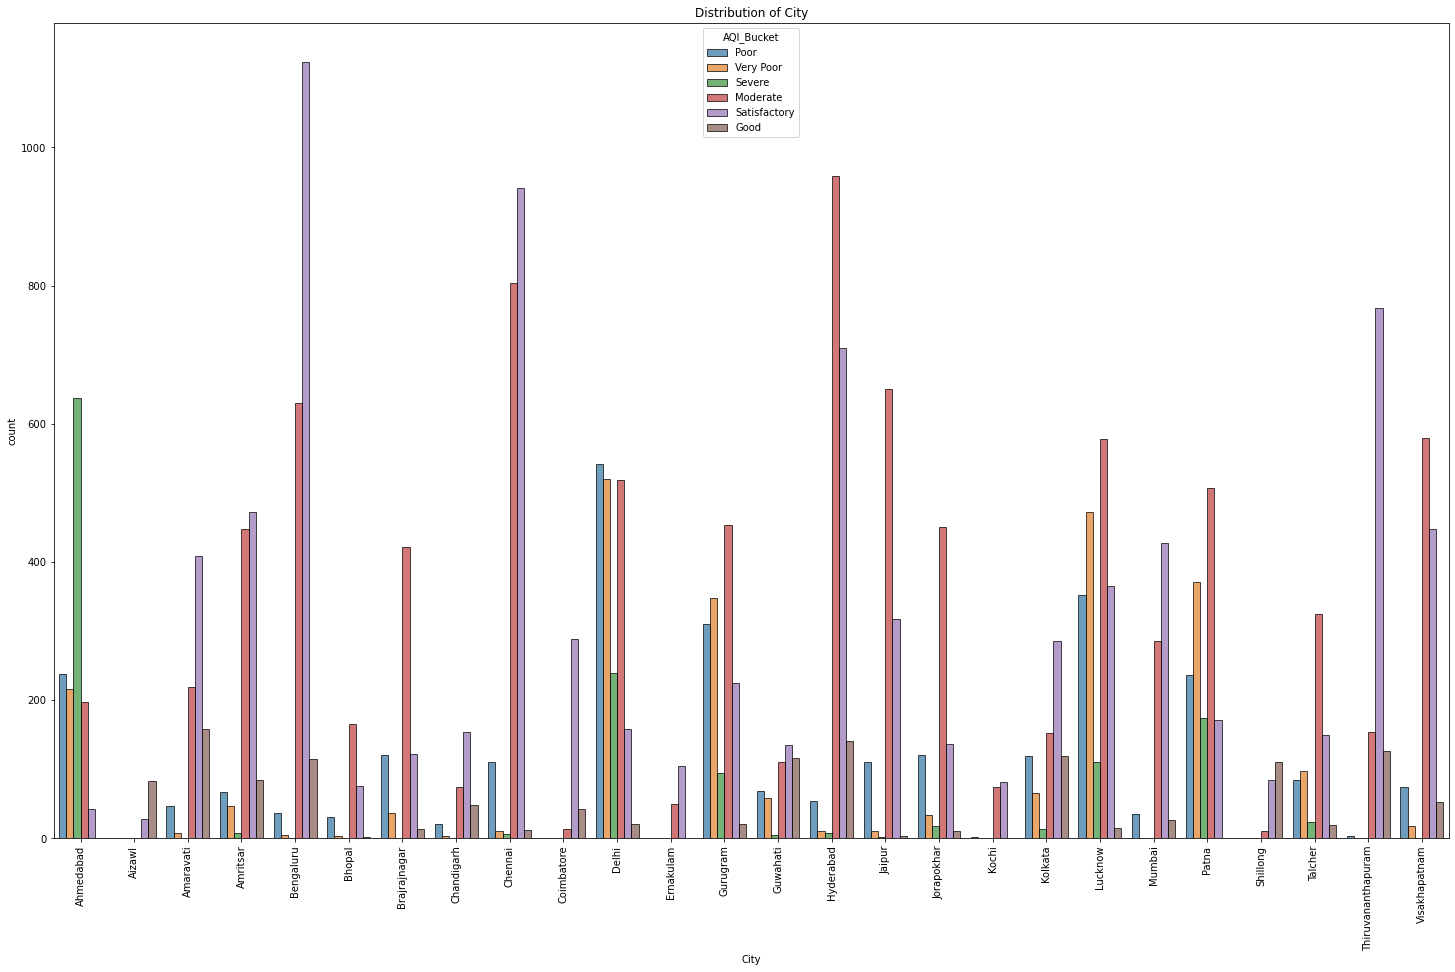

In [21]:
plt.figure(figsize=[25,15])
sns.countplot(x='City',hue='AQI_Bucket',edgecolor="black", alpha=0.7, data=data)
plt.title('Distribution of City')
plt.xticks(rotation=90) 
plt.show()

Most of the cities have either moderate or satisfactory AQI indexes expect for Ahmedabad from 2015-2020 

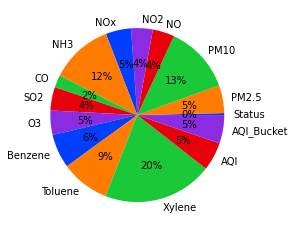

In [22]:
data1=[324,4598,11140,3582,3585,4185,10328,2059,3854,4022,5623,8041,18109,4681,4681]
labels = ['Status','PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

colors=sns.color_palette('bright')[0:5]
plt.pie(data1,labels=labels,colors=colors,autopct='%.0f%%')
plt.show()

Above graph shows the percentage of distribution of null values present in each feature. We should find that Xylene has the most number of null value percentage

# Data Pre-processing

## Handling Missing  Value, Feature Reduction, Feature ENgineering

In [23]:
data.isna().sum()

State              0
City               0
station            0
StationName        0
Status           324
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
dtype: int64

<AxesSubplot:>

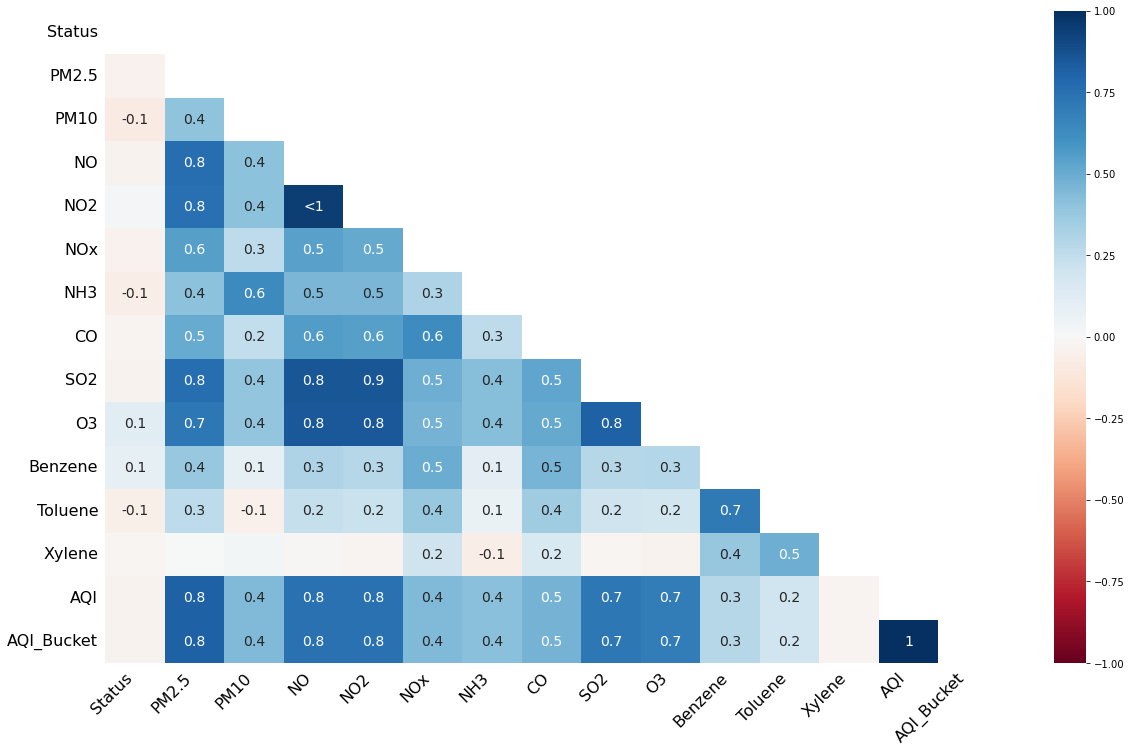

In [24]:
#visualization of missing data 
msno.heatmap(data)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        29531 non-null  object 
 1   City         29531 non-null  object 
 2   station      29531 non-null  object 
 3   StationName  29531 non-null  object 
 4   Status       29207 non-null  object 
 5   Date         29531 non-null  object 
 6   PM2.5        24933 non-null  float64
 7   PM10         18391 non-null  float64
 8   NO           25949 non-null  float64
 9   NO2          25946 non-null  float64
 10  NOx          25346 non-null  float64
 11  NH3          19203 non-null  float64
 12  CO           27472 non-null  float64
 13  SO2          25677 non-null  float64
 14  O3           25509 non-null  float64
 15  Benzene      23908 non-null  float64
 16  Toluene      21490 non-null  float64
 17  Xylene       11422 non-null  float64
 18  AQI          24850 non-null  float64
 19  AQI_

In [26]:
# % of null value in each column

null_values_percent=(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
null_values_percent

Xylene         61.322001
PM10           37.723071
NH3            34.973418
Toluene        27.229014
Benzene        19.041008
AQI_Bucket     15.851139
AQI            15.851139
PM2.5          15.570079
NOx            14.171549
O3             13.619586
SO2            13.050692
NO2            12.139785
NO             12.129626
CO              6.972334
Status          1.097152
City            0.000000
Date            0.000000
StationName     0.000000
station         0.000000
State           0.000000
dtype: float64

- About 60% of the Xylene feature has null values.Hence it is better to drop the column as it is a least effective AQI pollutant
- Also, since it is a time series it is not good to remove/drop any null value rows as it may affect the prediction.

In [27]:
#Converting dtype of date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].apply(lambda x:x.year)
data['month'] = data['Date'].apply(lambda x:x.month)
data['day'] = data['Date'].apply(lambda x:x.day)

In [28]:
data=data.drop(['Date','station','StationName','Status'],axis=1)

- All the value of status are 'Active' hence it is irrelevant for modeling
- In our model we are trying to predict the AQI of the City hence Station and Station name is irrelavant

In [29]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day'],
      dtype='object')

In [30]:
data.head()

State       City  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Gujarat  Ahmedabad    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Gujarat  Ahmedabad    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Gujarat  Ahmedabad    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Gujarat  Ahmedabad    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Gujarat  Ahmedabad    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  month  day  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015      1    1  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015      2    1  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015      3    1  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015      4    1  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015      5    1

<AxesSubplot:>

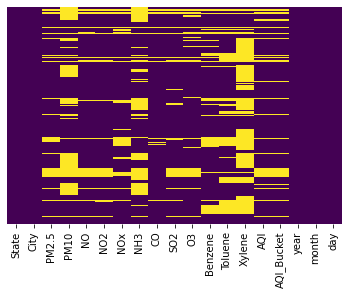

In [31]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
data.iloc[:,2:14]=data.groupby(['City','year','month']).transform(lambda x:x.fillna(x.mean()))

In [33]:
data.head()

State       City       PM2.5  PM10     NO    NO2    NOx  NH3     CO  \
0  Gujarat  Ahmedabad   75.562308   NaN   0.92  18.22  17.15  NaN   0.92   
1  Gujarat  Ahmedabad  112.385217   NaN   0.97  15.69  16.46  NaN   0.97   
2  Gujarat  Ahmedabad  107.799655   NaN  17.40  19.30  29.70  NaN  17.40   
3  Gujarat  Ahmedabad   95.540714   NaN   1.70  18.48  17.97  NaN   1.70   
4  Gujarat  Ahmedabad   83.405172   NaN  22.10  21.42  37.76  NaN  22.10   

     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  month  day  
0  27.64  133.36     0.00     0.02    0.00  NaN        NaN  2015      1    1  
1  24.55   34.06     3.68     5.50    3.77  NaN        NaN  2015      2    1  
2  29.07   30.70     6.80    16.40    2.25  NaN        NaN  2015      3    1  
3  18.59   36.08     4.43    10.14    1.00  NaN        NaN  2015      4    1  
4  39.33   39.31     7.01    18.89    2.78  NaN        NaN  2015      5    1

<AxesSubplot:>

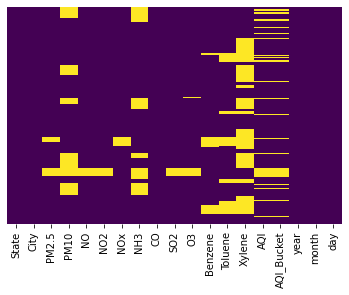

In [34]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
data.iloc[:,2:14]=data.groupby(['City','year']).transform(lambda x:x.fillna(x.mean()))

In [36]:
data.iloc[:,2:14]=data.groupby('City').transform(lambda x:x.fillna(x.mean()))

<AxesSubplot:>

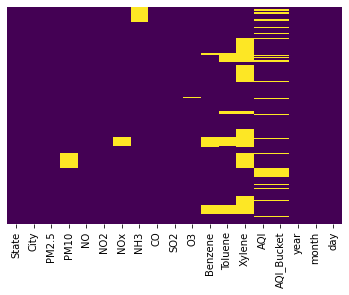

In [37]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
data.head()

State       City       PM2.5       PM10     NO    NO2    NOx  NH3     CO  \
0  Gujarat  Ahmedabad   75.562308  113.39947   0.92  18.22  17.15  NaN   0.92   
1  Gujarat  Ahmedabad  112.385217  113.39947   0.97  15.69  16.46  NaN   0.97   
2  Gujarat  Ahmedabad  107.799655  113.39947  17.40  19.30  29.70  NaN  17.40   
3  Gujarat  Ahmedabad   95.540714  113.39947   1.70  18.48  17.97  NaN   1.70   
4  Gujarat  Ahmedabad   83.405172  113.39947  22.10  21.42  37.76  NaN  22.10   

     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  month  day  
0  27.64  133.36     0.00     0.02    0.00  NaN        NaN  2015      1    1  
1  24.55   34.06     3.68     5.50    3.77  NaN        NaN  2015      2    1  
2  29.07   30.70     6.80    16.40    2.25  NaN        NaN  2015      3    1  
3  18.59   36.08     4.43    10.14    1.00  NaN        NaN  2015      4    1  
4  39.33   39.31     7.01    18.89    2.78  NaN        NaN  2015      5    1

In [39]:
data.loc[:,2:14]=data.fillna(data.mean())

In [40]:
data.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      66.925005    123.356776     18.467196     28.540408     32.625315   
std       61.442120     83.921679     22.359100     23.949649     30.138505   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       31.309000     64.623793      6.030000     12.005000     14.105000   
50%       49.620000    107.461429     10.670000     22.570000     25.370000   
75%       78.685000    152.860000     23.430000     36.768000     39.960000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      24.900495      2.561965     17.392552     33.951188      3.353751   
std       26.027411      7.415206     22.095036     20.855935     14.424344   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       10.663333      0.520000      5.970000     18.870000      0.190000   
50%       20.910000      0.910000      9.920000     29.890000      1.460000   
75%       29.870000      1.520000     17.760000     44.125000      3.353751   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI          year         month  \
count  29531.000000  29531.000000  24850.000000  29531.000000  29531.000000   
mean       8.343374      3.047685    166.463581   2017.887914      6.362771   
std       17.562157      4.169401    140.696585      1.533783      3.444773   
min        0.000000      0.000000     13.000000   2015.000000      1.000000   
25%        0.680000      0.810000     81.000000   2017.000000      3.000000   
50%        4.010000      3.047685    118.000000   2018.000000      6.000000   
75%        8.343374      3.047685    208.000000   2019.000000      9.000000   
max      454.850000    170.370000   2049.000000   2020.000000     12.000000   

                day  
count  29531.000000  
mean      15.667129  
std        8.901108  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000

In [41]:
data.tail()

State           City  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Andhra Pradesh  Visakhapatnam  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Andhra Pradesh  Visakhapatnam  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Andhra Pradesh  Visakhapatnam  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Andhra Pradesh  Visakhapatnam  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Andhra Pradesh  Visakhapatnam  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  year  \
29526  0.47   8.55  23.30   2.2400   12.070   0.730  41.0          Good  2020   
29527  0.52  12.72  30.14   0.7400    2.210   0.380  70.0  Satisfactory  2020   
29528  0.48   8.42  30.96   0.0100    0.010   0.000  68.0  Satisfactory  2020   
29529  0.52   9.84  28.30   0.0000    0.000   0.000  54.0  Satisfactory  2020   
29530  0.59   2.10  17.05   4.5504    9.396   2.232  50.0          Good  2020   

       month  day  
29526      6   27  
29527      6   28  
29528      6   29  
29529      6   30  
29530      1    7

<AxesSubplot:>

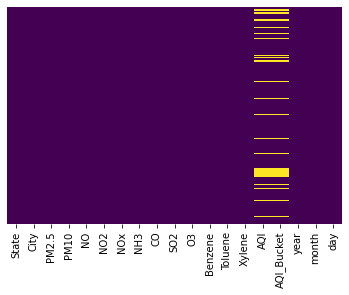

In [42]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

AQI calculation is using the 7 subindex measures:PM2.5,PM10,SO2,NOx,NH3,CO and O3

In [43]:
#PM10 sub_index calculation
def get_PM10_subindex(x):
    if x<=50:
        return x
    elif x>50 and x<=100:
        return x
    elif x>100 and x<=250:
        return 100+(x-100)*100/150
    elif x>250 and x<=350:
        return 200+(x-250)
    elif x>350 and x<=430:
        return 300+(x-350)*100/80
    elif x>430:
        return 400+(x-430)*100/80
    else:
        return 0
data['PM10_subindex']=data['PM10'].astype(int).apply(lambda x:get_PM10_subindex(x))
d1=data[['PM10','PM10_subindex']]
d1.head()

PM10  PM10_subindex
0  113.39947     108.666667
1  113.39947     108.666667
2  113.39947     108.666667
3  113.39947     108.666667
4  113.39947     108.666667

In [44]:
def get_PM25_subindex(x):
    if x<=30:
        return x*50/30
    elif x>30 and x<=60:
        return 50+(x-30)*50/30
    elif x>60 and x<=90:
        return 100+(x-60)*100/30
    elif x>90 and x<=120:
        return 200+(x-90)*100/30
    elif x>120 and x<=250:
        return 300+(x-120)*100/130
    elif x>250:
        return 400+(x-250)*100/130
    else:
        return 0
data['PM2.5_subindex']=data['PM2.5'].astype(int).apply(lambda x:get_PM25_subindex(x))
    

In [45]:
def get_SO2_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=380:
        return 100+(x-80)*100/300
    elif x>380 and x<=800:
        return 200+(x-380)*100/420
    elif x>800 and x<=1600:
        return 300+(x-800)*100/800
    elif x>1600:
        return 400+(x-1600)*100/800
    else:
        return 0
data['SO2_subindex']=data['SO2'].astype(int).apply(lambda x:get_SO2_subindex(x))

In [46]:
def get_NOx_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=180:
        return 100+(x-80)*100/100
    elif x>180 and x<=280:
        return 200+(x-180)*100/100
    elif x>280 and x<=400:
        return 300+(x-280)*100/120
    elif x>400:
        return 400+(x-400)*100/120
    else:
        return 0
data['NOx_subindex']=data['NOx'].astype(int).apply(lambda x:get_NOx_subindex(x))

In [47]:
def get_NH3_subindex(x):
    if x<=200:
        return x*50/200
    elif x>200 and x<=400:
        return 50+(x-200)*50/200
    elif x>400 and x<=800:
        return 100+(x-400)*100/400
    elif x>800 and x<=1200:
        return 200+(x-800)*100/400
    elif x>1200 and x<=1800:
        return 300+(x-1200)*100/600
    elif x>1800:
        return 400+(x-1800)*100/600
    else:
        return 0
data['NH3_subindex']=data['NH3'].astype(int).apply(lambda x:get_NH3_subindex(x))

In [48]:
def get_CO_subindex(x):
    if x<=1:
        return x*50/1
    elif x>1 and x<=2:
        return 50+(x-1)*50/1
    elif x>2 and x<=10:
        return 100+(x-2)*100/8
    elif x>10 and x<=17:
        return 200+(x-10)*100/7
    elif x>17 and x<=34:
        return 300+(x-17)*100/17
    elif x>34:
        return 400+(x-34)*100/17
    else:
        return 0
data['CO_subindex']=data['CO'].astype(int).apply(lambda x:get_CO_subindex(x))

In [49]:
def get_O3_subindex(x):
    if x<=50:
        return x*50/50
    elif x>50 and x<=100:
        return 50+(x-50)*50/50
    elif x>100 and x<=168:
        return 100+(x-100)*100/68
    elif x>168 and x<=208:
        return 200+(x-168)*100/40
    elif x>208 and x<=748:
        return 300+(x-208)*100/539
    elif x>748:
        return 400+(x-400)*100/539
    else:
        return 0
data['O3_subindex']=data['O3'].astype(int).apply(lambda x:get_O3_subindex(x))

In [50]:
data['AQI']=data['AQI'].fillna(round(data[['PM2.5_subindex','PM10_subindex','SO2_subindex','NOx_subindex','NH3_subindex','CO_subindex','O3_subindex']].max(axis=1)))

In [51]:
data.head()

State       City       PM2.5       PM10     NO    NO2    NOx        NH3  \
0  Gujarat  Ahmedabad   75.562308  113.39947   0.92  18.22  17.15  24.900495   
1  Gujarat  Ahmedabad  112.385217  113.39947   0.97  15.69  16.46  24.900495   
2  Gujarat  Ahmedabad  107.799655  113.39947  17.40  19.30  29.70  24.900495   
3  Gujarat  Ahmedabad   95.540714  113.39947   1.70  18.48  17.97  24.900495   
4  Gujarat  Ahmedabad   83.405172  113.39947  22.10  21.42  37.76  24.900495   

      CO    SO2  ...  year  month  day  PM10_subindex  PM2.5_subindex  \
0   0.92  27.64  ...  2015      1    1     108.666667      150.000000   
1   0.97  24.55  ...  2015      2    1     108.666667      273.333333   
2  17.40  29.07  ...  2015      3    1     108.666667      256.666667   
3   1.70  18.59  ...  2015      4    1     108.666667      216.666667   
4  22.10  39.33  ...  2015      5    1     108.666667      176.666667   

  SO2_subindex  NOx_subindex  NH3_subindex  CO_subindex  O3_subindex  
0        33.75         21.25           6.0     0.000000   148.529412  
1        30.00         20.00           6.0     0.000000    34.000000  
2        36.25         36.25           6.0   300.000000    30.000000  
3        22.50         21.25           6.0    50.000000    36.000000  
4        48.75         46.25           6.0   329.411765    39.000000  

[5 rows x 26 columns]

In [52]:
data.AQI.describe()

count    29531.000000
mean       167.350411
std        136.555393
min          9.000000
25%         85.000000
50%        118.000000
75%        212.000000
max       2049.000000
Name: AQI, dtype: float64

In [53]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
data["AQI_Bucket"] = data["AQI_Bucket"].fillna(data["AQI"].apply(lambda x: get_AQI_bucket(x)))

<AxesSubplot:>

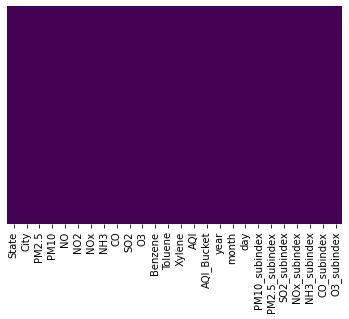

In [54]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

All the null values are filled using mean, and AQI calculation

In [56]:
data.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      66.925005    123.356776     18.467196     28.540408     32.625315   
std       61.442120     83.921679     22.359100     23.949649     30.138505   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       31.309000     64.623793      6.030000     12.005000     14.105000   
50%       49.620000    107.461429     10.670000     22.570000     25.370000   
75%       78.685000    152.860000     23.430000     36.768000     39.960000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      24.900495      2.561965     17.392552     33.951188      3.353751   
std       26.027411      7.415206     22.095036     20.855935     14.424344   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       10.663333      0.520000      5.970000     18.870000      0.190000   
50%       20.910000      0.910000      9.920000     29.890000      1.460000   
75%       29.870000      1.520000     17.760000     44.125000      3.353751   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

       ...          year         month           day  PM10_subindex  \
count  ...  29531.000000  29531.000000  29531.000000   29531.000000   
mean   ...   2017.887914      6.362771     15.667129     112.470808   
std    ...      1.533783      3.444773      8.901108      72.330068   
min    ...   2015.000000      1.000000      1.000000       0.000000   
25%    ...   2017.000000      3.000000      8.000000      64.000000   
50%    ...   2018.000000      6.000000     16.000000     104.666667   
75%    ...   2019.000000      9.000000     23.000000     134.666667   
max    ...   2020.000000     12.000000     31.000000    1112.500000   

       PM2.5_subindex  SO2_subindex  NOx_subindex  NH3_subindex   CO_subindex  \
count    29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean       124.239226     20.223457     39.560205      6.079823     46.029895   
std        108.107763     23.470350     35.199937      6.510279     86.070224   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%         51.666667      6.250000     17.500000      2.500000      0.000000   
50%         81.666667     11.250000     31.250000      5.000000      0.000000   
75%        160.000000     21.250000     48.750000      7.250000     50.000000   
max        937.692308    137.666667    455.833333     88.000000   1229.411765   

        O3_subindex  
count  29531.000000  
mean      33.559006  
std       21.420535  
min        0.000000  
25%       18.000000  
50%       29.000000  
75%       44.000000  
max      309.090909  

[8 rows x 23 columns]

<AxesSubplot:>

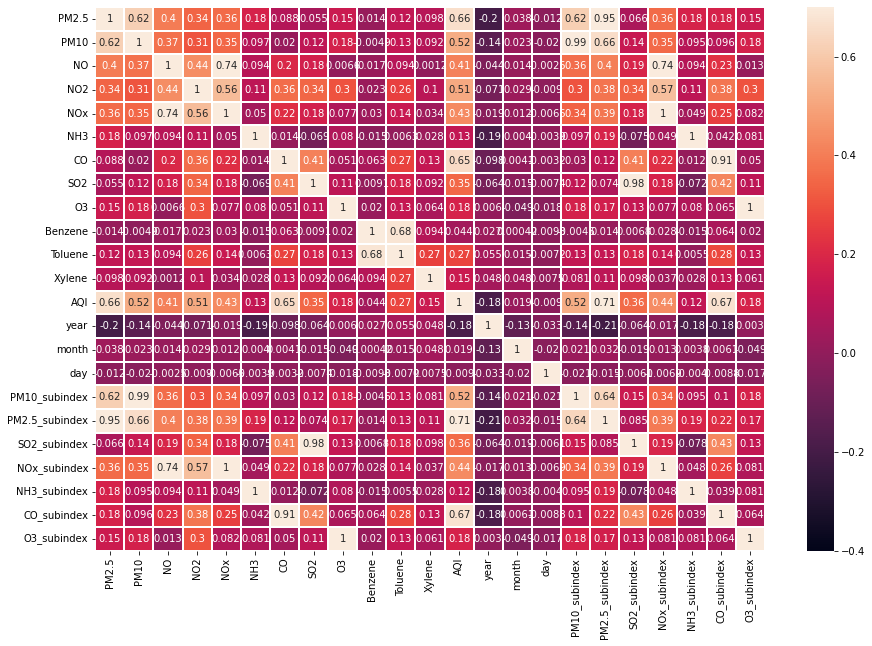

In [57]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin= -0.4,vmax=.7,annot=True,linewidth=0.3)

# Handling outliers

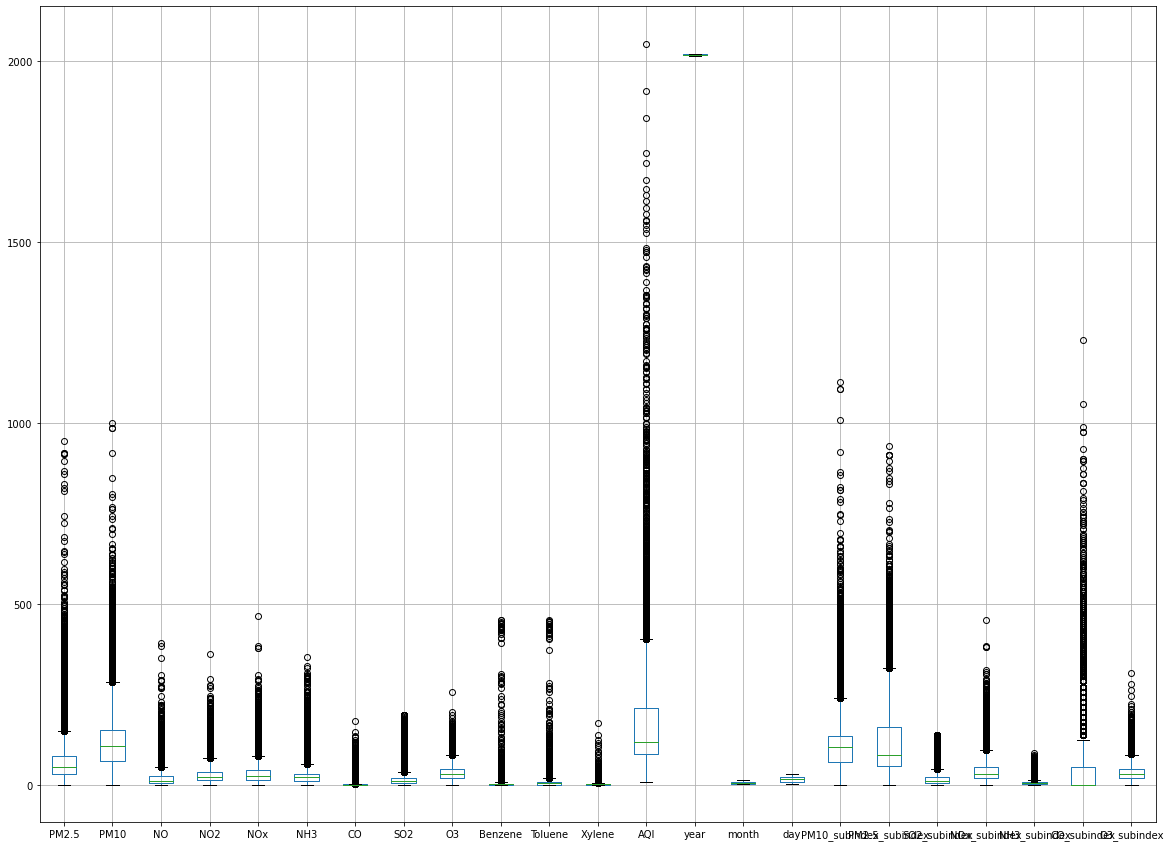

In [58]:
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [59]:
#Outliers count in each column
#data=data.drop(['Date'],axis=1)
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               1405
AQI_Bucket           0
Benzene           1822
CO                2958
CO_subindex       2334
City                 0
NH3               1640
NH3_subindex      1682
NO                2083
NO2               1484
NOx               2147
NOx_subindex      2237
O3                 856
O3_subindex        772
PM10              1547
PM10_subindex     1444
PM2.5             2486
PM2.5_subindex    2482
SO2               3743
SO2_subindex      3707
State                0
Toluene           3280
Xylene            1912
day                  0
month                0
year                 0
dtype: int64


In [60]:
for features in ['Benzene','CO','NH3','NO','NO2','PM2.5','PM10','NOx','O3','SO2','Toluene','Xylene','AQI','CO_subindex','NH3_subindex','NOx_subindex','O3_subindex','PM10_subindex','PM2.5_subindex','SO2_subindex']:
    OF_Q1=data[features].quantile(0.25)
    OF_Q2=data[features].quantile(0.50)
    OF_Q3=data[features].quantile(0.75)
    OF_IQR=OF_Q3-OF_Q1
    OF_low_limit=OF_Q1-1.5*OF_IQR
    OF_up_limit=OF_Q3+1.5*OF_IQR
    OF_outlier=data[(data[features]<OF_low_limit)|(data[features]>OF_low_limit)]
    data[features]=data[features].clip(OF_up_limit,OF_low_limit)

In [61]:
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               0
AQI_Bucket        0
Benzene           0
CO                0
CO_subindex       0
City              0
NH3               0
NH3_subindex      0
NO                0
NO2               0
NOx               0
NOx_subindex      0
O3                0
O3_subindex       0
PM10              0
PM10_subindex     0
PM2.5             0
PM2.5_subindex    0
SO2               0
SO2_subindex      0
State             0
Toluene           0
Xylene            0
day               0
month             0
year              0
dtype: int64


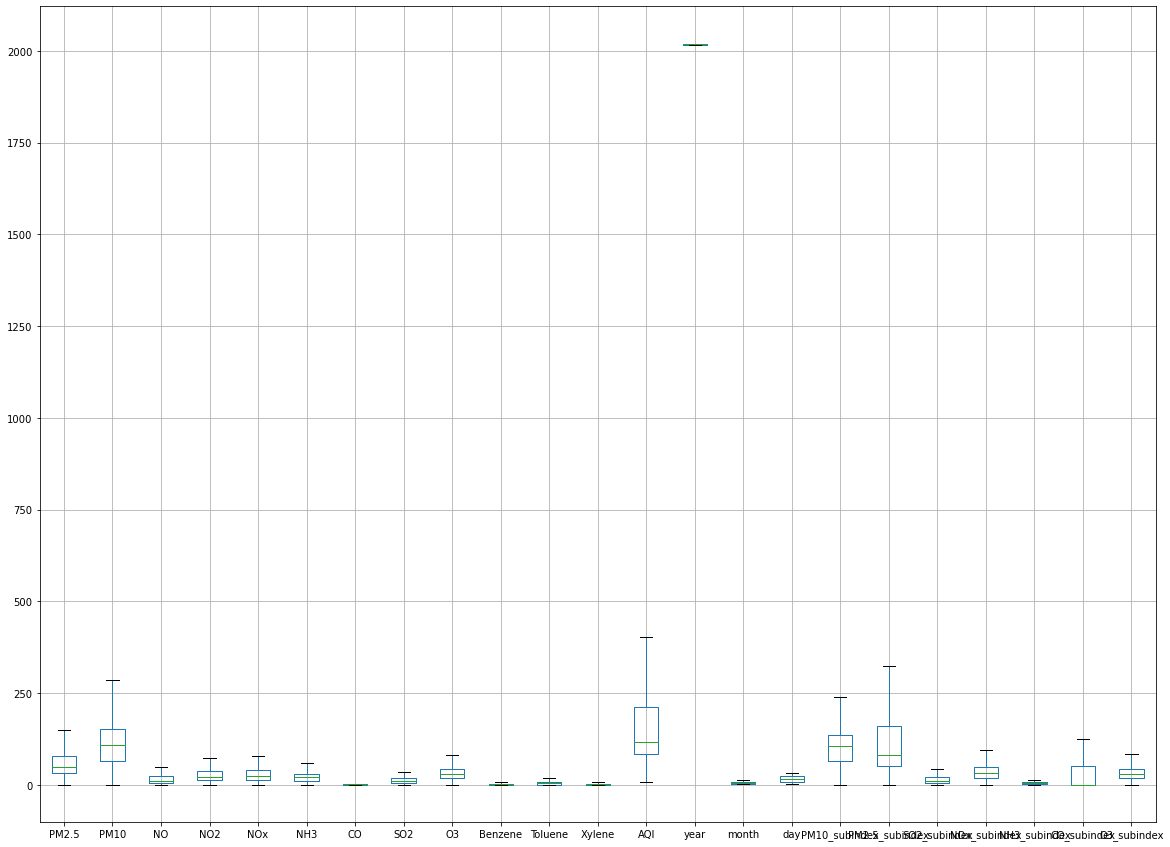

In [62]:
#Finding outliers
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [64]:
#Label encoding
label_encoding = {
    "State":{'Andhra Pradesh':0, 'Assam':1, 'Bihar':2, 'Chandigarh':3, 'Delhi':4, 'Gujarat':5, 'Haryana':6,
 'Jharkhand':7, 'Karnataka':8, 'Kerala':9, 'Madhya Pradesh':10, 'Maharashtra':11,
 'Meghalaya':12, 'Mizoram':13, 'Odisha':14, 'Punjab':15, 'Rajasthan':16, 'Tamilnadu':17,
 'Telengana':18, 'Uttar Pradesh':19, 'West Bengal':20},
    "City":{'Ahmedabad':0, 'Aizawl':1, 'Amaravati':2, 'Amritsar':3, 'Bengaluru':4, 'Bhopal':5,
 'Brajrajnagar':6,'Chandigarh':7, 'Chennai':8, 'Coimbatore':9, 'Delhi':10, 'Ernakulam':11,
 'Gurugram':12, 'Guwahati':13, 'Hyderabad':14, 'Jaipur':15, 'Jorapokhar':16, 'Kochi':17, 'Kolkata':18,
 'Lucknow':19, 'Mumbai':20, 'Patna':21, 'Shillong':22, 'Talcher':23, 'Thiruvananthapuram':24,
 'Visakhapatnam':25}
}

In [65]:
data.head()

State       City       PM2.5       PM10     NO    NO2    NOx        NH3  \
0  Gujarat  Ahmedabad   75.562308  113.39947   0.92  18.22  17.15  24.900495   
1  Gujarat  Ahmedabad  112.385217  113.39947   0.97  15.69  16.46  24.900495   
2  Gujarat  Ahmedabad  107.799655  113.39947  17.40  19.30  29.70  24.900495   
3  Gujarat  Ahmedabad   95.540714  113.39947   1.70  18.48  17.97  24.900495   
4  Gujarat  Ahmedabad   83.405172  113.39947  22.10  21.42  37.76  24.900495   

     CO     SO2  ...  year  month  day  PM10_subindex  PM2.5_subindex  \
0  0.92  27.640  ...  2015      1    1     108.666667      150.000000   
1  0.97  24.550  ...  2015      2    1     108.666667      273.333333   
2  3.02  29.070  ...  2015      3    1     108.666667      256.666667   
3  1.70  18.590  ...  2015      4    1     108.666667      216.666667   
4  3.02  35.445  ...  2015      5    1     108.666667      176.666667   

  SO2_subindex  NOx_subindex  NH3_subindex  CO_subindex  O3_subindex  
0        33.75         21.25           6.0          0.0         83.0  
1        30.00         20.00           6.0          0.0         34.0  
2        36.25         36.25           6.0        125.0         30.0  
3        22.50         21.25           6.0         50.0         36.0  
4        43.75         46.25           6.0        125.0         39.0  

[5 rows x 26 columns]

In [66]:
data=data.replace(label_encoding)

In [67]:
data.head()

State  City       PM2.5       PM10     NO    NO2    NOx        NH3    CO  \
0      5     0   75.562308  113.39947   0.92  18.22  17.15  24.900495  0.92   
1      5     0  112.385217  113.39947   0.97  15.69  16.46  24.900495  0.97   
2      5     0  107.799655  113.39947  17.40  19.30  29.70  24.900495  3.02   
3      5     0   95.540714  113.39947   1.70  18.48  17.97  24.900495  1.70   
4      5     0   83.405172  113.39947  22.10  21.42  37.76  24.900495  3.02   

      SO2  ...  year  month  day  PM10_subindex  PM2.5_subindex SO2_subindex  \
0  27.640  ...  2015      1    1     108.666667      150.000000        33.75   
1  24.550  ...  2015      2    1     108.666667      273.333333        30.00   
2  29.070  ...  2015      3    1     108.666667      256.666667        36.25   
3  18.590  ...  2015      4    1     108.666667      216.666667        22.50   
4  35.445  ...  2015      5    1     108.666667      176.666667        43.75   

   NOx_subindex  NH3_subindex  CO_subindex  O3_subindex  
0         21.25           6.0          0.0         83.0  
1         20.00           6.0          0.0         34.0  
2         36.25           6.0        125.0         30.0  
3         21.25           6.0         50.0         36.0  
4         46.25           6.0        125.0         39.0  

[5 rows x 26 columns]

In [68]:
data['AQI_Bucket'].value_counts()

Moderate        10647
Satisfactory     9496
Poor             3299
Very Poor        3117
Good             1546
Severe           1426
Name: AQI_Bucket, dtype: int64

## Feature Engineering


Our main objective of the model is to predict the AQI of the city in a user friendly manner. Hence it is important that the model should predict AQI of a city on any given month and year.  

In [69]:
y=data['AQI']
X = data[['State','City','year', 'month']]

In [70]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [71]:
pip install nestedhyperboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

In [73]:
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '          Neural Network' : MLPRegressor(),
    '           Random Forest' : RandomForestRegressor(),
    '                Catboost' : CatBoostRegressor(verbose=0),
    '       XGBoost Regressor' : XGBRegressor(),
    '    XGBoost RF Regressor' : XGBRFRegressor(),
    'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression(),
    ' Light Gradient Boosting' : LGBMRegressor(),
    '     KNeighborsRegressor' : KNeighborsRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression(Ridge) trained.
          Neural Network trained.
           Random Forest trained.
                Catboost trained.
       XGBoost Regressor trained.
    XGBoost RF Regressor trained.
Linear Regression(lasso) trained.
       Linear Regression trained.
 Light Gradient Boosting trained.
     KNeighborsRegressor trained.


In [74]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse

def get_r2(y_true,y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [75]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression(Ridge) RMSE: 98.21
          Neural Network RMSE: 94.33
           Random Forest RMSE: 64.46
                Catboost RMSE: 63.86
       XGBoost Regressor RMSE: 63.99
    XGBoost RF Regressor RMSE: 69.15
Linear Regression(lasso) RMSE: 98.20
       Linear Regression RMSE: 98.21
 Light Gradient Boosting RMSE: 64.22
     KNeighborsRegressor RMSE: 69.39


In [76]:
m_name=[]
r_2=[]
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + ' R^2: {:.5f}'.format(r2))
    m_name.append(name)
    r_2.append(r2)
    
d1={'Model':m_name, 'R2_Score':r_2}
d1=pd.DataFrame(d1)
d1 = d1.sort_values(by='R2_Score', ascending=False)

d1

Linear Regression(Ridge) R^2: 0.10262
          Neural Network R^2: 0.17203
           Random Forest R^2: 0.61334
                Catboost R^2: 0.62058
       XGBoost Regressor R^2: 0.61895
    XGBoost RF Regressor R^2: 0.55511
Linear Regression(lasso) R^2: 0.10280
       Linear Regression R^2: 0.10262
 Light Gradient Boosting R^2: 0.61623
     KNeighborsRegressor R^2: 0.55196


Model  R2_Score
3                  Catboost  0.620585
4         XGBoost Regressor  0.618945
8   Light Gradient Boosting  0.616231
2             Random Forest  0.613343
5      XGBoost RF Regressor  0.555111
9       KNeighborsRegressor  0.551957
1            Neural Network  0.172030
6  Linear Regression(lasso)  0.102804
0  Linear Regression(Ridge)  0.102624
7         Linear Regression  0.102624

In [77]:
X.tail()

State  City  year  month
29526      0    25  2020      6
29527      0    25  2020      6
29528      0    25  2020      6
29529      0    25  2020      6
29530      0    25  2020      1

In [78]:
#LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
mse(y_test, lgbm_pred, squared=False)

64.22191002947766

In [79]:
from sklearn.metrics import r2_score
r_square = r2_score(y_test, lgbm_pred)
r_square

0.616231363265193

No handles with labels found to put in legend.


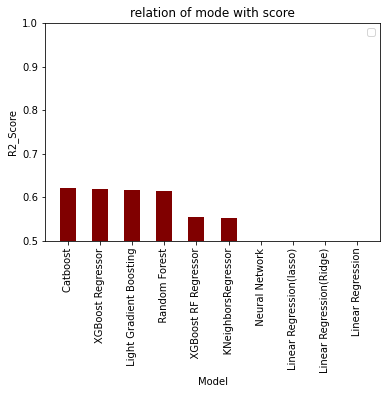

In [80]:
plt.bar(d1['Model'],d1['R2_Score'], color = 'maroon',width=.5)
plt.title('relation of mode with score')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('R2_Score')
plt.ylim(.5,1)
plt.legend()
plt.show()

In [81]:
#prediction

In [82]:
x_predict = [0,25,2020,1]
x_predict = np.array(x_predict).reshape(1,-1)

In [83]:
predicted_value = lgbm.predict(x_predict) 
print("Predicted value : ",predicted_value)

Predicted value :  [123.04709106]


In [84]:
x_predict = [0,25,2025,1]

x_predict = np.array(x_predict).reshape(1,-1)

In [85]:
for name, model in models.items():
    x_predict = [0,25,2020,1]
    x_predict = np.array(x_predict).reshape(1,-1)
    predicted_value = model.predict(x_predict) 
    print("Model Name:",model)
    print("Predicted value : ",predicted_value)
    print("---------------------------------------------------------------")
    

Model Name: Ridge()
Predicted value :  [146.30775511]
---------------------------------------------------------------
Model Name: MLPRegressor()
Predicted value :  [178.66842552]
---------------------------------------------------------------
Model Name: RandomForestRegressor()
Predicted value :  [120.16276615]
---------------------------------------------------------------
Model Name: <catboost.core.CatBoostRegressor object at 0x00000162E49A8040>
Predicted value :  [121.37498059]
---------------------------------------------------------------
Model Name: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delt

## hyperparameter tuning

In [86]:
 model_params = {
    'Catboost': {
        'model':  CatBoostRegressor(verbose=0),
        'params' : {
            'iterations': [100, 200, 400],
            'learning_rate': [0.03, 0.1],
            'depth': [2, 4, 6, 8],
            'l2_leaf_reg': [0.2, 0.5, 1, 3]
        }  
    },
    'XGBoost Regressor': {
        'model': XGBRegressor(),
        'params' : {
            'n_estimators': [100,200,400],
             
        }
    }
 }

In [87]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    r2_score(y_test, y_pre)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(scores)
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

[{'model': 'Catboost', 'best_score': 0.6279834610830913, 'best_params': {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 3, 'learning_rate': 0.1}}]
[{'model': 'Catboost', 'best_score': 0.6279834610830913, 'best_params': {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 3, 'learning_rate': 0.1}}, {'model': 'XGBoost Regressor', 'best_score': 0.6249072714486922, 'best_params': {'n_estimators': 100}}]


model  best_score  \
0           Catboost    0.627983   
1  XGBoost Regressor    0.624907   

                                         best_params  
0  {'depth': 8, 'iterations': 400, 'l2_leaf_reg':...  
1                              {'n_estimators': 100}

In [88]:
import catboost
model = catboost.CatBoostRegressor(verbose=0,depth= 8, iterations=400, l2_leaf_reg=3,learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = get_r2(y_test, y_pred)
print(' R^2: {:.5f}'.format(r2))

 R^2: 0.62051


In [89]:
 model_params = {
    'Light Gradient Boosting' : {
        'model': LGBMRegressor(),
        'params': {
            'boosting_type': ['gbdt','dart','goss'],
            'n_estimators': [100,200,400]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100,200,400],
            'criterion': ['mse','mae']
            
        }
    }
 }

In [90]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    r2_score(y_test, y_pre)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0  Light Gradient Boosting    0.620143   
1            Random Forest    0.602875   

                                      best_params  
0  {'boosting_type': 'gbdt', 'n_estimators': 200}  
1       {'criterion': 'mse', 'n_estimators': 200}

In [91]:
import catboost as cb
model = cb.CatBoostRegressor(loss_function='RMSE')
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [92]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid,train_dataset)
pred1 = model.predict(X_test)
r2 = (y_test, y_pred)
print(' R^2: {:.5f}'.format(r2))


0:	learn: 185.2954243	test: 186.0818468	best: 186.0818468 (0)	total: 3.63ms	remaining: 359ms
1:	learn: 181.1384976	test: 181.9790400	best: 181.9790400 (1)	total: 6.69ms	remaining: 328ms
2:	learn: 177.0890869	test: 177.9498153	best: 177.9498153 (2)	total: 9.63ms	remaining: 311ms
3:	learn: 173.1717659	test: 174.0844420	best: 174.0844420 (3)	total: 12.5ms	remaining: 299ms
4:	learn: 169.2993626	test: 170.2340584	best: 170.2340584 (4)	total: 15.4ms	remaining: 293ms
5:	learn: 165.6138383	test: 166.5759744	best: 166.5759744 (5)	total: 18.4ms	remaining: 288ms
6:	learn: 162.1484200	test: 163.1326545	best: 163.1326545 (6)	total: 21.2ms	remaining: 282ms
7:	learn: 158.7825309	test: 159.8137297	best: 159.8137297 (7)	total: 24ms	remaining: 276ms
8:	learn: 155.5422291	test: 156.6147051	best: 156.6147051 (8)	total: 27ms	remaining: 273ms
9:	learn: 152.5001960	test: 153.6064539	best: 153.6064539 (9)	total: 29.8ms	remaining: 268ms
10:	learn: 149.5475079	test: 150.6937661	best: 150.6937661 (10)	total: 32.

11:	learn: 98.4887971	test: 99.8722563	best: 99.8722563 (11)	total: 39.6ms	remaining: 291ms
12:	learn: 95.9073864	test: 97.2680568	best: 97.2680568 (12)	total: 42.9ms	remaining: 287ms
13:	learn: 93.5929838	test: 94.8673324	best: 94.8673324 (13)	total: 46.1ms	remaining: 283ms
14:	learn: 91.7650746	test: 93.0113686	best: 93.0113686 (14)	total: 49.1ms	remaining: 278ms
15:	learn: 90.1947529	test: 91.3700585	best: 91.3700585 (15)	total: 52.2ms	remaining: 274ms
16:	learn: 88.8631345	test: 90.0335582	best: 90.0335582 (16)	total: 55.3ms	remaining: 270ms
17:	learn: 87.6231093	test: 88.7162059	best: 88.7162059 (17)	total: 58.3ms	remaining: 266ms
18:	learn: 86.6624014	test: 87.6700528	best: 87.6700528 (18)	total: 61.5ms	remaining: 262ms
19:	learn: 85.8066166	test: 86.8132735	best: 86.8132735 (19)	total: 64.7ms	remaining: 259ms
20:	learn: 84.9492672	test: 86.0095168	best: 86.0095168 (20)	total: 67.9ms	remaining: 255ms
21:	learn: 84.0544710	test: 85.0530943	best: 85.0530943 (21)	total: 71ms	remaini

19:	learn: 126.9495747	test: 128.2782499	best: 128.2782499 (19)	total: 70.2ms	remaining: 281ms
20:	learn: 124.9112060	test: 126.2276277	best: 126.2276277 (20)	total: 74.2ms	remaining: 279ms
21:	learn: 122.9994775	test: 124.3287743	best: 124.3287743 (21)	total: 77.8ms	remaining: 276ms
22:	learn: 121.2277393	test: 122.5816940	best: 122.5816940 (22)	total: 81.3ms	remaining: 272ms
23:	learn: 119.4908262	test: 120.8692175	best: 120.8692175 (23)	total: 84.8ms	remaining: 269ms
24:	learn: 117.7197599	test: 119.1036742	best: 119.1036742 (24)	total: 89.3ms	remaining: 268ms
25:	learn: 116.0034195	test: 117.3891211	best: 117.3891211 (25)	total: 92.8ms	remaining: 264ms
26:	learn: 114.3649891	test: 115.7510582	best: 115.7510582 (26)	total: 96.5ms	remaining: 261ms
27:	learn: 112.9058266	test: 114.3092484	best: 114.3092484 (27)	total: 100ms	remaining: 257ms
28:	learn: 111.4597115	test: 112.8659576	best: 112.8659576 (28)	total: 104ms	remaining: 254ms
29:	learn: 110.1007641	test: 111.5068071	best: 111.5

18:	learn: 86.6643392	test: 87.6719590	best: 87.6719590 (18)	total: 66.4ms	remaining: 283ms
19:	learn: 85.8085034	test: 86.8151254	best: 86.8151254 (19)	total: 69.7ms	remaining: 279ms
20:	learn: 84.9510778	test: 86.0112898	best: 86.0112898 (20)	total: 73.4ms	remaining: 276ms
21:	learn: 84.0561411	test: 85.0547357	best: 85.0547357 (21)	total: 76.7ms	remaining: 272ms
22:	learn: 83.4827128	test: 84.5257036	best: 84.5257036 (22)	total: 79.9ms	remaining: 268ms
23:	learn: 82.9347869	test: 83.9586312	best: 83.9586312 (23)	total: 83.4ms	remaining: 264ms
24:	learn: 82.4428710	test: 83.4446709	best: 83.4446709 (24)	total: 86.7ms	remaining: 260ms
25:	learn: 81.9789013	test: 83.0301018	best: 83.0301018 (25)	total: 90.2ms	remaining: 257ms
26:	learn: 81.4546006	test: 82.4490115	best: 82.4490115 (26)	total: 93.5ms	remaining: 253ms
27:	learn: 81.0942687	test: 82.0773449	best: 82.0773449 (27)	total: 96.8ms	remaining: 249ms
28:	learn: 80.7655492	test: 81.7051882	best: 81.7051882 (28)	total: 100ms	remain

14:	learn: 138.4381011	test: 139.6788991	best: 139.6788991 (14)	total: 62ms	remaining: 351ms
15:	learn: 136.0192178	test: 137.2841021	best: 137.2841021 (15)	total: 66.1ms	remaining: 347ms
16:	learn: 133.5868342	test: 134.8674263	best: 134.8674263 (16)	total: 70.2ms	remaining: 343ms
17:	learn: 131.3548402	test: 132.6662671	best: 132.6662671 (17)	total: 74.1ms	remaining: 337ms
18:	learn: 129.0628530	test: 130.3846634	best: 130.3846634 (18)	total: 78.1ms	remaining: 333ms
19:	learn: 126.9546615	test: 128.2830437	best: 128.2830437 (19)	total: 82.1ms	remaining: 328ms
20:	learn: 124.9163232	test: 126.2324653	best: 126.2324653 (20)	total: 86.2ms	remaining: 324ms
21:	learn: 123.0046223	test: 124.3336343	best: 124.3336343 (21)	total: 90.1ms	remaining: 319ms
22:	learn: 121.2331404	test: 122.5867923	best: 122.5867923 (22)	total: 94.1ms	remaining: 315ms
23:	learn: 119.4962299	test: 120.8743163	best: 120.8743163 (23)	total: 98.6ms	remaining: 312ms
24:	learn: 117.7250884	test: 119.1087010	best: 119.1

13:	learn: 93.5987272	test: 94.8728674	best: 94.8728674 (13)	total: 47.7ms	remaining: 293ms
14:	learn: 91.7702261	test: 93.0163315	best: 93.0163315 (14)	total: 50.8ms	remaining: 288ms
15:	learn: 90.2007388	test: 91.3758955	best: 91.3758955 (15)	total: 54ms	remaining: 283ms
16:	learn: 88.8689382	test: 90.0391931	best: 90.0391931 (16)	total: 57.3ms	remaining: 280ms
17:	learn: 87.6284233	test: 88.7213892	best: 88.7213892 (17)	total: 60.5ms	remaining: 276ms
18:	learn: 86.6675681	test: 87.6751356	best: 87.6751356 (18)	total: 63.6ms	remaining: 271ms
19:	learn: 85.8116473	test: 86.8182114	best: 86.8182114 (19)	total: 66.6ms	remaining: 267ms
20:	learn: 84.9540948	test: 86.0142445	best: 86.0142445 (20)	total: 69.7ms	remaining: 262ms
21:	learn: 84.0589243	test: 85.0574711	best: 85.0574711 (21)	total: 72.8ms	remaining: 258ms
22:	learn: 83.4853392	test: 84.5282865	best: 84.5282865 (22)	total: 75.7ms	remaining: 253ms
23:	learn: 82.9375168	test: 83.9613293	best: 83.9613293 (23)	total: 78.7ms	remaini

27:	learn: 112.9519199	test: 114.3443049	best: 114.3443049 (27)	total: 90.4ms	remaining: 232ms
28:	learn: 111.5064940	test: 112.9016752	best: 112.9016752 (28)	total: 93.7ms	remaining: 229ms
29:	learn: 110.1544156	test: 111.5496359	best: 111.5496359 (29)	total: 96.8ms	remaining: 226ms
30:	learn: 108.8852356	test: 110.2946038	best: 110.2946038 (30)	total: 99.9ms	remaining: 222ms
31:	learn: 107.6062051	test: 109.0113170	best: 109.0113170 (31)	total: 103ms	remaining: 219ms
32:	learn: 106.4185524	test: 107.8156908	best: 107.8156908 (32)	total: 106ms	remaining: 216ms
33:	learn: 105.2495989	test: 106.6404025	best: 106.6404025 (33)	total: 109ms	remaining: 213ms
34:	learn: 104.1853431	test: 105.5908128	best: 105.5908128 (34)	total: 113ms	remaining: 209ms
35:	learn: 103.1669107	test: 104.5807142	best: 104.5807142 (35)	total: 116ms	remaining: 205ms
36:	learn: 102.1430829	test: 103.5341720	best: 103.5341720 (36)	total: 119ms	remaining: 202ms
37:	learn: 101.1608284	test: 102.5292954	best: 102.52929

38:	learn: 78.4292015	test: 79.1488861	best: 79.1488861 (38)	total: 125ms	remaining: 195ms
39:	learn: 78.2418017	test: 79.0057838	best: 79.0057838 (39)	total: 128ms	remaining: 192ms
40:	learn: 78.1216161	test: 78.8980729	best: 78.8980729 (40)	total: 131ms	remaining: 189ms
41:	learn: 77.9469793	test: 78.7006264	best: 78.7006264 (41)	total: 134ms	remaining: 186ms
42:	learn: 77.7974818	test: 78.5430299	best: 78.5430299 (42)	total: 138ms	remaining: 182ms
43:	learn: 77.6547065	test: 78.4318674	best: 78.4318674 (43)	total: 141ms	remaining: 179ms
44:	learn: 77.5320557	test: 78.2835857	best: 78.2835857 (44)	total: 144ms	remaining: 176ms
45:	learn: 77.3885759	test: 78.1197710	best: 78.1197710 (45)	total: 148ms	remaining: 173ms
46:	learn: 77.2456612	test: 77.9434096	best: 77.9434096 (46)	total: 151ms	remaining: 170ms
47:	learn: 77.1372060	test: 77.8330124	best: 77.8330124 (47)	total: 154ms	remaining: 167ms
48:	learn: 76.9330551	test: 77.5990577	best: 77.5990577 (48)	total: 158ms	remaining: 164ms

30:	learn: 108.8249177	test: 110.2451116	best: 110.2451116 (30)	total: 121ms	remaining: 463ms
31:	learn: 107.5472462	test: 108.9635046	best: 108.9635046 (31)	total: 125ms	remaining: 460ms
32:	learn: 106.3602514	test: 107.7684340	best: 107.7684340 (32)	total: 129ms	remaining: 456ms
33:	learn: 105.1926594	test: 106.5948239	best: 106.5948239 (33)	total: 132ms	remaining: 452ms
34:	learn: 104.1272099	test: 105.5440194	best: 105.5440194 (34)	total: 136ms	remaining: 447ms
35:	learn: 103.1071764	test: 104.5323472	best: 104.5323472 (35)	total: 140ms	remaining: 442ms
36:	learn: 102.0795976	test: 103.4818100	best: 103.4818100 (36)	total: 143ms	remaining: 438ms
37:	learn: 101.0921485	test: 102.4715282	best: 102.4715282 (37)	total: 148ms	remaining: 436ms
38:	learn: 100.2083426	test: 101.6069543	best: 101.6069543 (38)	total: 152ms	remaining: 432ms
39:	learn: 99.3937200	test: 100.7995273	best: 100.7995273 (39)	total: 155ms	remaining: 427ms
40:	learn: 98.5790732	test: 99.9946642	best: 99.9946642 (40)	

129:	learn: 78.5344137	test: 79.2853550	best: 79.2853550 (129)	total: 487ms	remaining: 75ms
130:	learn: 78.4740176	test: 79.2132221	best: 79.2132221 (130)	total: 491ms	remaining: 71.2ms
131:	learn: 78.4256205	test: 79.1675795	best: 79.1675795 (131)	total: 494ms	remaining: 67.4ms
132:	learn: 78.3664285	test: 79.1006827	best: 79.1006827 (132)	total: 498ms	remaining: 63.6ms
133:	learn: 78.3177201	test: 79.0406390	best: 79.0406390 (133)	total: 501ms	remaining: 59.8ms
134:	learn: 78.2626822	test: 78.9783546	best: 78.9783546 (134)	total: 504ms	remaining: 56ms
135:	learn: 78.2169337	test: 78.9348322	best: 78.9348322 (135)	total: 508ms	remaining: 52.3ms
136:	learn: 78.1573304	test: 78.8887112	best: 78.8887112 (136)	total: 511ms	remaining: 48.5ms
137:	learn: 78.1032258	test: 78.8336091	best: 78.8336091 (137)	total: 515ms	remaining: 44.8ms
138:	learn: 78.0525622	test: 78.7758269	best: 78.7758269 (138)	total: 519ms	remaining: 41ms
139:	learn: 77.9985460	test: 78.7345613	best: 78.7345613 (139)	tot

92:	learn: 73.4354841	test: 74.0031388	best: 74.0031388 (92)	total: 308ms	remaining: 189ms
93:	learn: 73.3946011	test: 73.9470400	best: 73.9470400 (93)	total: 311ms	remaining: 185ms
94:	learn: 73.3413326	test: 73.8810550	best: 73.8810550 (94)	total: 315ms	remaining: 182ms
95:	learn: 73.2889695	test: 73.8155418	best: 73.8155418 (95)	total: 319ms	remaining: 179ms
96:	learn: 73.2415646	test: 73.7627139	best: 73.7627139 (96)	total: 322ms	remaining: 176ms
97:	learn: 73.2132027	test: 73.7328586	best: 73.7328586 (97)	total: 325ms	remaining: 173ms
98:	learn: 73.1861842	test: 73.7078403	best: 73.7078403 (98)	total: 329ms	remaining: 169ms
99:	learn: 73.1241377	test: 73.6461643	best: 73.6461643 (99)	total: 332ms	remaining: 166ms
100:	learn: 73.0830855	test: 73.5978132	best: 73.5978132 (100)	total: 335ms	remaining: 163ms
101:	learn: 73.0492321	test: 73.5562285	best: 73.5562285 (101)	total: 338ms	remaining: 159ms
102:	learn: 73.0217986	test: 73.5218998	best: 73.5218998 (102)	total: 341ms	remaining:

46:	learn: 94.3500172	test: 95.7161959	best: 95.7161959 (46)	total: 154ms	remaining: 338ms
47:	learn: 93.7393045	test: 95.1033249	best: 95.1033249 (47)	total: 157ms	remaining: 335ms
48:	learn: 93.0980815	test: 94.4463743	best: 94.4463743 (48)	total: 161ms	remaining: 331ms
49:	learn: 92.5790696	test: 93.9254683	best: 93.9254683 (49)	total: 164ms	remaining: 328ms
50:	learn: 92.0207220	test: 93.3511388	best: 93.3511388 (50)	total: 167ms	remaining: 325ms
51:	learn: 91.5159061	test: 92.8336538	best: 92.8336538 (51)	total: 171ms	remaining: 322ms
52:	learn: 90.9996508	test: 92.3077005	best: 92.3077005 (52)	total: 174ms	remaining: 318ms
53:	learn: 90.5492818	test: 91.8485019	best: 91.8485019 (53)	total: 177ms	remaining: 315ms
54:	learn: 90.1141632	test: 91.4000654	best: 91.4000654 (54)	total: 180ms	remaining: 312ms
55:	learn: 89.6949684	test: 90.9931472	best: 90.9931472 (55)	total: 184ms	remaining: 308ms
56:	learn: 89.2898738	test: 90.5699695	best: 90.5699695 (56)	total: 187ms	remaining: 305ms

6:	learn: 119.0470059	test: 120.3839757	best: 120.3839757 (6)	total: 23.1ms	remaining: 472ms
7:	learn: 113.7203179	test: 115.1017386	best: 115.1017386 (7)	total: 26.4ms	remaining: 469ms
8:	learn: 109.0186251	test: 110.4218758	best: 110.4218758 (8)	total: 29.7ms	remaining: 465ms
9:	learn: 105.0786305	test: 106.5317969	best: 106.5317969 (9)	total: 32.9ms	remaining: 461ms
10:	learn: 101.6477742	test: 103.0632331	best: 103.0632331 (10)	total: 36.1ms	remaining: 456ms
11:	learn: 98.4913587	test: 99.8747084	best: 99.8747084 (11)	total: 39.2ms	remaining: 451ms
12:	learn: 95.9096913	test: 97.2702604	best: 97.2702604 (12)	total: 42.4ms	remaining: 446ms
13:	learn: 93.5951375	test: 94.8694079	best: 94.8694079 (13)	total: 45.6ms	remaining: 443ms
14:	learn: 91.7670062	test: 93.0132294	best: 93.0132294 (14)	total: 48.6ms	remaining: 438ms
15:	learn: 90.1969980	test: 91.3722477	best: 91.3722477 (15)	total: 51.8ms	remaining: 433ms
16:	learn: 88.8653113	test: 90.0356716	best: 90.0356716 (16)	total: 55ms	

121:	learn: 72.1241806	test: 72.5816077	best: 72.5816077 (121)	total: 386ms	remaining: 88.7ms
122:	learn: 72.0862451	test: 72.5286874	best: 72.5286874 (122)	total: 390ms	remaining: 85.5ms
123:	learn: 72.0605340	test: 72.4958715	best: 72.4958715 (123)	total: 393ms	remaining: 82.4ms
124:	learn: 72.0290895	test: 72.4548706	best: 72.4548706 (124)	total: 396ms	remaining: 79.2ms
125:	learn: 72.0087977	test: 72.4412356	best: 72.4412356 (125)	total: 399ms	remaining: 76.1ms
126:	learn: 71.9741468	test: 72.4043331	best: 72.4043331 (126)	total: 402ms	remaining: 72.9ms
127:	learn: 71.9570233	test: 72.3953568	best: 72.3953568 (127)	total: 406ms	remaining: 69.7ms
128:	learn: 71.9293687	test: 72.3650316	best: 72.3650316 (128)	total: 409ms	remaining: 66.5ms
129:	learn: 71.9055894	test: 72.3417872	best: 72.3417872 (129)	total: 412ms	remaining: 63.4ms
130:	learn: 71.8876106	test: 72.3214866	best: 72.3214866 (130)	total: 415ms	remaining: 60.2ms
131:	learn: 71.8556274	test: 72.2901864	best: 72.2901864 (13

85:	learn: 82.3782395	test: 83.3903230	best: 83.3903230 (85)	total: 279ms	remaining: 208ms
86:	learn: 82.2416627	test: 83.2486891	best: 83.2486891 (86)	total: 282ms	remaining: 204ms
87:	learn: 82.0996756	test: 83.1006464	best: 83.1006464 (87)	total: 286ms	remaining: 201ms
88:	learn: 81.9821294	test: 82.9691040	best: 82.9691040 (88)	total: 289ms	remaining: 198ms
89:	learn: 81.8427194	test: 82.8126482	best: 82.8126482 (89)	total: 292ms	remaining: 195ms
90:	learn: 81.7113297	test: 82.6644784	best: 82.6644784 (90)	total: 295ms	remaining: 191ms
91:	learn: 81.6070841	test: 82.5482155	best: 82.5482155 (91)	total: 298ms	remaining: 188ms
92:	learn: 81.5009058	test: 82.4362902	best: 82.4362902 (92)	total: 301ms	remaining: 185ms
93:	learn: 81.3965689	test: 82.3205396	best: 82.3205396 (93)	total: 305ms	remaining: 182ms
94:	learn: 81.2804728	test: 82.1999501	best: 82.1999501 (94)	total: 308ms	remaining: 178ms
95:	learn: 81.1710756	test: 82.0861209	best: 82.0861209 (95)	total: 311ms	remaining: 175ms

47:	learn: 77.1299176	test: 77.8254942	best: 77.8254942 (47)	total: 151ms	remaining: 321ms
48:	learn: 76.9260515	test: 77.5918214	best: 77.5918214 (48)	total: 154ms	remaining: 318ms
49:	learn: 76.8187055	test: 77.5123097	best: 77.5123097 (49)	total: 158ms	remaining: 316ms
50:	learn: 76.7185466	test: 77.4106884	best: 77.4106884 (50)	total: 161ms	remaining: 313ms
51:	learn: 76.6230767	test: 77.2929804	best: 77.2929804 (51)	total: 164ms	remaining: 310ms
52:	learn: 76.5266578	test: 77.2285145	best: 77.2285145 (52)	total: 168ms	remaining: 307ms
53:	learn: 76.4220232	test: 77.0983943	best: 77.0983943 (53)	total: 171ms	remaining: 303ms
54:	learn: 76.3401971	test: 77.0045889	best: 77.0045889 (54)	total: 174ms	remaining: 300ms
55:	learn: 76.2636705	test: 76.9364259	best: 76.9364259 (55)	total: 177ms	remaining: 297ms
56:	learn: 76.1096967	test: 76.7579016	best: 76.7579016 (56)	total: 180ms	remaining: 294ms
57:	learn: 76.0181057	test: 76.6402729	best: 76.6402729 (57)	total: 183ms	remaining: 291ms

9:	learn: 152.5215261	test: 153.6268168	best: 153.6268168 (9)	total: 33.1ms	remaining: 463ms
10:	learn: 149.5708194	test: 150.7158608	best: 150.7158608 (10)	total: 36.3ms	remaining: 459ms
11:	learn: 146.6024617	test: 147.7713589	best: 147.7713589 (11)	total: 39.4ms	remaining: 453ms
12:	learn: 143.7749885	test: 144.9637586	best: 144.9637586 (12)	total: 42.4ms	remaining: 447ms
13:	learn: 140.9887605	test: 142.1939668	best: 142.1939668 (13)	total: 45.4ms	remaining: 441ms
14:	learn: 138.4574223	test: 139.6971974	best: 139.6971974 (14)	total: 48.3ms	remaining: 435ms
15:	learn: 136.0389782	test: 137.3027944	best: 137.3027944 (15)	total: 51.3ms	remaining: 430ms
16:	learn: 133.7109046	test: 134.9953729	best: 134.9953729 (16)	total: 54.3ms	remaining: 425ms
17:	learn: 131.4805611	test: 132.7960961	best: 132.7960961 (17)	total: 57.3ms	remaining: 420ms
18:	learn: 129.1821603	test: 130.5083511	best: 130.5083511 (18)	total: 60.3ms	remaining: 416ms
19:	learn: 127.0722053	test: 128.4054411	best: 128.4

127:	learn: 78.6739032	test: 79.4623524	best: 79.4623524 (127)	total: 395ms	remaining: 67.9ms
128:	learn: 78.6164897	test: 79.3971686	best: 79.3971686 (128)	total: 398ms	remaining: 64.8ms
129:	learn: 78.5504217	test: 79.3187971	best: 79.3187971 (129)	total: 402ms	remaining: 61.8ms
130:	learn: 78.4882046	test: 79.2445734	best: 79.2445734 (130)	total: 406ms	remaining: 58.8ms
131:	learn: 78.4403471	test: 79.1993552	best: 79.1993552 (131)	total: 409ms	remaining: 55.7ms
132:	learn: 78.3829228	test: 79.1342876	best: 79.1342876 (132)	total: 412ms	remaining: 52.6ms
133:	learn: 78.3324904	test: 79.0722437	best: 79.0722437 (133)	total: 415ms	remaining: 49.5ms
134:	learn: 78.2798859	test: 79.0124102	best: 79.0124102 (134)	total: 418ms	remaining: 46.4ms
135:	learn: 78.2351440	test: 78.9658486	best: 78.9658486 (135)	total: 421ms	remaining: 43.3ms
136:	learn: 78.1753458	test: 78.9195146	best: 78.9195146 (136)	total: 424ms	remaining: 40.2ms
137:	learn: 78.1302767	test: 78.8831512	best: 78.8831512 (13

90:	learn: 73.4840305	test: 74.0222892	best: 74.0222892 (90)	total: 292ms	remaining: 189ms
91:	learn: 73.4570168	test: 73.9891870	best: 73.9891870 (91)	total: 295ms	remaining: 186ms
92:	learn: 73.4256775	test: 73.9573116	best: 73.9573116 (92)	total: 298ms	remaining: 183ms
93:	learn: 73.3524371	test: 73.8739950	best: 73.8739950 (93)	total: 301ms	remaining: 180ms
94:	learn: 73.3007859	test: 73.8169693	best: 73.8169693 (94)	total: 304ms	remaining: 176ms
95:	learn: 73.2517887	test: 73.7554021	best: 73.7554021 (95)	total: 308ms	remaining: 173ms
96:	learn: 73.2147177	test: 73.7246697	best: 73.7246697 (96)	total: 311ms	remaining: 170ms
97:	learn: 73.1594292	test: 73.6662564	best: 73.6662564 (97)	total: 315ms	remaining: 167ms
98:	learn: 73.1325825	test: 73.6413869	best: 73.6413869 (98)	total: 318ms	remaining: 164ms
99:	learn: 73.0691222	test: 73.5786747	best: 73.5786747 (99)	total: 321ms	remaining: 160ms
100:	learn: 73.0304449	test: 73.5290472	best: 73.5290472 (100)	total: 324ms	remaining: 157

52:	learn: 90.9975477	test: 92.3057076	best: 92.3057076 (52)	total: 169ms	remaining: 469ms
53:	learn: 90.5472409	test: 91.8465681	best: 91.8465681 (53)	total: 172ms	remaining: 465ms
54:	learn: 90.1121699	test: 91.3981769	best: 91.3981769 (54)	total: 175ms	remaining: 462ms
55:	learn: 89.6930073	test: 90.9912913	best: 90.9912913 (55)	total: 178ms	remaining: 459ms
56:	learn: 89.2879605	test: 90.5681530	best: 90.5681530 (56)	total: 182ms	remaining: 455ms
57:	learn: 88.9027360	test: 90.1545456	best: 90.1545456 (57)	total: 185ms	remaining: 453ms
58:	learn: 88.5430741	test: 89.7943909	best: 89.7943909 (58)	total: 188ms	remaining: 449ms
59:	learn: 88.1641193	test: 89.3904716	best: 89.3904716 (59)	total: 191ms	remaining: 446ms
60:	learn: 87.8237982	test: 89.0627947	best: 89.0627947 (60)	total: 194ms	remaining: 442ms
61:	learn: 87.5104621	test: 88.7488953	best: 88.7488953 (61)	total: 197ms	remaining: 439ms
62:	learn: 87.1994808	test: 88.4215199	best: 88.4215199 (62)	total: 200ms	remaining: 436ms

165:	learn: 76.9849273	test: 77.7095015	best: 77.7095015 (165)	total: 534ms	remaining: 109ms
166:	learn: 76.9556783	test: 77.6689043	best: 77.6689043 (166)	total: 537ms	remaining: 106ms
167:	learn: 76.8982255	test: 77.6111920	best: 77.6111920 (167)	total: 541ms	remaining: 103ms
168:	learn: 76.8478060	test: 77.5559714	best: 77.5559714 (168)	total: 544ms	remaining: 99.8ms
169:	learn: 76.8156229	test: 77.5339106	best: 77.5339106 (169)	total: 548ms	remaining: 96.6ms
170:	learn: 76.7775663	test: 77.4887393	best: 77.4887393 (170)	total: 551ms	remaining: 93.4ms
171:	learn: 76.7420013	test: 77.4514747	best: 77.4514747 (171)	total: 554ms	remaining: 90.2ms
172:	learn: 76.7174240	test: 77.4335548	best: 77.4335548 (172)	total: 557ms	remaining: 87ms
173:	learn: 76.6900237	test: 77.4049910	best: 77.4049910 (173)	total: 561ms	remaining: 83.8ms
174:	learn: 76.6608648	test: 77.3853885	best: 77.3853885 (174)	total: 564ms	remaining: 80.6ms
175:	learn: 76.6313481	test: 77.3475066	best: 77.3475066 (175)	to

77:	learn: 74.2603553	test: 74.8305400	best: 74.8305400 (77)	total: 249ms	remaining: 390ms
78:	learn: 74.1817511	test: 74.7359563	best: 74.7359563 (78)	total: 252ms	remaining: 386ms
79:	learn: 74.1330454	test: 74.6836933	best: 74.6836933 (79)	total: 255ms	remaining: 383ms
80:	learn: 74.0904986	test: 74.6320539	best: 74.6320539 (80)	total: 258ms	remaining: 379ms
81:	learn: 74.0133246	test: 74.5543325	best: 74.5543325 (81)	total: 261ms	remaining: 376ms
82:	learn: 73.9811682	test: 74.5222584	best: 74.5222584 (82)	total: 264ms	remaining: 372ms
83:	learn: 73.9468077	test: 74.5005022	best: 74.5005022 (83)	total: 268ms	remaining: 370ms
84:	learn: 73.9109430	test: 74.4642019	best: 74.4642019 (84)	total: 271ms	remaining: 367ms
85:	learn: 73.8453497	test: 74.3869903	best: 74.3869903 (85)	total: 274ms	remaining: 364ms
86:	learn: 73.8231389	test: 74.3772878	best: 74.3772878 (86)	total: 278ms	remaining: 361ms
87:	learn: 73.7857880	test: 74.3584160	best: 74.3584160 (87)	total: 281ms	remaining: 358ms

192:	learn: 70.5685500	test: 70.9691144	best: 70.9691144 (192)	total: 626ms	remaining: 22.7ms
193:	learn: 70.5255703	test: 70.9255548	best: 70.9255548 (193)	total: 630ms	remaining: 19.5ms
194:	learn: 70.5123521	test: 70.9131712	best: 70.9131712 (194)	total: 633ms	remaining: 16.2ms
195:	learn: 70.5006102	test: 70.9014975	best: 70.9014975 (195)	total: 636ms	remaining: 13ms
196:	learn: 70.4848574	test: 70.8835126	best: 70.8835126 (196)	total: 639ms	remaining: 9.74ms
197:	learn: 70.4474226	test: 70.8504768	best: 70.8504768 (197)	total: 643ms	remaining: 6.49ms
198:	learn: 70.4121337	test: 70.8130650	best: 70.8130650 (198)	total: 646ms	remaining: 3.25ms
199:	learn: 70.4053420	test: 70.8061149	best: 70.8061149 (199)	total: 649ms	remaining: 0us

bestTest = 70.80611493
bestIteration = 199

17:	loss: 70.8061149	best: 70.8061149 (17)	total: 8.33s	remaining: 36.1s
0:	learn: 185.2956444	test: 186.0820640	best: 186.0820640 (0)	total: 3.33ms	remaining: 663ms
1:	learn: 181.1390483	test: 181.9795706	be

102:	learn: 80.5019223	test: 81.3734963	best: 81.3734963 (102)	total: 335ms	remaining: 315ms
103:	learn: 80.4060203	test: 81.2826114	best: 81.2826114 (103)	total: 338ms	remaining: 312ms
104:	learn: 80.3171089	test: 81.1789544	best: 81.1789544 (104)	total: 342ms	remaining: 309ms
105:	learn: 80.2301561	test: 81.0893497	best: 81.0893497 (105)	total: 345ms	remaining: 306ms
106:	learn: 80.1409709	test: 80.9955988	best: 80.9955988 (106)	total: 348ms	remaining: 303ms
107:	learn: 80.0478291	test: 80.8955119	best: 80.8955119 (107)	total: 351ms	remaining: 299ms
108:	learn: 79.9510935	test: 80.7842527	best: 80.7842527 (108)	total: 355ms	remaining: 296ms
109:	learn: 79.8598754	test: 80.7076990	best: 80.7076990 (109)	total: 359ms	remaining: 293ms
110:	learn: 79.7831602	test: 80.6208132	best: 80.6208132 (110)	total: 363ms	remaining: 291ms
111:	learn: 79.7000708	test: 80.5260840	best: 80.5260840 (111)	total: 366ms	remaining: 288ms
112:	learn: 79.6284438	test: 80.4565061	best: 80.4565061 (112)	total: 

4:	learn: 132.7619376	test: 134.0143025	best: 134.0143025 (4)	total: 37.2ms	remaining: 1.45s
5:	learn: 125.5297075	test: 126.8390666	best: 126.8390666 (5)	total: 40.9ms	remaining: 1.32s
6:	learn: 119.0470059	test: 120.3839757	best: 120.3839757 (6)	total: 44.5ms	remaining: 1.23s
7:	learn: 113.7203179	test: 115.1017386	best: 115.1017386 (7)	total: 48ms	remaining: 1.15s
8:	learn: 109.0186251	test: 110.4218758	best: 110.4218758 (8)	total: 51.5ms	remaining: 1.09s
9:	learn: 105.0786305	test: 106.5317969	best: 106.5317969 (9)	total: 55.1ms	remaining: 1.05s
10:	learn: 101.6477742	test: 103.0632331	best: 103.0632331 (10)	total: 58.5ms	remaining: 1s
11:	learn: 98.4913587	test: 99.8747084	best: 99.8747084 (11)	total: 62ms	remaining: 971ms
12:	learn: 95.9096913	test: 97.2702604	best: 97.2702604 (12)	total: 65.4ms	remaining: 940ms
13:	learn: 93.5951375	test: 94.8694079	best: 94.8694079 (13)	total: 68.9ms	remaining: 916ms
14:	learn: 91.7670062	test: 93.0132294	best: 93.0132294 (14)	total: 72.3ms	rem

112:	learn: 72.5832662	test: 73.0660036	best: 73.0660036 (112)	total: 399ms	remaining: 307ms
113:	learn: 72.5525664	test: 73.0297157	best: 73.0297157 (113)	total: 402ms	remaining: 304ms
114:	learn: 72.5218907	test: 72.9928825	best: 72.9928825 (114)	total: 406ms	remaining: 300ms
115:	learn: 72.4861364	test: 72.9572413	best: 72.9572413 (115)	total: 409ms	remaining: 296ms
116:	learn: 72.4471625	test: 72.9076845	best: 72.9076845 (116)	total: 413ms	remaining: 293ms
117:	learn: 72.3434254	test: 72.8036675	best: 72.8036675 (117)	total: 416ms	remaining: 289ms
118:	learn: 72.3209317	test: 72.7903725	best: 72.7903725 (118)	total: 419ms	remaining: 285ms
119:	learn: 72.2366062	test: 72.7051589	best: 72.7051589 (119)	total: 422ms	remaining: 281ms
120:	learn: 72.1953933	test: 72.6566178	best: 72.6566178 (120)	total: 426ms	remaining: 278ms
121:	learn: 72.1241806	test: 72.5816077	best: 72.5816077 (121)	total: 429ms	remaining: 274ms
122:	learn: 72.0862451	test: 72.5286874	best: 72.5286874 (122)	total: 

20:	learn: 124.9163232	test: 126.2324653	best: 126.2324653 (20)	total: 69.4ms	remaining: 591ms
21:	learn: 123.0046223	test: 124.3336343	best: 124.3336343 (21)	total: 72.8ms	remaining: 589ms
22:	learn: 121.2331404	test: 122.5867923	best: 122.5867923 (22)	total: 76.1ms	remaining: 586ms
23:	learn: 119.4962299	test: 120.8743163	best: 120.8743163 (23)	total: 79.4ms	remaining: 583ms
24:	learn: 117.7250884	test: 119.1087010	best: 119.1087010 (24)	total: 82.6ms	remaining: 579ms
25:	learn: 116.0086736	test: 117.3940777	best: 117.3940777 (25)	total: 85.8ms	remaining: 574ms
26:	learn: 114.3701635	test: 115.7559395	best: 115.7559395 (26)	total: 88.9ms	remaining: 570ms
27:	learn: 112.9110300	test: 114.3141518	best: 114.3141518 (27)	total: 92.1ms	remaining: 566ms
28:	learn: 111.4648161	test: 112.8707661	best: 112.8707661 (28)	total: 95.4ms	remaining: 563ms
29:	learn: 110.1057661	test: 111.5115160	best: 111.5115160 (29)	total: 98.6ms	remaining: 559ms
30:	learn: 108.8328558	test: 110.2525904	best: 110

133:	learn: 78.3205235	test: 79.0434013	best: 79.0434013 (133)	total: 431ms	remaining: 212ms
134:	learn: 78.2654789	test: 78.9811038	best: 78.9811038 (134)	total: 435ms	remaining: 209ms
135:	learn: 78.2197294	test: 78.9375789	best: 78.9375789 (135)	total: 438ms	remaining: 206ms
136:	learn: 78.1601051	test: 78.8914395	best: 78.8914395 (136)	total: 441ms	remaining: 203ms
137:	learn: 78.1060095	test: 78.8363488	best: 78.8363488 (137)	total: 444ms	remaining: 200ms
138:	learn: 78.0553834	test: 78.7786126	best: 78.7786126 (138)	total: 447ms	remaining: 196ms
139:	learn: 78.0013459	test: 78.7373286	best: 78.7373286 (139)	total: 451ms	remaining: 193ms
140:	learn: 77.9520907	test: 78.6831523	best: 78.6831523 (140)	total: 454ms	remaining: 190ms
141:	learn: 77.9113697	test: 78.6345645	best: 78.6345645 (141)	total: 457ms	remaining: 187ms
142:	learn: 77.8622476	test: 78.5792338	best: 78.5792338 (142)	total: 460ms	remaining: 183ms
143:	learn: 77.8186033	test: 78.5324137	best: 78.5324137 (143)	total: 

43:	learn: 77.6471989	test: 78.4240678	best: 78.4240678 (43)	total: 143ms	remaining: 508ms
44:	learn: 77.5246307	test: 78.2758676	best: 78.2758676 (44)	total: 147ms	remaining: 505ms
45:	learn: 77.3813405	test: 78.1122971	best: 78.1122971 (45)	total: 150ms	remaining: 501ms
46:	learn: 77.2385999	test: 77.9361081	best: 77.9361081 (46)	total: 153ms	remaining: 499ms
47:	learn: 77.1299176	test: 77.8254942	best: 77.8254942 (47)	total: 156ms	remaining: 495ms
48:	learn: 76.9260515	test: 77.5918214	best: 77.5918214 (48)	total: 159ms	remaining: 491ms
49:	learn: 76.8187055	test: 77.5123097	best: 77.5123097 (49)	total: 163ms	remaining: 488ms
50:	learn: 76.7185466	test: 77.4106884	best: 77.4106884 (50)	total: 166ms	remaining: 484ms
51:	learn: 76.6230767	test: 77.2929804	best: 77.2929804 (51)	total: 169ms	remaining: 480ms
52:	learn: 76.5266578	test: 77.2285145	best: 77.2285145 (52)	total: 172ms	remaining: 477ms
53:	learn: 76.4220232	test: 77.0983943	best: 77.0983943 (53)	total: 175ms	remaining: 473ms

159:	learn: 71.0950979	test: 71.4767787	best: 71.4767787 (159)	total: 521ms	remaining: 130ms
160:	learn: 71.0387364	test: 71.4266522	best: 71.4266522 (160)	total: 524ms	remaining: 127ms
161:	learn: 71.0193089	test: 71.4036348	best: 71.4036348 (161)	total: 528ms	remaining: 124ms
162:	learn: 70.9981996	test: 71.3717399	best: 71.3717399 (162)	total: 531ms	remaining: 121ms
163:	learn: 70.9792997	test: 71.3637725	best: 71.3637725 (163)	total: 534ms	remaining: 117ms
164:	learn: 70.9708962	test: 71.3589050	best: 71.3589050 (164)	total: 538ms	remaining: 114ms
165:	learn: 70.9559543	test: 71.3389943	best: 71.3389943 (165)	total: 541ms	remaining: 111ms
166:	learn: 70.9399390	test: 71.3238603	best: 71.3238603 (166)	total: 544ms	remaining: 107ms
167:	learn: 70.9202090	test: 71.3020935	best: 71.3020935 (167)	total: 547ms	remaining: 104ms
168:	learn: 70.9028583	test: 71.2806882	best: 71.2806882 (168)	total: 550ms	remaining: 101ms
169:	learn: 70.8855062	test: 71.2584325	best: 71.2584325 (169)	total: 

68:	learn: 85.6404095	test: 86.8481884	best: 86.8481884 (68)	total: 230ms	remaining: 437ms
69:	learn: 85.3815361	test: 86.5784669	best: 86.5784669 (69)	total: 234ms	remaining: 434ms
70:	learn: 85.1602920	test: 86.3495122	best: 86.3495122 (70)	total: 237ms	remaining: 431ms
71:	learn: 84.9394521	test: 86.1042699	best: 86.1042699 (71)	total: 240ms	remaining: 427ms
72:	learn: 84.6947596	test: 85.8497196	best: 85.8497196 (72)	total: 244ms	remaining: 424ms
73:	learn: 84.4781174	test: 85.6261559	best: 85.6261559 (73)	total: 247ms	remaining: 420ms
74:	learn: 84.2892299	test: 85.4287323	best: 85.4287323 (74)	total: 250ms	remaining: 417ms
75:	learn: 84.1079583	test: 85.2477276	best: 85.2477276 (75)	total: 253ms	remaining: 413ms
76:	learn: 83.9348776	test: 85.0663881	best: 85.0663881 (76)	total: 257ms	remaining: 410ms
77:	learn: 83.7572157	test: 84.8758142	best: 84.8758142 (77)	total: 260ms	remaining: 407ms
78:	learn: 83.5568808	test: 84.6662851	best: 84.6662851 (78)	total: 263ms	remaining: 403ms

181:	learn: 76.4224027	test: 77.1209716	best: 77.1209716 (181)	total: 593ms	remaining: 58.6ms
182:	learn: 76.3981185	test: 77.0863708	best: 77.0863708 (182)	total: 596ms	remaining: 55.4ms
183:	learn: 76.3697628	test: 77.0514815	best: 77.0514815 (183)	total: 599ms	remaining: 52.1ms
184:	learn: 76.3382518	test: 77.0165059	best: 77.0165059 (184)	total: 602ms	remaining: 48.8ms
185:	learn: 76.2896944	test: 76.9723484	best: 76.9723484 (185)	total: 606ms	remaining: 45.6ms
186:	learn: 76.2565616	test: 76.9309722	best: 76.9309722 (186)	total: 609ms	remaining: 42.3ms
187:	learn: 76.2081404	test: 76.8777326	best: 76.8777326 (187)	total: 612ms	remaining: 39.1ms
188:	learn: 76.1823310	test: 76.8543728	best: 76.8543728 (188)	total: 615ms	remaining: 35.8ms
189:	learn: 76.1367616	test: 76.8041512	best: 76.8041512 (189)	total: 618ms	remaining: 32.5ms
190:	learn: 76.1155498	test: 76.7848068	best: 76.7848068 (190)	total: 621ms	remaining: 29.3ms
191:	learn: 76.0926943	test: 76.7512643	best: 76.7512643 (19

93:	learn: 73.3524371	test: 73.8739950	best: 73.8739950 (93)	total: 302ms	remaining: 340ms
94:	learn: 73.3007859	test: 73.8169693	best: 73.8169693 (94)	total: 305ms	remaining: 337ms
95:	learn: 73.2517887	test: 73.7554021	best: 73.7554021 (95)	total: 308ms	remaining: 334ms
96:	learn: 73.2147177	test: 73.7246697	best: 73.7246697 (96)	total: 311ms	remaining: 331ms
97:	learn: 73.1594292	test: 73.6662564	best: 73.6662564 (97)	total: 315ms	remaining: 327ms
98:	learn: 73.1325825	test: 73.6413869	best: 73.6413869 (98)	total: 318ms	remaining: 324ms
99:	learn: 73.0691222	test: 73.5786747	best: 73.5786747 (99)	total: 321ms	remaining: 321ms
100:	learn: 73.0304449	test: 73.5290472	best: 73.5290472 (100)	total: 324ms	remaining: 318ms
101:	learn: 72.9991960	test: 73.4897767	best: 73.4897767 (101)	total: 327ms	remaining: 314ms
102:	learn: 72.9690617	test: 73.4574491	best: 73.4574491 (102)	total: 330ms	remaining: 311ms
103:	learn: 72.8480517	test: 73.3467860	best: 73.3467860 (103)	total: 333ms	remainin

2:	learn: 176.7080986	test: 177.5752008	best: 177.5752008 (2)	total: 12.8ms	remaining: 415ms
3:	learn: 172.7046645	test: 173.5877009	best: 173.5877009 (3)	total: 16.9ms	remaining: 405ms
4:	learn: 168.8323305	test: 169.7840942	best: 169.7840942 (4)	total: 21ms	remaining: 399ms
5:	learn: 165.0644713	test: 166.0613046	best: 166.0613046 (5)	total: 25ms	remaining: 391ms
6:	learn: 161.4062958	test: 162.4393374	best: 162.4393374 (6)	total: 28.9ms	remaining: 384ms
7:	learn: 157.9382759	test: 159.0135922	best: 159.0135922 (7)	total: 32.8ms	remaining: 377ms
8:	learn: 154.4550007	test: 155.5450378	best: 155.5450378 (8)	total: 36.7ms	remaining: 371ms
9:	learn: 151.1982325	test: 152.2766410	best: 152.2766410 (9)	total: 40.5ms	remaining: 365ms
10:	learn: 148.0978069	test: 149.2151162	best: 149.2151162 (10)	total: 44.4ms	remaining: 359ms
11:	learn: 145.0412342	test: 146.1916992	best: 146.1916992 (11)	total: 48.6ms	remaining: 356ms
12:	learn: 142.1428619	test: 143.3279029	best: 143.3279029 (12)	total:

95:	learn: 74.7992629	test: 75.5972686	best: 75.5972686 (95)	total: 374ms	remaining: 15.6ms
96:	learn: 74.6936295	test: 75.4810304	best: 75.4810304 (96)	total: 378ms	remaining: 11.7ms
97:	learn: 74.6072319	test: 75.3781805	best: 75.3781805 (97)	total: 382ms	remaining: 7.8ms
98:	learn: 74.5228230	test: 75.2768897	best: 75.2768897 (98)	total: 386ms	remaining: 3.9ms
99:	learn: 74.4356149	test: 75.1762417	best: 75.1762417 (99)	total: 390ms	remaining: 0us

bestTest = 75.17624173
bestIteration = 99

24:	loss: 75.1762417	best: 70.7018182 (23)	total: 12.9s	remaining: 36.5s
0:	learn: 174.8433255	test: 175.6671776	best: 175.6671776 (0)	total: 3.8ms	remaining: 376ms
1:	learn: 161.7028383	test: 162.6809007	best: 162.6809007 (1)	total: 7.63ms	remaining: 374ms
2:	learn: 150.0728438	test: 151.1432018	best: 151.1432018 (2)	total: 11.5ms	remaining: 371ms
3:	learn: 140.2446579	test: 141.4296029	best: 141.4296029 (3)	total: 15.3ms	remaining: 368ms
4:	learn: 131.3981776	test: 132.7784075	best: 132.7784075

88:	learn: 67.9989367	test: 68.7568028	best: 68.7568028 (88)	total: 347ms	remaining: 42.9ms
89:	learn: 67.9343078	test: 68.7039067	best: 68.7039067 (89)	total: 351ms	remaining: 39ms
90:	learn: 67.8893319	test: 68.6424517	best: 68.6424517 (90)	total: 355ms	remaining: 35.1ms
91:	learn: 67.8537080	test: 68.5983844	best: 68.5983844 (91)	total: 359ms	remaining: 31.3ms
92:	learn: 67.7959261	test: 68.5356395	best: 68.5356395 (92)	total: 363ms	remaining: 27.3ms
93:	learn: 67.7655577	test: 68.5199975	best: 68.5199975 (93)	total: 367ms	remaining: 23.4ms
94:	learn: 67.7373354	test: 68.4897524	best: 68.4897524 (94)	total: 371ms	remaining: 19.5ms
95:	learn: 67.7002941	test: 68.4558635	best: 68.4558635 (95)	total: 375ms	remaining: 15.6ms
96:	learn: 67.6614060	test: 68.4258994	best: 68.4258994 (96)	total: 379ms	remaining: 11.7ms
97:	learn: 67.6251199	test: 68.3913568	best: 68.3913568 (97)	total: 383ms	remaining: 7.82ms
98:	learn: 67.5833097	test: 68.3802521	best: 68.3802521 (98)	total: 387ms	remainin

77:	learn: 77.3981172	test: 78.3139592	best: 78.3139592 (77)	total: 343ms	remaining: 96.7ms
78:	learn: 77.1912140	test: 78.1055800	best: 78.1055800 (78)	total: 347ms	remaining: 92.3ms
79:	learn: 77.0142896	test: 77.9221822	best: 77.9221822 (79)	total: 351ms	remaining: 87.8ms
80:	learn: 76.8458845	test: 77.7494216	best: 77.7494216 (80)	total: 355ms	remaining: 83.3ms
81:	learn: 76.6848231	test: 77.5876178	best: 77.5876178 (81)	total: 359ms	remaining: 78.8ms
82:	learn: 76.5127735	test: 77.4059693	best: 77.4059693 (82)	total: 363ms	remaining: 74.4ms
83:	learn: 76.3859356	test: 77.2725642	best: 77.2725642 (83)	total: 367ms	remaining: 69.9ms
84:	learn: 76.2309754	test: 77.1108557	best: 77.1108557 (84)	total: 371ms	remaining: 65.5ms
85:	learn: 76.0979889	test: 76.9692065	best: 76.9692065 (85)	total: 375ms	remaining: 61ms
86:	learn: 75.9280446	test: 76.7852003	best: 76.7852003 (86)	total: 379ms	remaining: 56.6ms
87:	learn: 75.8171063	test: 76.6782529	best: 76.6782529 (87)	total: 383ms	remainin

69:	learn: 68.9970261	test: 69.7342399	best: 69.7342399 (69)	total: 270ms	remaining: 116ms
70:	learn: 68.9509684	test: 69.6685696	best: 69.6685696 (70)	total: 274ms	remaining: 112ms
71:	learn: 68.8802734	test: 69.5945471	best: 69.5945471 (71)	total: 278ms	remaining: 108ms
72:	learn: 68.8147134	test: 69.5230706	best: 69.5230706 (72)	total: 283ms	remaining: 105ms
73:	learn: 68.7185971	test: 69.4138196	best: 69.4138196 (73)	total: 286ms	remaining: 101ms
74:	learn: 68.6627806	test: 69.3596470	best: 69.3596470 (74)	total: 290ms	remaining: 96.7ms
75:	learn: 68.6091932	test: 69.3241177	best: 69.3241177 (75)	total: 294ms	remaining: 92.8ms
76:	learn: 68.5646892	test: 69.2809988	best: 69.2809988 (76)	total: 298ms	remaining: 89ms
77:	learn: 68.5007769	test: 69.2122536	best: 69.2122536 (77)	total: 302ms	remaining: 85.1ms
78:	learn: 68.4507556	test: 69.1652674	best: 69.1652674 (78)	total: 306ms	remaining: 81.2ms
79:	learn: 68.3963275	test: 69.1133834	best: 69.1133834 (79)	total: 309ms	remaining: 77

62:	learn: 81.3576219	test: 82.3179027	best: 82.3179027 (62)	total: 245ms	remaining: 144ms
63:	learn: 81.0166430	test: 81.9956822	best: 81.9956822 (63)	total: 249ms	remaining: 140ms
64:	learn: 80.6725541	test: 81.6384633	best: 81.6384633 (64)	total: 253ms	remaining: 136ms
65:	learn: 80.3701163	test: 81.3111581	best: 81.3111581 (65)	total: 257ms	remaining: 132ms
66:	learn: 80.0563682	test: 81.0024699	best: 81.0024699 (66)	total: 260ms	remaining: 128ms
67:	learn: 79.7402674	test: 80.6894947	best: 80.6894947 (67)	total: 264ms	remaining: 124ms
68:	learn: 79.4433365	test: 80.3637322	best: 80.3637322 (68)	total: 268ms	remaining: 120ms
69:	learn: 79.1797815	test: 80.1089397	best: 80.1089397 (69)	total: 272ms	remaining: 116ms
70:	learn: 78.9197407	test: 79.8276503	best: 79.8276503 (70)	total: 275ms	remaining: 113ms
71:	learn: 78.6726498	test: 79.5978452	best: 79.5978452 (71)	total: 279ms	remaining: 109ms
72:	learn: 78.4125705	test: 79.3174630	best: 79.3174630 (72)	total: 283ms	remaining: 105ms

57:	learn: 69.8432698	test: 70.5173035	best: 70.5173035 (57)	total: 220ms	remaining: 159ms
58:	learn: 69.8043840	test: 70.4917755	best: 70.4917755 (58)	total: 224ms	remaining: 156ms
59:	learn: 69.6830246	test: 70.3696626	best: 70.3696626 (59)	total: 228ms	remaining: 152ms
60:	learn: 69.5832375	test: 70.2641214	best: 70.2641214 (60)	total: 232ms	remaining: 148ms
61:	learn: 69.5093726	test: 70.2091872	best: 70.2091872 (61)	total: 236ms	remaining: 144ms
62:	learn: 69.4492933	test: 70.1481396	best: 70.1481396 (62)	total: 239ms	remaining: 141ms
63:	learn: 69.3514153	test: 70.0675624	best: 70.0675624 (63)	total: 243ms	remaining: 137ms
64:	learn: 69.2487121	test: 69.9558321	best: 69.9558321 (64)	total: 247ms	remaining: 133ms
65:	learn: 69.1977846	test: 69.9051511	best: 69.9051511 (65)	total: 251ms	remaining: 129ms
66:	learn: 69.1155236	test: 69.8175097	best: 69.8175097 (66)	total: 255ms	remaining: 125ms
67:	learn: 69.0570523	test: 69.7719011	best: 69.7719011 (67)	total: 258ms	remaining: 122ms

50:	learn: 86.8282294	test: 87.8582196	best: 87.8582196 (50)	total: 202ms	remaining: 194ms
51:	learn: 86.2524329	test: 87.3038229	best: 87.3038229 (51)	total: 206ms	remaining: 190ms
52:	learn: 85.7162088	test: 86.7621377	best: 86.7621377 (52)	total: 209ms	remaining: 186ms
53:	learn: 85.2476945	test: 86.2802771	best: 86.2802771 (53)	total: 213ms	remaining: 182ms
54:	learn: 84.7342621	test: 85.7363335	best: 85.7363335 (54)	total: 217ms	remaining: 177ms
55:	learn: 84.2353295	test: 85.2100192	best: 85.2100192 (55)	total: 221ms	remaining: 173ms
56:	learn: 83.7640202	test: 84.7389353	best: 84.7389353 (56)	total: 224ms	remaining: 169ms
57:	learn: 83.2848402	test: 84.2442039	best: 84.2442039 (57)	total: 228ms	remaining: 165ms
58:	learn: 82.8602118	test: 83.8211904	best: 83.8211904 (58)	total: 232ms	remaining: 161ms
59:	learn: 82.4267594	test: 83.3777863	best: 83.3777863 (59)	total: 236ms	remaining: 157ms
60:	learn: 82.0298556	test: 82.9576840	best: 82.9576840 (60)	total: 239ms	remaining: 153ms

44:	learn: 71.4698804	test: 72.0352485	best: 72.0352485 (44)	total: 175ms	remaining: 214ms
45:	learn: 71.3069176	test: 71.9132526	best: 71.9132526 (45)	total: 179ms	remaining: 210ms
46:	learn: 71.1977766	test: 71.8155083	best: 71.8155083 (46)	total: 183ms	remaining: 206ms
47:	learn: 71.0840546	test: 71.7228753	best: 71.7228753 (47)	total: 187ms	remaining: 203ms
48:	learn: 70.9812624	test: 71.6170048	best: 71.6170048 (48)	total: 191ms	remaining: 199ms
49:	learn: 70.8989954	test: 71.5575883	best: 71.5575883 (49)	total: 195ms	remaining: 195ms
50:	learn: 70.8050587	test: 71.5038364	best: 71.5038364 (50)	total: 199ms	remaining: 191ms
51:	learn: 70.7076609	test: 71.4243733	best: 71.4243733 (51)	total: 202ms	remaining: 187ms
52:	learn: 70.6143615	test: 71.3277717	best: 71.3277717 (52)	total: 206ms	remaining: 183ms
53:	learn: 70.4710127	test: 71.1813298	best: 71.1813298 (53)	total: 210ms	remaining: 179ms
54:	learn: 70.2901253	test: 70.9693154	best: 70.9693154 (54)	total: 214ms	remaining: 175ms

79:	learn: 76.9718973	test: 77.8855441	best: 77.8855441 (79)	total: 312ms	remaining: 273ms
80:	learn: 76.8132690	test: 77.7133819	best: 77.7133819 (80)	total: 316ms	remaining: 269ms
81:	learn: 76.6486205	test: 77.5478182	best: 77.5478182 (81)	total: 319ms	remaining: 265ms
82:	learn: 76.4805668	test: 77.3701261	best: 77.3701261 (82)	total: 323ms	remaining: 261ms
83:	learn: 76.3355676	test: 77.2287825	best: 77.2287825 (83)	total: 326ms	remaining: 256ms
84:	learn: 76.1799601	test: 77.0696064	best: 77.0696064 (84)	total: 330ms	remaining: 252ms
85:	learn: 76.0460974	test: 76.9269192	best: 76.9269192 (85)	total: 333ms	remaining: 248ms
86:	learn: 75.9087509	test: 76.7704741	best: 76.7704741 (86)	total: 337ms	remaining: 244ms
87:	learn: 75.7779381	test: 76.6531002	best: 76.6531002 (87)	total: 341ms	remaining: 240ms
88:	learn: 75.6167642	test: 76.4714284	best: 76.4714284 (88)	total: 344ms	remaining: 236ms
89:	learn: 75.5048009	test: 76.3542670	best: 76.3542670 (89)	total: 348ms	remaining: 232ms

25:	learn: 75.6333698	test: 76.4137732	best: 76.4137732 (25)	total: 96.8ms	remaining: 462ms
26:	learn: 75.2808590	test: 76.0149022	best: 76.0149022 (26)	total: 101ms	remaining: 459ms
27:	learn: 74.8549027	test: 75.5762144	best: 75.5762144 (27)	total: 105ms	remaining: 456ms
28:	learn: 74.4595615	test: 75.1964670	best: 75.1964670 (28)	total: 108ms	remaining: 452ms
29:	learn: 74.0888698	test: 74.8264106	best: 74.8264106 (29)	total: 112ms	remaining: 448ms
30:	learn: 73.7341472	test: 74.4348671	best: 74.4348671 (30)	total: 116ms	remaining: 445ms
31:	learn: 73.5040058	test: 74.1557098	best: 74.1557098 (31)	total: 120ms	remaining: 441ms
32:	learn: 73.2023731	test: 73.8183312	best: 73.8183312 (32)	total: 123ms	remaining: 437ms
33:	learn: 72.9931231	test: 73.5983333	best: 73.5983333 (33)	total: 127ms	remaining: 434ms
34:	learn: 72.7622697	test: 73.3851349	best: 73.3851349 (34)	total: 131ms	remaining: 431ms
35:	learn: 72.5805940	test: 73.2108377	best: 73.2108377 (35)	total: 135ms	remaining: 427m

120:	learn: 66.9029827	test: 67.7389485	best: 67.7389485 (120)	total: 460ms	remaining: 110ms
121:	learn: 66.8756520	test: 67.7048312	best: 67.7048312 (121)	total: 464ms	remaining: 106ms
122:	learn: 66.8466989	test: 67.6773953	best: 67.6773953 (122)	total: 468ms	remaining: 103ms
123:	learn: 66.8325724	test: 67.6618815	best: 67.6618815 (123)	total: 472ms	remaining: 98.9ms
124:	learn: 66.8121199	test: 67.6385019	best: 67.6385019 (124)	total: 475ms	remaining: 95.1ms
125:	learn: 66.7960271	test: 67.6276292	best: 67.6276292 (125)	total: 479ms	remaining: 91.3ms
126:	learn: 66.7689740	test: 67.5889853	best: 67.5889853 (126)	total: 483ms	remaining: 87.5ms
127:	learn: 66.7445393	test: 67.5684022	best: 67.5684022 (127)	total: 487ms	remaining: 83.7ms
128:	learn: 66.7223588	test: 67.5439836	best: 67.5439836 (128)	total: 491ms	remaining: 79.9ms
129:	learn: 66.6891950	test: 67.5190111	best: 67.5190111 (129)	total: 495ms	remaining: 76.1ms
130:	learn: 66.6699631	test: 67.4897019	best: 67.4897019 (130)	

61:	learn: 81.7670289	test: 82.7366974	best: 82.7366974 (61)	total: 248ms	remaining: 352ms
62:	learn: 81.3610671	test: 82.3063867	best: 82.3063867 (62)	total: 252ms	remaining: 349ms
63:	learn: 81.0190660	test: 81.9828460	best: 81.9828460 (63)	total: 256ms	remaining: 345ms
64:	learn: 80.6736015	test: 81.6242838	best: 81.6242838 (64)	total: 260ms	remaining: 340ms
65:	learn: 80.3550732	test: 81.2971683	best: 81.2971683 (65)	total: 264ms	remaining: 336ms
66:	learn: 80.0410775	test: 80.9877704	best: 80.9877704 (66)	total: 268ms	remaining: 332ms
67:	learn: 79.7253268	test: 80.6749880	best: 80.6749880 (67)	total: 272ms	remaining: 328ms
68:	learn: 79.4315632	test: 80.3524658	best: 80.3524658 (68)	total: 276ms	remaining: 324ms
69:	learn: 79.1674490	test: 80.0965276	best: 80.0965276 (69)	total: 280ms	remaining: 320ms
70:	learn: 78.9265555	test: 79.8442582	best: 79.8442582 (70)	total: 284ms	remaining: 316ms
71:	learn: 78.6806029	test: 79.6150388	best: 79.6150388 (71)	total: 288ms	remaining: 312ms


bestTest = 72.03549001
bestIteration = 149

34:	loss: 72.0354900	best: 67.1199853 (33)	total: 17.6s	remaining: 30.6s
0:	learn: 174.8453341	test: 175.6691490	best: 175.6691490 (0)	total: 4ms	remaining: 596ms
1:	learn: 161.7091554	test: 162.6869963	best: 162.6869963 (1)	total: 7.96ms	remaining: 589ms
2:	learn: 150.0795997	test: 151.1497411	best: 151.1497411 (2)	total: 12ms	remaining: 586ms
3:	learn: 140.2523801	test: 141.4370117	best: 141.4370117 (3)	total: 16.1ms	remaining: 587ms
4:	learn: 131.4072626	test: 132.7870387	best: 132.7870387 (4)	total: 20.3ms	remaining: 589ms
5:	learn: 123.3174851	test: 124.7050109	best: 124.7050109 (5)	total: 24.6ms	remaining: 590ms
6:	learn: 116.4771788	test: 117.9091601	best: 117.9091601 (6)	total: 28.7ms	remaining: 586ms
7:	learn: 110.8217907	test: 112.3131140	best: 112.3131140 (7)	total: 32.6ms	remaining: 579ms
8:	learn: 105.3813700	test: 106.7887360	best: 106.7887360 (8)	total: 36.6ms	remaining: 574ms
9:	learn: 100.9328582	test: 102.2308903	best: 102.

90:	learn: 67.9018327	test: 68.6598371	best: 68.6598371 (90)	total: 363ms	remaining: 235ms
91:	learn: 67.8642789	test: 68.6143978	best: 68.6143978 (91)	total: 367ms	remaining: 231ms
92:	learn: 67.8175245	test: 68.5715978	best: 68.5715978 (92)	total: 370ms	remaining: 227ms
93:	learn: 67.7839685	test: 68.5535185	best: 68.5535185 (93)	total: 374ms	remaining: 223ms
94:	learn: 67.7628163	test: 68.5381119	best: 68.5381119 (94)	total: 378ms	remaining: 219ms
95:	learn: 67.7303181	test: 68.5005220	best: 68.5005220 (95)	total: 382ms	remaining: 215ms
96:	learn: 67.6939438	test: 68.4723345	best: 68.4723345 (96)	total: 386ms	remaining: 211ms
97:	learn: 67.6602840	test: 68.4433253	best: 68.4433253 (97)	total: 390ms	remaining: 207ms
98:	learn: 67.6269300	test: 68.4164526	best: 68.4164526 (98)	total: 394ms	remaining: 203ms
99:	learn: 67.5969028	test: 68.3844576	best: 68.3844576 (99)	total: 398ms	remaining: 199ms
100:	learn: 67.5649761	test: 68.3579722	best: 68.3579722 (100)	total: 402ms	remaining: 195

28:	learn: 108.1203712	test: 109.4017117	best: 109.4017117 (28)	total: 116ms	remaining: 485ms
29:	learn: 106.5787746	test: 107.8394161	best: 107.8394161 (29)	total: 120ms	remaining: 482ms
30:	learn: 105.1611577	test: 106.4093647	best: 106.4093647 (30)	total: 124ms	remaining: 478ms
31:	learn: 103.8156876	test: 105.0644737	best: 105.0644737 (31)	total: 129ms	remaining: 474ms
32:	learn: 102.5320444	test: 103.7714651	best: 103.7714651 (32)	total: 132ms	remaining: 470ms
33:	learn: 101.3497246	test: 102.5799184	best: 102.5799184 (33)	total: 136ms	remaining: 465ms
34:	learn: 100.1492529	test: 101.3702563	best: 101.3702563 (34)	total: 140ms	remaining: 461ms
35:	learn: 99.0665692	test: 100.2802149	best: 100.2802149 (35)	total: 144ms	remaining: 457ms
36:	learn: 98.0058863	test: 99.2332593	best: 99.2332593 (36)	total: 148ms	remaining: 453ms
37:	learn: 96.9931401	test: 98.1977138	best: 98.1977138 (37)	total: 152ms	remaining: 448ms
38:	learn: 95.9778409	test: 97.1573465	best: 97.1573465 (38)	total:

122:	learn: 72.7078665	test: 73.4018868	best: 73.4018868 (122)	total: 479ms	remaining: 105ms
123:	learn: 72.6629618	test: 73.3568080	best: 73.3568080 (123)	total: 483ms	remaining: 101ms
124:	learn: 72.6160448	test: 73.3097954	best: 73.3097954 (124)	total: 487ms	remaining: 97.4ms
125:	learn: 72.5390742	test: 73.2197555	best: 73.2197555 (125)	total: 491ms	remaining: 93.5ms
126:	learn: 72.4736707	test: 73.1428680	best: 73.1428680 (126)	total: 495ms	remaining: 89.6ms
127:	learn: 72.4304660	test: 73.0974914	best: 73.0974914 (127)	total: 499ms	remaining: 85.7ms
128:	learn: 72.3855158	test: 73.0478503	best: 73.0478503 (128)	total: 503ms	remaining: 81.9ms
129:	learn: 72.3455665	test: 73.0172745	best: 73.0172745 (129)	total: 508ms	remaining: 78.1ms
130:	learn: 72.2943730	test: 72.9721750	best: 72.9721750 (130)	total: 512ms	remaining: 74.2ms
131:	learn: 72.2576289	test: 72.9358872	best: 72.9358872 (131)	total: 516ms	remaining: 70.4ms
132:	learn: 72.2092625	test: 72.8801924	best: 72.8801924 (132)

64:	learn: 69.2487121	test: 69.9558321	best: 69.9558321 (64)	total: 247ms	remaining: 323ms
65:	learn: 69.1977846	test: 69.9051511	best: 69.9051511 (65)	total: 251ms	remaining: 320ms
66:	learn: 69.1155236	test: 69.8175097	best: 69.8175097 (66)	total: 255ms	remaining: 316ms
67:	learn: 69.0570523	test: 69.7719011	best: 69.7719011 (67)	total: 259ms	remaining: 312ms
68:	learn: 68.9772409	test: 69.7085999	best: 69.7085999 (68)	total: 263ms	remaining: 309ms
69:	learn: 68.9056068	test: 69.6344104	best: 69.6344104 (69)	total: 267ms	remaining: 305ms
70:	learn: 68.8528991	test: 69.5715075	best: 69.5715075 (70)	total: 270ms	remaining: 301ms
71:	learn: 68.7848596	test: 69.5021184	best: 69.5021184 (71)	total: 274ms	remaining: 297ms
72:	learn: 68.7096620	test: 69.4214217	best: 69.4214217 (72)	total: 278ms	remaining: 293ms
73:	learn: 68.6262462	test: 69.3281611	best: 69.3281611 (73)	total: 282ms	remaining: 289ms
74:	learn: 68.5652662	test: 69.2639972	best: 69.2639972 (74)	total: 286ms	remaining: 286ms

6:	learn: 161.4494786	test: 162.4810056	best: 162.4810056 (6)	total: 28ms	remaining: 572ms
7:	learn: 157.9863688	test: 159.0600456	best: 159.0600456 (7)	total: 31.9ms	remaining: 567ms
8:	learn: 154.5054096	test: 155.5937974	best: 155.5937974 (8)	total: 35.8ms	remaining: 561ms
9:	learn: 151.2537301	test: 152.3309519	best: 152.3309519 (9)	total: 39.6ms	remaining: 554ms
10:	learn: 148.1612791	test: 149.2766662	best: 149.2766662 (10)	total: 43.4ms	remaining: 549ms
11:	learn: 145.1081989	test: 146.2566121	best: 146.2566121 (11)	total: 47.4ms	remaining: 545ms
12:	learn: 142.2127337	test: 143.3955350	best: 143.3955350 (12)	total: 51.1ms	remaining: 539ms
13:	learn: 139.3309530	test: 140.5060801	best: 140.5060801 (13)	total: 54.9ms	remaining: 533ms
14:	learn: 136.6100010	test: 137.7957796	best: 137.7957796 (14)	total: 58.7ms	remaining: 528ms
15:	learn: 133.9608267	test: 135.1528493	best: 135.1528493 (15)	total: 62.5ms	remaining: 523ms
16:	learn: 131.4789828	test: 132.7024593	best: 132.7024593 (

101:	learn: 74.2695979	test: 74.9975647	best: 74.9975647 (101)	total: 392ms	remaining: 184ms
102:	learn: 74.1606791	test: 74.8945974	best: 74.8945974 (102)	total: 396ms	remaining: 181ms
103:	learn: 74.0679290	test: 74.7953516	best: 74.7953516 (103)	total: 400ms	remaining: 177ms
104:	learn: 73.9747166	test: 74.7141338	best: 74.7141338 (104)	total: 404ms	remaining: 173ms
105:	learn: 73.8806861	test: 74.6241200	best: 74.6241200 (105)	total: 408ms	remaining: 169ms
106:	learn: 73.7954179	test: 74.5413703	best: 74.5413703 (106)	total: 412ms	remaining: 166ms
107:	learn: 73.7310374	test: 74.4796007	best: 74.4796007 (107)	total: 416ms	remaining: 162ms
108:	learn: 73.6744703	test: 74.4103371	best: 74.4103371 (108)	total: 420ms	remaining: 158ms
109:	learn: 73.5793707	test: 74.3010715	best: 74.3010715 (109)	total: 423ms	remaining: 154ms
110:	learn: 73.5055035	test: 74.2279601	best: 74.2279601 (110)	total: 427ms	remaining: 150ms
111:	learn: 73.4447260	test: 74.1560049	best: 74.1560049 (111)	total: 

45:	learn: 71.3069176	test: 71.9132526	best: 71.9132526 (45)	total: 174ms	remaining: 393ms
46:	learn: 71.1977766	test: 71.8155083	best: 71.8155083 (46)	total: 177ms	remaining: 389ms
47:	learn: 71.0840546	test: 71.7228753	best: 71.7228753 (47)	total: 182ms	remaining: 386ms
48:	learn: 70.9812624	test: 71.6170048	best: 71.6170048 (48)	total: 185ms	remaining: 382ms
49:	learn: 70.8989954	test: 71.5575883	best: 71.5575883 (49)	total: 189ms	remaining: 378ms
50:	learn: 70.8050587	test: 71.5038364	best: 71.5038364 (50)	total: 193ms	remaining: 374ms
51:	learn: 70.7076609	test: 71.4243733	best: 71.4243733 (51)	total: 197ms	remaining: 370ms
52:	learn: 70.6143615	test: 71.3277717	best: 71.3277717 (52)	total: 200ms	remaining: 367ms
53:	learn: 70.4710127	test: 71.1813298	best: 71.1813298 (53)	total: 204ms	remaining: 363ms
54:	learn: 70.2901253	test: 70.9693154	best: 70.9693154 (54)	total: 208ms	remaining: 359ms
55:	learn: 70.1820838	test: 70.8489569	best: 70.8489569 (55)	total: 212ms	remaining: 355ms

140:	learn: 66.3943516	test: 67.2633653	best: 67.2633653 (140)	total: 536ms	remaining: 34.2ms
141:	learn: 66.3795678	test: 67.2486527	best: 67.2486527 (141)	total: 540ms	remaining: 30.4ms
142:	learn: 66.3660045	test: 67.2418407	best: 67.2418407 (142)	total: 544ms	remaining: 26.6ms
143:	learn: 66.3486109	test: 67.2294339	best: 67.2294339 (143)	total: 548ms	remaining: 22.8ms
144:	learn: 66.3364281	test: 67.2263349	best: 67.2263349 (144)	total: 552ms	remaining: 19ms
145:	learn: 66.3131516	test: 67.1973594	best: 67.1973594 (145)	total: 556ms	remaining: 15.2ms
146:	learn: 66.2954193	test: 67.1872141	best: 67.1872141 (146)	total: 560ms	remaining: 11.4ms
147:	learn: 66.2789011	test: 67.1771918	best: 67.1771918 (147)	total: 564ms	remaining: 7.62ms
148:	learn: 66.2644060	test: 67.1583574	best: 67.1583574 (148)	total: 567ms	remaining: 3.81ms
149:	learn: 66.2456426	test: 67.1409956	best: 67.1409956 (149)	total: 571ms	remaining: 0us

bestTest = 67.1409956
bestIteration = 149

39:	loss: 67.1409956	

82:	learn: 76.4805668	test: 77.3701261	best: 77.3701261 (82)	total: 323ms	remaining: 456ms
83:	learn: 76.3355676	test: 77.2287825	best: 77.2287825 (83)	total: 327ms	remaining: 452ms
84:	learn: 76.1799601	test: 77.0696064	best: 77.0696064 (84)	total: 331ms	remaining: 448ms
85:	learn: 76.0460974	test: 76.9269192	best: 76.9269192 (85)	total: 335ms	remaining: 444ms
86:	learn: 75.9087509	test: 76.7704741	best: 76.7704741 (86)	total: 339ms	remaining: 440ms
87:	learn: 75.7779381	test: 76.6531002	best: 76.6531002 (87)	total: 343ms	remaining: 436ms
88:	learn: 75.6167642	test: 76.4714284	best: 76.4714284 (88)	total: 347ms	remaining: 432ms
89:	learn: 75.5048009	test: 76.3542670	best: 76.3542670 (89)	total: 350ms	remaining: 428ms
90:	learn: 75.3738570	test: 76.2112457	best: 76.2112457 (90)	total: 354ms	remaining: 424ms
91:	learn: 75.2287433	test: 76.0488258	best: 76.0488258 (91)	total: 358ms	remaining: 420ms
92:	learn: 75.1009670	test: 75.9132714	best: 75.9132714 (92)	total: 361ms	remaining: 416ms

176:	learn: 70.4366324	test: 71.1201567	best: 71.1201567 (176)	total: 687ms	remaining: 89.3ms
177:	learn: 70.4114476	test: 71.0960592	best: 71.0960592 (177)	total: 691ms	remaining: 85.4ms
178:	learn: 70.3937350	test: 71.0815563	best: 71.0815563 (178)	total: 695ms	remaining: 81.6ms
179:	learn: 70.3641930	test: 71.0573467	best: 71.0573467 (179)	total: 699ms	remaining: 77.7ms
180:	learn: 70.3339758	test: 71.0322444	best: 71.0322444 (180)	total: 703ms	remaining: 73.8ms
181:	learn: 70.3142953	test: 71.0053716	best: 71.0053716 (181)	total: 707ms	remaining: 69.9ms
182:	learn: 70.2900767	test: 70.9806360	best: 70.9806360 (182)	total: 711ms	remaining: 66.1ms
183:	learn: 70.2583478	test: 70.9484850	best: 70.9484850 (183)	total: 715ms	remaining: 62.2ms
184:	learn: 70.2200785	test: 70.9086108	best: 70.9086108 (184)	total: 719ms	remaining: 58.3ms
185:	learn: 70.1936501	test: 70.8721925	best: 70.8721925 (185)	total: 723ms	remaining: 54.4ms
186:	learn: 70.1624820	test: 70.8372804	best: 70.8372804 (18

67:	learn: 69.1416554	test: 69.8707339	best: 69.8707339 (67)	total: 268ms	remaining: 521ms
68:	learn: 69.0576397	test: 69.7937759	best: 69.7937759 (68)	total: 272ms	remaining: 517ms
69:	learn: 68.9772158	test: 69.7299953	best: 69.7299953 (69)	total: 276ms	remaining: 513ms
70:	learn: 68.9268583	test: 69.6738707	best: 69.6738707 (70)	total: 280ms	remaining: 509ms
71:	learn: 68.8685197	test: 69.6534577	best: 69.6534577 (71)	total: 284ms	remaining: 505ms
72:	learn: 68.7798644	test: 69.5524984	best: 69.5524984 (72)	total: 288ms	remaining: 501ms
73:	learn: 68.7158493	test: 69.4727145	best: 69.4727145 (73)	total: 292ms	remaining: 497ms
74:	learn: 68.6777913	test: 69.4294294	best: 69.4294294 (74)	total: 296ms	remaining: 493ms
75:	learn: 68.6070435	test: 69.3459426	best: 69.3459426 (75)	total: 299ms	remaining: 489ms
76:	learn: 68.5642022	test: 69.3051179	best: 69.3051179 (76)	total: 303ms	remaining: 484ms
77:	learn: 68.5111362	test: 69.2656999	best: 69.2656999 (77)	total: 307ms	remaining: 480ms

160:	learn: 66.0768650	test: 66.9630607	best: 66.9630607 (160)	total: 628ms	remaining: 152ms
161:	learn: 66.0618322	test: 66.9530059	best: 66.9530059 (161)	total: 632ms	remaining: 148ms
162:	learn: 66.0508034	test: 66.9460399	best: 66.9460399 (162)	total: 636ms	remaining: 144ms
163:	learn: 66.0261576	test: 66.9259446	best: 66.9259446 (163)	total: 640ms	remaining: 141ms
164:	learn: 66.0147490	test: 66.9234515	best: 66.9234515 (164)	total: 644ms	remaining: 137ms
165:	learn: 66.0037519	test: 66.9140299	best: 66.9140299 (165)	total: 648ms	remaining: 133ms
166:	learn: 65.9827773	test: 66.8916408	best: 66.8916408 (166)	total: 651ms	remaining: 129ms
167:	learn: 65.9610915	test: 66.8794409	best: 66.8794409 (167)	total: 655ms	remaining: 125ms
168:	learn: 65.9398579	test: 66.8750260	best: 66.8750260 (168)	total: 659ms	remaining: 121ms
169:	learn: 65.9264119	test: 66.8621627	best: 66.8621627 (169)	total: 663ms	remaining: 117ms
170:	learn: 65.9177185	test: 66.8487429	best: 66.8487429 (170)	total: 

53:	learn: 85.2240362	test: 86.2734566	best: 86.2734566 (53)	total: 213ms	remaining: 576ms
54:	learn: 84.7125764	test: 85.7318506	best: 85.7318506 (54)	total: 217ms	remaining: 573ms
55:	learn: 84.2174042	test: 85.2097627	best: 85.2097627 (55)	total: 221ms	remaining: 569ms
56:	learn: 83.7716359	test: 84.7737921	best: 84.7737921 (56)	total: 225ms	remaining: 565ms
57:	learn: 83.3547205	test: 84.3481674	best: 84.3481674 (57)	total: 229ms	remaining: 561ms
58:	learn: 82.9319181	test: 83.9277049	best: 83.9277049 (58)	total: 233ms	remaining: 556ms
59:	learn: 82.4928082	test: 83.4793147	best: 83.4793147 (59)	total: 237ms	remaining: 552ms
60:	learn: 82.0914611	test: 83.0548008	best: 83.0548008 (60)	total: 241ms	remaining: 548ms
61:	learn: 81.7670289	test: 82.7366974	best: 82.7366974 (61)	total: 244ms	remaining: 544ms
62:	learn: 81.3610671	test: 82.3063867	best: 82.3063867 (62)	total: 248ms	remaining: 540ms
63:	learn: 81.0190660	test: 81.9828460	best: 81.9828460 (63)	total: 252ms	remaining: 536ms

145:	learn: 71.5279417	test: 72.1754047	best: 72.1754047 (145)	total: 576ms	remaining: 213ms
146:	learn: 71.4821915	test: 72.1355175	best: 72.1355175 (146)	total: 580ms	remaining: 209ms
147:	learn: 71.4440156	test: 72.0957272	best: 72.0957272 (147)	total: 584ms	remaining: 205ms
148:	learn: 71.4138869	test: 72.0636216	best: 72.0636216 (148)	total: 588ms	remaining: 201ms
149:	learn: 71.3827996	test: 72.0354900	best: 72.0354900 (149)	total: 592ms	remaining: 197ms
150:	learn: 71.3320654	test: 71.9808141	best: 71.9808141 (150)	total: 596ms	remaining: 193ms
151:	learn: 71.3072780	test: 71.9529683	best: 71.9529683 (151)	total: 600ms	remaining: 189ms
152:	learn: 71.2746399	test: 71.9101514	best: 71.9101514 (152)	total: 603ms	remaining: 185ms
153:	learn: 71.2310932	test: 71.8767101	best: 71.8767101 (153)	total: 607ms	remaining: 181ms
154:	learn: 71.2053558	test: 71.8521673	best: 71.8521673 (154)	total: 611ms	remaining: 177ms
155:	learn: 71.1717269	test: 71.8322032	best: 71.8322032 (155)	total: 

38:	learn: 72.0896697	test: 72.7262416	best: 72.7262416 (38)	total: 153ms	remaining: 630ms
39:	learn: 71.9373300	test: 72.5899106	best: 72.5899106 (39)	total: 157ms	remaining: 627ms
40:	learn: 71.7681861	test: 72.3913454	best: 72.3913454 (40)	total: 161ms	remaining: 624ms
41:	learn: 71.6147902	test: 72.2507015	best: 72.2507015 (41)	total: 165ms	remaining: 620ms
42:	learn: 71.4801847	test: 72.1018563	best: 72.1018563 (42)	total: 169ms	remaining: 616ms
43:	learn: 71.3925073	test: 71.9885737	best: 71.9885737 (43)	total: 173ms	remaining: 612ms
44:	learn: 71.2933847	test: 71.8940726	best: 71.8940726 (44)	total: 176ms	remaining: 608ms
45:	learn: 71.1402849	test: 71.7668574	best: 71.7668574 (45)	total: 180ms	remaining: 604ms
46:	learn: 71.0188049	test: 71.6573907	best: 71.6573907 (46)	total: 184ms	remaining: 600ms
47:	learn: 70.9238433	test: 71.5716546	best: 71.5716546 (47)	total: 188ms	remaining: 596ms
48:	learn: 70.8166297	test: 71.4545788	best: 71.4545788 (48)	total: 192ms	remaining: 592ms

130:	learn: 66.6692501	test: 67.4729578	best: 67.4729578 (130)	total: 517ms	remaining: 272ms
131:	learn: 66.6344470	test: 67.4466962	best: 67.4466962 (131)	total: 521ms	remaining: 268ms
132:	learn: 66.6186061	test: 67.4296011	best: 67.4296011 (132)	total: 526ms	remaining: 265ms
133:	learn: 66.5864837	test: 67.4224608	best: 67.4224608 (133)	total: 529ms	remaining: 261ms
134:	learn: 66.5674730	test: 67.4121623	best: 67.4121623 (134)	total: 533ms	remaining: 257ms
135:	learn: 66.5501885	test: 67.4045575	best: 67.4045575 (135)	total: 537ms	remaining: 253ms
136:	learn: 66.5256191	test: 67.3886848	best: 67.3886848 (136)	total: 541ms	remaining: 249ms
137:	learn: 66.5107999	test: 67.3708516	best: 67.3708516 (137)	total: 546ms	remaining: 245ms
138:	learn: 66.4908840	test: 67.3435035	best: 67.3435035 (138)	total: 549ms	remaining: 241ms
139:	learn: 66.4652854	test: 67.3400961	best: 67.3400961 (139)	total: 553ms	remaining: 237ms
140:	learn: 66.4489366	test: 67.3257337	best: 67.3257337 (140)	total: 

19:	learn: 124.4664660	test: 125.7136127	best: 125.7136127 (19)	total: 80.3ms	remaining: 723ms
20:	learn: 122.3637079	test: 123.6264151	best: 123.6264151 (20)	total: 84.4ms	remaining: 719ms
21:	learn: 120.3347478	test: 121.6171327	best: 121.6171327 (21)	total: 88.4ms	remaining: 715ms
22:	learn: 118.2889877	test: 119.5591023	best: 119.5591023 (22)	total: 92.2ms	remaining: 710ms
23:	learn: 116.4424871	test: 117.7033093	best: 117.7033093 (23)	total: 96ms	remaining: 704ms
24:	learn: 114.6936209	test: 115.9695329	best: 115.9695329 (24)	total: 99.7ms	remaining: 698ms
25:	learn: 112.9195846	test: 114.1972040	best: 114.1972040 (25)	total: 104ms	remaining: 693ms
26:	learn: 111.2649484	test: 112.5515520	best: 112.5515520 (26)	total: 107ms	remaining: 687ms
27:	learn: 109.6700122	test: 110.9742649	best: 110.9742649 (27)	total: 111ms	remaining: 682ms
28:	learn: 108.1203712	test: 109.4017117	best: 109.4017117 (28)	total: 115ms	remaining: 677ms
29:	learn: 106.5787746	test: 107.8394161	best: 107.83941

113:	learn: 73.2998303	test: 74.0056605	best: 74.0056605 (113)	total: 440ms	remaining: 332ms
114:	learn: 73.2068335	test: 73.8991493	best: 73.8991493 (114)	total: 444ms	remaining: 328ms
115:	learn: 73.1471671	test: 73.8318679	best: 73.8318679 (115)	total: 448ms	remaining: 325ms
116:	learn: 73.0961201	test: 73.7795890	best: 73.7795890 (116)	total: 452ms	remaining: 321ms
117:	learn: 73.0408457	test: 73.7266459	best: 73.7266459 (117)	total: 456ms	remaining: 317ms
118:	learn: 72.9668354	test: 73.6547438	best: 73.6547438 (118)	total: 460ms	remaining: 313ms
119:	learn: 72.8982867	test: 73.5989356	best: 73.5989356 (119)	total: 464ms	remaining: 310ms
120:	learn: 72.8456587	test: 73.5429235	best: 73.5429235 (120)	total: 468ms	remaining: 306ms
121:	learn: 72.7784711	test: 73.4826630	best: 73.4826630 (121)	total: 472ms	remaining: 302ms
122:	learn: 72.7078665	test: 73.4018868	best: 73.4018868 (122)	total: 476ms	remaining: 298ms
123:	learn: 72.6629618	test: 73.3568080	best: 73.3568080 (123)	total: 

1:	learn: 161.7196507	test: 162.6971171	best: 162.6971171 (1)	total: 8.64ms	remaining: 855ms
2:	learn: 150.0908288	test: 151.1606051	best: 151.1606051 (2)	total: 12.6ms	remaining: 828ms
3:	learn: 140.2652231	test: 141.4493304	best: 141.4493304 (3)	total: 16.5ms	remaining: 811ms
4:	learn: 131.4223773	test: 132.8013951	best: 132.8013951 (4)	total: 20.4ms	remaining: 794ms
5:	learn: 123.3319480	test: 124.7187177	best: 124.7187177 (5)	total: 24.4ms	remaining: 787ms
6:	learn: 116.4908947	test: 117.9221364	best: 117.9221364 (6)	total: 28.2ms	remaining: 778ms
7:	learn: 110.8363989	test: 112.3269068	best: 112.3269068 (7)	total: 32ms	remaining: 768ms
8:	learn: 105.3953942	test: 106.8020042	best: 106.8020042 (8)	total: 35.9ms	remaining: 761ms
9:	learn: 100.9466927	test: 102.2442291	best: 102.2442291 (9)	total: 39.6ms	remaining: 752ms
10:	learn: 96.9855192	test: 98.2161503	best: 98.2161503 (10)	total: 43.3ms	remaining: 744ms
11:	learn: 93.5668236	test: 94.7002346	best: 94.7002346 (11)	total: 47.1m

95:	learn: 67.6448211	test: 68.4387469	best: 68.4387469 (95)	total: 368ms	remaining: 399ms
96:	learn: 67.6135682	test: 68.4051058	best: 68.4051058 (96)	total: 372ms	remaining: 395ms
97:	learn: 67.5740826	test: 68.3534253	best: 68.3534253 (97)	total: 376ms	remaining: 391ms
98:	learn: 67.5436001	test: 68.3390409	best: 68.3390409 (98)	total: 380ms	remaining: 387ms
99:	learn: 67.4905555	test: 68.2625858	best: 68.2625858 (99)	total: 384ms	remaining: 384ms
100:	learn: 67.4554960	test: 68.2222690	best: 68.2222690 (100)	total: 387ms	remaining: 380ms
101:	learn: 67.4122861	test: 68.1837089	best: 68.1837089 (101)	total: 391ms	remaining: 376ms
102:	learn: 67.3744553	test: 68.1481850	best: 68.1481850 (102)	total: 395ms	remaining: 372ms
103:	learn: 67.3485100	test: 68.1205909	best: 68.1205909 (103)	total: 399ms	remaining: 368ms
104:	learn: 67.3155309	test: 68.0809961	best: 68.0809961 (104)	total: 403ms	remaining: 365ms
105:	learn: 67.2874867	test: 68.0549094	best: 68.0549094 (105)	total: 407ms	rema

192:	learn: 65.5052916	test: 66.5047644	best: 66.5047644 (192)	total: 748ms	remaining: 27.1ms
193:	learn: 65.4941007	test: 66.4957309	best: 66.4957309 (193)	total: 751ms	remaining: 23.2ms
194:	learn: 65.4726735	test: 66.4808516	best: 66.4808516 (194)	total: 756ms	remaining: 19.4ms
195:	learn: 65.4602662	test: 66.4695052	best: 66.4695052 (195)	total: 759ms	remaining: 15.5ms
196:	learn: 65.4524035	test: 66.4568818	best: 66.4568818 (196)	total: 763ms	remaining: 11.6ms
197:	learn: 65.4416467	test: 66.4507465	best: 66.4507465 (197)	total: 767ms	remaining: 7.75ms
198:	learn: 65.4281551	test: 66.4347055	best: 66.4347055 (198)	total: 771ms	remaining: 3.87ms
199:	learn: 65.4198897	test: 66.4329007	best: 66.4329007 (199)	total: 775ms	remaining: 0us

bestTest = 66.43290072
bestIteration = 199

45:	loss: 66.4329007	best: 66.4329007 (45)	total: 25.5s	remaining: 27.7s
0:	learn: 185.2596770	test: 186.0402609	best: 186.0402609 (0)	total: 3.86ms	remaining: 768ms
1:	learn: 180.9340537	test: 181.7640794	

84:	learn: 76.1570462	test: 77.0011171	best: 77.0011171 (84)	total: 334ms	remaining: 452ms
85:	learn: 76.0227604	test: 76.8578394	best: 76.8578394 (85)	total: 339ms	remaining: 449ms
86:	learn: 75.8774658	test: 76.7070098	best: 76.7070098 (86)	total: 343ms	remaining: 445ms
87:	learn: 75.7461026	test: 76.5892309	best: 76.5892309 (87)	total: 347ms	remaining: 441ms
88:	learn: 75.6258712	test: 76.4506658	best: 76.4506658 (88)	total: 351ms	remaining: 438ms
89:	learn: 75.5154185	test: 76.3350021	best: 76.3350021 (89)	total: 355ms	remaining: 433ms
90:	learn: 75.3962504	test: 76.2035314	best: 76.2035314 (90)	total: 359ms	remaining: 430ms
91:	learn: 75.2489632	test: 76.0385291	best: 76.0385291 (91)	total: 363ms	remaining: 426ms
92:	learn: 75.1226946	test: 75.9043513	best: 75.9043513 (92)	total: 366ms	remaining: 422ms
93:	learn: 75.0075823	test: 75.7849280	best: 75.7849280 (93)	total: 370ms	remaining: 418ms
94:	learn: 74.9142591	test: 75.6869538	best: 75.6869538 (94)	total: 374ms	remaining: 414ms

15:	learn: 84.5206954	test: 85.3780305	best: 85.3780305 (15)	total: 66.6ms	remaining: 766ms
16:	learn: 83.0243739	test: 83.8869970	best: 83.8869970 (16)	total: 70.9ms	remaining: 763ms
17:	learn: 81.6713051	test: 82.5554116	best: 82.5554116 (17)	total: 75.1ms	remaining: 760ms
18:	learn: 80.4971318	test: 81.3403615	best: 81.3403615 (18)	total: 79.3ms	remaining: 755ms
19:	learn: 79.5414281	test: 80.3095689	best: 80.3095689 (19)	total: 83.3ms	remaining: 750ms
20:	learn: 78.6466310	test: 79.4394472	best: 79.4394472 (20)	total: 87.5ms	remaining: 746ms
21:	learn: 77.8974442	test: 78.6566156	best: 78.6566156 (21)	total: 91.6ms	remaining: 741ms
22:	learn: 77.2624669	test: 78.0091993	best: 78.0091993 (22)	total: 95.6ms	remaining: 736ms
23:	learn: 76.6626586	test: 77.4068773	best: 77.4068773 (23)	total: 99.7ms	remaining: 731ms
24:	learn: 76.0945079	test: 76.8548793	best: 76.8548793 (24)	total: 104ms	remaining: 726ms
25:	learn: 75.6302103	test: 76.4026234	best: 76.4026234 (25)	total: 108ms	remaini

105:	learn: 67.3679433	test: 68.1774437	best: 68.1774437 (105)	total: 427ms	remaining: 378ms
106:	learn: 67.3282681	test: 68.1682409	best: 68.1682409 (106)	total: 431ms	remaining: 374ms
107:	learn: 67.2981094	test: 68.1373438	best: 68.1373438 (107)	total: 435ms	remaining: 370ms
108:	learn: 67.2424759	test: 68.0596406	best: 68.0596406 (108)	total: 439ms	remaining: 366ms
109:	learn: 67.2177823	test: 68.0351836	best: 68.0351836 (109)	total: 442ms	remaining: 362ms
110:	learn: 67.1796379	test: 67.9874971	best: 67.9874971 (110)	total: 446ms	remaining: 358ms
111:	learn: 67.1553477	test: 67.9608050	best: 67.9608050 (111)	total: 450ms	remaining: 354ms
112:	learn: 67.1204128	test: 67.9199511	best: 67.9199511 (112)	total: 454ms	remaining: 350ms
113:	learn: 67.0852991	test: 67.8828376	best: 67.8828376 (113)	total: 458ms	remaining: 346ms
114:	learn: 67.0645002	test: 67.8595508	best: 67.8595508 (114)	total: 462ms	remaining: 341ms
115:	learn: 67.0190749	test: 67.8247658	best: 67.8247658 (115)	total: 

198:	learn: 65.4942369	test: 66.5412616	best: 66.5412616 (198)	total: 790ms	remaining: 3.97ms
199:	learn: 65.4836715	test: 66.5397215	best: 66.5397215 (199)	total: 795ms	remaining: 0us

bestTest = 66.53972152
bestIteration = 199

47:	loss: 66.5397215	best: 66.4329007 (45)	total: 27.1s	remaining: 27.1s
0:	learn: 185.1966004	test: 185.9954759	best: 185.9954759 (0)	total: 4.83ms	remaining: 478ms
1:	learn: 180.6911046	test: 181.5179791	best: 181.5179791 (1)	total: 9.42ms	remaining: 462ms
2:	learn: 176.3521756	test: 177.1843516	best: 177.1843516 (2)	total: 14ms	remaining: 454ms
3:	learn: 172.2320076	test: 173.0956164	best: 173.0956164 (3)	total: 18.7ms	remaining: 449ms
4:	learn: 168.1611325	test: 169.0609007	best: 169.0609007 (4)	total: 23.3ms	remaining: 443ms
5:	learn: 164.4045966	test: 165.3238220	best: 165.3238220 (5)	total: 27.1ms	remaining: 425ms
6:	learn: 160.6092641	test: 161.5587012	best: 161.5587012 (6)	total: 31.6ms	remaining: 420ms
7:	learn: 156.9855547	test: 157.9692017	best: 15

11:	learn: 91.2178593	test: 92.4549985	best: 92.4549985 (11)	total: 56.9ms	remaining: 417ms
12:	learn: 88.3568525	test: 89.5490753	best: 89.5490753 (12)	total: 61.7ms	remaining: 413ms
13:	learn: 85.8162887	test: 87.0182516	best: 87.0182516 (13)	total: 66.5ms	remaining: 408ms
14:	learn: 83.4495508	test: 84.6583194	best: 84.6583194 (14)	total: 71.1ms	remaining: 403ms
15:	learn: 81.3468404	test: 82.5292506	best: 82.5292506 (15)	total: 75.9ms	remaining: 398ms
16:	learn: 79.7318891	test: 80.8205693	best: 80.8205693 (16)	total: 80.6ms	remaining: 394ms
17:	learn: 78.3006603	test: 79.3021233	best: 79.3021233 (17)	total: 85.5ms	remaining: 389ms
18:	learn: 77.1233171	test: 78.1575525	best: 78.1575525 (18)	total: 90.1ms	remaining: 384ms
19:	learn: 76.0711924	test: 77.1354322	best: 77.1354322 (19)	total: 94.8ms	remaining: 379ms
20:	learn: 75.2045837	test: 76.2005402	best: 76.2005402 (20)	total: 99.6ms	remaining: 375ms
21:	learn: 74.5065931	test: 75.5152701	best: 75.5152701 (21)	total: 104ms	remain

27:	learn: 107.3530965	test: 108.5748684	best: 108.5748684 (27)	total: 129ms	remaining: 331ms
28:	learn: 105.7669424	test: 106.9813981	best: 106.9813981 (28)	total: 134ms	remaining: 327ms
29:	learn: 104.2188674	test: 105.4142265	best: 105.4142265 (29)	total: 138ms	remaining: 323ms
30:	learn: 102.6854122	test: 103.8855867	best: 103.8855867 (30)	total: 143ms	remaining: 318ms
31:	learn: 101.2736258	test: 102.4699662	best: 102.4699662 (31)	total: 148ms	remaining: 314ms
32:	learn: 99.9255971	test: 101.1428749	best: 101.1428749 (32)	total: 152ms	remaining: 309ms
33:	learn: 98.5736347	test: 99.7776450	best: 99.7776450 (33)	total: 157ms	remaining: 305ms
34:	learn: 97.3348912	test: 98.5474231	best: 98.5474231 (34)	total: 162ms	remaining: 300ms
35:	learn: 96.2408211	test: 97.4408180	best: 97.4408180 (35)	total: 166ms	remaining: 294ms
36:	learn: 95.0538839	test: 96.2677503	best: 96.2677503 (36)	total: 170ms	remaining: 290ms
37:	learn: 93.9826754	test: 95.1727004	best: 95.1727004 (37)	total: 175ms

40:	learn: 68.7332895	test: 69.6007018	best: 69.6007018 (40)	total: 197ms	remaining: 283ms
41:	learn: 68.6241950	test: 69.4845557	best: 69.4845557 (41)	total: 201ms	remaining: 278ms
42:	learn: 68.4577604	test: 69.3567447	best: 69.3567447 (42)	total: 206ms	remaining: 274ms
43:	learn: 68.3147409	test: 69.1955756	best: 69.1955756 (43)	total: 211ms	remaining: 269ms
44:	learn: 68.1743201	test: 69.1015574	best: 69.1015574 (44)	total: 216ms	remaining: 264ms
45:	learn: 68.0800980	test: 68.9939566	best: 68.9939566 (45)	total: 221ms	remaining: 260ms
46:	learn: 67.9649899	test: 68.8877125	best: 68.8877125 (46)	total: 226ms	remaining: 255ms
47:	learn: 67.8689802	test: 68.7777582	best: 68.7777582 (47)	total: 231ms	remaining: 250ms
48:	learn: 67.7841462	test: 68.6792312	best: 68.6792312 (48)	total: 236ms	remaining: 246ms
49:	learn: 67.6837349	test: 68.5829438	best: 68.5829438 (49)	total: 241ms	remaining: 241ms
50:	learn: 67.5703926	test: 68.4772433	best: 68.4772433 (50)	total: 246ms	remaining: 236ms

52:	learn: 82.1789967	test: 83.2616462	best: 83.2616462 (52)	total: 254ms	remaining: 225ms
53:	learn: 81.6471187	test: 82.7367878	best: 82.7367878 (53)	total: 258ms	remaining: 220ms
54:	learn: 81.1186529	test: 82.2120522	best: 82.2120522 (54)	total: 263ms	remaining: 215ms
55:	learn: 80.6251033	test: 81.7175069	best: 81.7175069 (55)	total: 267ms	remaining: 210ms
56:	learn: 80.1568236	test: 81.2420145	best: 81.2420145 (56)	total: 272ms	remaining: 205ms
57:	learn: 79.7069786	test: 80.7937411	best: 80.7937411 (57)	total: 277ms	remaining: 200ms
58:	learn: 79.2856610	test: 80.3684331	best: 80.3684331 (58)	total: 281ms	remaining: 196ms
59:	learn: 78.9023368	test: 79.9996107	best: 79.9996107 (59)	total: 286ms	remaining: 191ms
60:	learn: 78.4865216	test: 79.5742550	best: 79.5742550 (60)	total: 291ms	remaining: 186ms
61:	learn: 78.1078381	test: 79.1782426	best: 79.1782426 (61)	total: 295ms	remaining: 181ms
62:	learn: 77.7422287	test: 78.8036755	best: 78.8036755 (62)	total: 300ms	remaining: 176ms

65:	learn: 66.7249566	test: 67.7048753	best: 67.7048753 (65)	total: 319ms	remaining: 164ms
66:	learn: 66.6766875	test: 67.6579473	best: 67.6579473 (66)	total: 324ms	remaining: 160ms
67:	learn: 66.5987546	test: 67.5893600	best: 67.5893600 (67)	total: 329ms	remaining: 155ms
68:	learn: 66.5251485	test: 67.4907773	best: 67.4907773 (68)	total: 334ms	remaining: 150ms
69:	learn: 66.4650375	test: 67.4325777	best: 67.4325777 (69)	total: 339ms	remaining: 145ms
70:	learn: 66.3916649	test: 67.3813106	best: 67.3813106 (70)	total: 344ms	remaining: 140ms
71:	learn: 66.3432526	test: 67.3562820	best: 67.3562820 (71)	total: 349ms	remaining: 136ms
72:	learn: 66.2998844	test: 67.3028849	best: 67.3028849 (72)	total: 353ms	remaining: 131ms
73:	learn: 66.2406441	test: 67.2631599	best: 67.2631599 (73)	total: 358ms	remaining: 126ms
74:	learn: 66.1756054	test: 67.1910227	best: 67.1910227 (74)	total: 363ms	remaining: 121ms
75:	learn: 66.1240749	test: 67.1363143	best: 67.1363143 (75)	total: 368ms	remaining: 116ms

78:	learn: 73.7340477	test: 74.7232005	best: 74.7232005 (78)	total: 373ms	remaining: 99.2ms
79:	learn: 73.5825575	test: 74.5567869	best: 74.5567869 (79)	total: 378ms	remaining: 94.5ms
80:	learn: 73.3870108	test: 74.3518810	best: 74.3518810 (80)	total: 383ms	remaining: 89.8ms
81:	learn: 73.2277512	test: 74.1822281	best: 74.1822281 (81)	total: 388ms	remaining: 85.1ms
82:	learn: 73.0805048	test: 74.0197433	best: 74.0197433 (82)	total: 393ms	remaining: 80.4ms
83:	learn: 72.9073297	test: 73.8406355	best: 73.8406355 (83)	total: 398ms	remaining: 75.7ms
84:	learn: 72.7645806	test: 73.6885620	best: 73.6885620 (84)	total: 402ms	remaining: 71ms
85:	learn: 72.6052765	test: 73.5195466	best: 73.5195466 (85)	total: 407ms	remaining: 66.3ms
86:	learn: 72.4582483	test: 73.3714461	best: 73.3714461 (86)	total: 412ms	remaining: 61.6ms
87:	learn: 72.3067116	test: 73.1990289	best: 73.1990289 (87)	total: 417ms	remaining: 56.9ms
88:	learn: 72.1830447	test: 73.0814177	best: 73.0814177 (88)	total: 422ms	remainin

91:	learn: 65.3552709	test: 66.3835274	best: 66.3835274 (91)	total: 436ms	remaining: 37.9ms
92:	learn: 65.3224000	test: 66.3533702	best: 66.3533702 (92)	total: 441ms	remaining: 33.2ms
93:	learn: 65.2791595	test: 66.2955605	best: 66.2955605 (93)	total: 445ms	remaining: 28.4ms
94:	learn: 65.2573893	test: 66.2759011	best: 66.2759011 (94)	total: 450ms	remaining: 23.7ms
95:	learn: 65.2274563	test: 66.2522563	best: 66.2522563 (95)	total: 454ms	remaining: 18.9ms
96:	learn: 65.2099237	test: 66.2368332	best: 66.2368332 (96)	total: 459ms	remaining: 14.2ms
97:	learn: 65.1869367	test: 66.2220860	best: 66.2220860 (97)	total: 464ms	remaining: 9.46ms
98:	learn: 65.1543043	test: 66.1790535	best: 66.1790535 (98)	total: 469ms	remaining: 4.74ms
99:	learn: 65.1281943	test: 66.1586308	best: 66.1586308 (99)	total: 473ms	remaining: 0us

bestTest = 66.15863083
bestIteration = 99

55:	loss: 66.1586308	best: 66.1490252 (51)	total: 31.1s	remaining: 22.2s
0:	learn: 185.1966004	test: 185.9954759	best: 185.9954759 

102:	learn: 70.6681482	test: 71.5085200	best: 71.5085200 (102)	total: 491ms	remaining: 224ms
103:	learn: 70.5944324	test: 71.4333291	best: 71.4333291 (103)	total: 496ms	remaining: 219ms
104:	learn: 70.5023045	test: 71.3270223	best: 71.3270223 (104)	total: 501ms	remaining: 215ms
105:	learn: 70.4268742	test: 71.2536477	best: 71.2536477 (105)	total: 505ms	remaining: 210ms
106:	learn: 70.3549516	test: 71.1722124	best: 71.1722124 (106)	total: 510ms	remaining: 205ms
107:	learn: 70.3010897	test: 71.1100934	best: 71.1100934 (107)	total: 515ms	remaining: 200ms
108:	learn: 70.2339302	test: 71.0431732	best: 71.0431732 (108)	total: 519ms	remaining: 195ms
109:	learn: 70.1746420	test: 70.9857924	best: 70.9857924 (109)	total: 524ms	remaining: 191ms
110:	learn: 70.1246107	test: 70.9327931	best: 70.9327931 (110)	total: 529ms	remaining: 186ms
111:	learn: 70.0570760	test: 70.8545007	best: 70.8545007 (111)	total: 533ms	remaining: 181ms
112:	learn: 69.9861512	test: 70.7886772	best: 70.7886772 (112)	total: 

69:	learn: 66.2231121	test: 67.2491028	best: 67.2491028 (69)	total: 326ms	remaining: 372ms
70:	learn: 66.1701464	test: 67.1920183	best: 67.1920183 (70)	total: 330ms	remaining: 368ms
71:	learn: 66.0885942	test: 67.1049694	best: 67.1049694 (71)	total: 335ms	remaining: 363ms
72:	learn: 66.0396554	test: 67.0736695	best: 67.0736695 (72)	total: 339ms	remaining: 358ms
73:	learn: 65.9936251	test: 67.0178808	best: 67.0178808 (73)	total: 344ms	remaining: 353ms
74:	learn: 65.9402457	test: 66.9591419	best: 66.9591419 (74)	total: 348ms	remaining: 348ms
75:	learn: 65.8721720	test: 66.9074706	best: 66.9074706 (75)	total: 353ms	remaining: 344ms
76:	learn: 65.8024070	test: 66.8774890	best: 66.8774890 (76)	total: 357ms	remaining: 339ms
77:	learn: 65.7529059	test: 66.8276095	best: 66.8276095 (77)	total: 362ms	remaining: 334ms
78:	learn: 65.7274343	test: 66.7945411	best: 66.7945411 (78)	total: 366ms	remaining: 329ms
79:	learn: 65.6976800	test: 66.7660526	best: 66.7660526 (79)	total: 371ms	remaining: 324ms

34:	learn: 97.3348912	test: 98.5474231	best: 98.5474231 (34)	total: 162ms	remaining: 532ms
35:	learn: 96.2408211	test: 97.4408180	best: 97.4408180 (35)	total: 166ms	remaining: 526ms
36:	learn: 95.0538839	test: 96.2677503	best: 96.2677503 (36)	total: 171ms	remaining: 521ms
37:	learn: 93.9826754	test: 95.1727004	best: 95.1727004 (37)	total: 175ms	remaining: 516ms
38:	learn: 92.8796564	test: 94.0646720	best: 94.0646720 (38)	total: 180ms	remaining: 511ms
39:	learn: 91.8853764	test: 93.0454263	best: 93.0454263 (39)	total: 184ms	remaining: 506ms
40:	learn: 90.9166028	test: 92.0987129	best: 92.0987129 (40)	total: 188ms	remaining: 501ms
41:	learn: 89.9897496	test: 91.1708732	best: 91.1708732 (41)	total: 193ms	remaining: 496ms
42:	learn: 89.1526972	test: 90.3499959	best: 90.3499959 (42)	total: 197ms	remaining: 491ms
43:	learn: 88.3378271	test: 89.5325867	best: 89.5325867 (43)	total: 202ms	remaining: 486ms
44:	learn: 87.5145642	test: 88.6921083	best: 88.6921083 (44)	total: 206ms	remaining: 481ms

1:	learn: 161.0545381	test: 162.0238228	best: 162.0238228 (1)	total: 10.5ms	remaining: 777ms
2:	learn: 149.0003094	test: 149.9542988	best: 149.9542988 (2)	total: 15.4ms	remaining: 752ms
3:	learn: 138.4703565	test: 139.5143156	best: 139.5143156 (3)	total: 20.2ms	remaining: 738ms
4:	learn: 129.4134933	test: 130.6441430	best: 130.6441430 (4)	total: 24.9ms	remaining: 721ms
5:	learn: 121.7285434	test: 122.9711360	best: 122.9711360 (5)	total: 28.8ms	remaining: 691ms
6:	learn: 114.7113582	test: 116.0097138	best: 116.0097138 (6)	total: 33.4ms	remaining: 683ms
7:	learn: 108.5574896	test: 109.8594694	best: 109.8594694 (7)	total: 38.1ms	remaining: 677ms
8:	learn: 103.3460427	test: 104.6630172	best: 104.6630172 (8)	total: 42.9ms	remaining: 672ms
9:	learn: 98.5539979	test: 99.8634947	best: 99.8634947 (9)	total: 47.7ms	remaining: 668ms
10:	learn: 94.4247338	test: 95.6632103	best: 95.6632103 (10)	total: 52.3ms	remaining: 661ms
11:	learn: 91.2326817	test: 92.4693418	best: 92.4693418 (11)	total: 57.1ms

121:	learn: 64.3698600	test: 65.6345756	best: 65.6345756 (121)	total: 558ms	remaining: 128ms
122:	learn: 64.3356214	test: 65.6106635	best: 65.6106635 (122)	total: 563ms	remaining: 124ms
123:	learn: 64.3032028	test: 65.5746355	best: 65.5746355 (123)	total: 568ms	remaining: 119ms
124:	learn: 64.2831533	test: 65.5569165	best: 65.5569165 (124)	total: 574ms	remaining: 115ms
125:	learn: 64.2576926	test: 65.5522006	best: 65.5522006 (125)	total: 579ms	remaining: 110ms
126:	learn: 64.2366968	test: 65.5412148	best: 65.5412148 (126)	total: 584ms	remaining: 106ms
127:	learn: 64.2196490	test: 65.5333270	best: 65.5333270 (127)	total: 588ms	remaining: 101ms
128:	learn: 64.1854047	test: 65.5028616	best: 65.5028616 (128)	total: 593ms	remaining: 96.5ms
129:	learn: 64.1655268	test: 65.4919889	best: 65.4919889 (129)	total: 597ms	remaining: 91.9ms
130:	learn: 64.1333602	test: 65.4607604	best: 65.4607604 (130)	total: 602ms	remaining: 87.3ms
131:	learn: 64.1156343	test: 65.4523845	best: 65.4523845 (131)	tota

88:	learn: 72.0889216	test: 72.9423020	best: 72.9423020 (88)	total: 412ms	remaining: 282ms
89:	learn: 71.9757302	test: 72.8213714	best: 72.8213714 (89)	total: 416ms	remaining: 278ms
90:	learn: 71.8591570	test: 72.7108541	best: 72.7108541 (90)	total: 421ms	remaining: 273ms
91:	learn: 71.7498524	test: 72.6009608	best: 72.6009608 (91)	total: 426ms	remaining: 268ms
92:	learn: 71.6543349	test: 72.5078219	best: 72.5078219 (92)	total: 430ms	remaining: 264ms
93:	learn: 71.5447903	test: 72.3845994	best: 72.3845994 (93)	total: 434ms	remaining: 259ms
94:	learn: 71.4436573	test: 72.2916621	best: 72.2916621 (94)	total: 439ms	remaining: 254ms
95:	learn: 71.3367102	test: 72.1885903	best: 72.1885903 (95)	total: 443ms	remaining: 249ms
96:	learn: 71.2293755	test: 72.0925849	best: 72.0925849 (96)	total: 448ms	remaining: 245ms
97:	learn: 71.1460619	test: 72.0122731	best: 72.0122731 (97)	total: 452ms	remaining: 240ms
98:	learn: 71.0525864	test: 71.9175267	best: 71.9175267 (98)	total: 457ms	remaining: 235ms

55:	learn: 67.4432229	test: 68.3903431	best: 68.3903431 (55)	total: 258ms	remaining: 433ms
56:	learn: 67.3358731	test: 68.2761601	best: 68.2761601 (56)	total: 263ms	remaining: 429ms
57:	learn: 67.2749095	test: 68.2281145	best: 68.2281145 (57)	total: 268ms	remaining: 425ms
58:	learn: 67.2023805	test: 68.1564034	best: 68.1564034 (58)	total: 272ms	remaining: 420ms
59:	learn: 67.1294072	test: 68.0641321	best: 68.0641321 (59)	total: 277ms	remaining: 416ms
60:	learn: 67.0772923	test: 68.0018344	best: 68.0018344 (60)	total: 282ms	remaining: 411ms
61:	learn: 67.0185732	test: 67.9522035	best: 67.9522035 (61)	total: 286ms	remaining: 406ms
62:	learn: 66.9485246	test: 67.8902241	best: 67.8902241 (62)	total: 291ms	remaining: 402ms
63:	learn: 66.8498080	test: 67.8239850	best: 67.8239850 (63)	total: 295ms	remaining: 397ms
64:	learn: 66.7941304	test: 67.7631613	best: 67.7631613 (64)	total: 300ms	remaining: 392ms
65:	learn: 66.7249566	test: 67.7048753	best: 67.7048753 (65)	total: 304ms	remaining: 388ms

16:	learn: 130.0470832	test: 131.1780928	best: 131.1780928 (16)	total: 99ms	remaining: 774ms
17:	learn: 127.5411377	test: 128.7027998	best: 128.7027998 (17)	total: 104ms	remaining: 762ms
18:	learn: 125.1263631	test: 126.3041384	best: 126.3041384 (18)	total: 109ms	remaining: 749ms
19:	learn: 122.9169825	test: 124.1104424	best: 124.1104424 (19)	total: 113ms	remaining: 733ms
20:	learn: 120.6259352	test: 121.8219396	best: 121.8219396 (20)	total: 117ms	remaining: 722ms
21:	learn: 118.4920197	test: 119.6983199	best: 119.6983199 (21)	total: 122ms	remaining: 710ms
22:	learn: 116.4627735	test: 117.6985828	best: 117.6985828 (22)	total: 127ms	remaining: 701ms
23:	learn: 114.4800928	test: 115.7025640	best: 115.7025640 (23)	total: 132ms	remaining: 691ms
24:	learn: 112.5976508	test: 113.8109233	best: 113.8109233 (24)	total: 136ms	remaining: 682ms
25:	learn: 110.8387472	test: 112.0611761	best: 112.0611761 (25)	total: 141ms	remaining: 673ms
26:	learn: 109.0734921	test: 110.2953699	best: 110.2953699 (2

134:	learn: 68.7912209	test: 69.6328284	best: 69.6328284 (134)	total: 644ms	remaining: 71.5ms
135:	learn: 68.7462456	test: 69.5961889	best: 69.5961889 (135)	total: 649ms	remaining: 66.8ms
136:	learn: 68.7015152	test: 69.5579873	best: 69.5579873 (136)	total: 653ms	remaining: 62ms
137:	learn: 68.6530272	test: 69.5163829	best: 69.5163829 (137)	total: 658ms	remaining: 57.2ms
138:	learn: 68.6132211	test: 69.4773751	best: 69.4773751 (138)	total: 663ms	remaining: 52.5ms
139:	learn: 68.5787867	test: 69.4398231	best: 69.4398231 (139)	total: 668ms	remaining: 47.7ms
140:	learn: 68.5481178	test: 69.4109805	best: 69.4109805 (140)	total: 673ms	remaining: 42.9ms
141:	learn: 68.5189178	test: 69.3791520	best: 69.3791520 (141)	total: 677ms	remaining: 38.1ms
142:	learn: 68.4776873	test: 69.3383557	best: 69.3383557 (142)	total: 682ms	remaining: 33.4ms
143:	learn: 68.4394376	test: 69.3106422	best: 69.3106422 (143)	total: 686ms	remaining: 28.6ms
144:	learn: 68.3869995	test: 69.2604099	best: 69.2604099 (144)

101:	learn: 65.0179664	test: 66.0614284	best: 66.0614284 (101)	total: 481ms	remaining: 226ms
102:	learn: 64.9957164	test: 66.0458221	best: 66.0458221 (102)	total: 485ms	remaining: 221ms
103:	learn: 64.9556107	test: 66.0107995	best: 66.0107995 (103)	total: 490ms	remaining: 217ms
104:	learn: 64.9336731	test: 65.9879989	best: 65.9879989 (104)	total: 494ms	remaining: 212ms
105:	learn: 64.9088813	test: 65.9735153	best: 65.9735153 (105)	total: 499ms	remaining: 207ms
106:	learn: 64.8710821	test: 65.9378479	best: 65.9378479 (106)	total: 503ms	remaining: 202ms
107:	learn: 64.8288235	test: 65.9235141	best: 65.9235141 (107)	total: 508ms	remaining: 197ms
108:	learn: 64.8089666	test: 65.9129016	best: 65.9129016 (108)	total: 512ms	remaining: 193ms
109:	learn: 64.7736265	test: 65.8826383	best: 65.8826383 (109)	total: 517ms	remaining: 188ms
110:	learn: 64.7441092	test: 65.8757389	best: 65.8757389 (110)	total: 525ms	remaining: 184ms
111:	learn: 64.7024233	test: 65.8194932	best: 65.8194932 (111)	total: 

70:	learn: 75.3611138	test: 76.3521536	best: 76.3521536 (70)	total: 325ms	remaining: 591ms
71:	learn: 75.1255180	test: 76.1258979	best: 76.1258979 (71)	total: 330ms	remaining: 587ms
72:	learn: 74.8603005	test: 75.8442840	best: 75.8442840 (72)	total: 335ms	remaining: 583ms
73:	learn: 74.6428095	test: 75.6307057	best: 75.6307057 (73)	total: 340ms	remaining: 579ms
74:	learn: 74.4410861	test: 75.4088329	best: 75.4088329 (74)	total: 345ms	remaining: 574ms
75:	learn: 74.2446354	test: 75.2166966	best: 75.2166966 (75)	total: 349ms	remaining: 570ms
76:	learn: 74.0313227	test: 75.0106579	best: 75.0106579 (76)	total: 354ms	remaining: 566ms
77:	learn: 73.8381978	test: 74.8124746	best: 74.8124746 (77)	total: 359ms	remaining: 561ms
78:	learn: 73.6730112	test: 74.6409068	best: 74.6409068 (78)	total: 364ms	remaining: 557ms
79:	learn: 73.4667200	test: 74.4197307	best: 74.4197307 (79)	total: 368ms	remaining: 552ms
80:	learn: 73.2774885	test: 74.2133773	best: 74.2133773 (80)	total: 373ms	remaining: 548ms

188:	learn: 67.1403433	test: 68.0495618	best: 68.0495618 (188)	total: 873ms	remaining: 50.8ms
189:	learn: 67.1244314	test: 68.0338570	best: 68.0338570 (189)	total: 878ms	remaining: 46.2ms
190:	learn: 67.1018564	test: 68.0148944	best: 68.0148944 (190)	total: 882ms	remaining: 41.6ms
191:	learn: 67.0826101	test: 67.9919704	best: 67.9919704 (191)	total: 887ms	remaining: 36.9ms
192:	learn: 67.0580308	test: 67.9660224	best: 67.9660224 (192)	total: 891ms	remaining: 32.3ms
193:	learn: 67.0406183	test: 67.9515742	best: 67.9515742 (193)	total: 896ms	remaining: 27.7ms
194:	learn: 67.0194110	test: 67.9324648	best: 67.9324648 (194)	total: 900ms	remaining: 23.1ms
195:	learn: 67.0031607	test: 67.9215067	best: 67.9215067 (195)	total: 905ms	remaining: 18.5ms
196:	learn: 66.9843238	test: 67.9012328	best: 67.9012328 (196)	total: 909ms	remaining: 13.8ms
197:	learn: 66.9526378	test: 67.8654306	best: 67.8654306 (197)	total: 914ms	remaining: 9.23ms
198:	learn: 66.9231017	test: 67.8338872	best: 67.8338872 (19

107:	learn: 64.7070916	test: 65.9395563	best: 65.9395563 (107)	total: 495ms	remaining: 421ms
108:	learn: 64.6801482	test: 65.9303425	best: 65.9303425 (108)	total: 499ms	remaining: 417ms
109:	learn: 64.6478378	test: 65.9083764	best: 65.9083764 (109)	total: 504ms	remaining: 412ms
110:	learn: 64.6208211	test: 65.8931018	best: 65.8931018 (110)	total: 508ms	remaining: 408ms
111:	learn: 64.5792558	test: 65.8563789	best: 65.8563789 (111)	total: 513ms	remaining: 403ms
112:	learn: 64.5534048	test: 65.8388028	best: 65.8388028 (112)	total: 517ms	remaining: 398ms
113:	learn: 64.5225531	test: 65.8144457	best: 65.8144457 (113)	total: 521ms	remaining: 393ms
114:	learn: 64.4998354	test: 65.7898270	best: 65.7898270 (114)	total: 526ms	remaining: 389ms
115:	learn: 64.4849129	test: 65.7750396	best: 65.7750396 (115)	total: 530ms	remaining: 384ms
116:	learn: 64.4612796	test: 65.7550946	best: 65.7550946 (116)	total: 535ms	remaining: 379ms
117:	learn: 64.4405844	test: 65.7342992	best: 65.7342992 (117)	total: 

21:	learn: 118.3651362	test: 119.5739459	best: 119.5739459 (21)	total: 104ms	remaining: 845ms
22:	learn: 116.3321198	test: 117.5706501	best: 117.5706501 (22)	total: 109ms	remaining: 841ms
23:	learn: 114.3486778	test: 115.5740115	best: 115.5740115 (23)	total: 114ms	remaining: 837ms
24:	learn: 112.4663318	test: 113.6825109	best: 113.6825109 (24)	total: 119ms	remaining: 831ms
25:	learn: 110.7067849	test: 111.9321724	best: 111.9321724 (25)	total: 123ms	remaining: 825ms
26:	learn: 108.9382417	test: 110.1628485	best: 110.1628485 (26)	total: 128ms	remaining: 819ms
27:	learn: 107.3530965	test: 108.5748684	best: 108.5748684 (27)	total: 133ms	remaining: 814ms
28:	learn: 105.7669424	test: 106.9813981	best: 106.9813981 (28)	total: 137ms	remaining: 809ms
29:	learn: 104.2188674	test: 105.4142265	best: 105.4142265 (29)	total: 142ms	remaining: 803ms
30:	learn: 102.6854122	test: 103.8855867	best: 103.8855867 (30)	total: 146ms	remaining: 798ms
31:	learn: 101.2736258	test: 102.4699662	best: 102.4699662 (

138:	learn: 68.6520424	test: 69.4881101	best: 69.4881101 (138)	total: 656ms	remaining: 288ms
139:	learn: 68.6188979	test: 69.4520560	best: 69.4520560 (139)	total: 661ms	remaining: 283ms
140:	learn: 68.5891542	test: 69.4238829	best: 69.4238829 (140)	total: 666ms	remaining: 279ms
141:	learn: 68.5548707	test: 69.3869219	best: 69.3869219 (141)	total: 670ms	remaining: 274ms
142:	learn: 68.5225110	test: 69.3481062	best: 69.3481062 (142)	total: 675ms	remaining: 269ms
143:	learn: 68.4770096	test: 69.3067705	best: 69.3067705 (143)	total: 679ms	remaining: 264ms
144:	learn: 68.4199007	test: 69.2524234	best: 69.2524234 (144)	total: 684ms	remaining: 260ms
145:	learn: 68.3735535	test: 69.2128944	best: 69.2128944 (145)	total: 689ms	remaining: 255ms
146:	learn: 68.3457303	test: 69.1831874	best: 69.1831874 (146)	total: 693ms	remaining: 250ms
147:	learn: 68.3089889	test: 69.1394151	best: 69.1394151 (147)	total: 698ms	remaining: 245ms
148:	learn: 68.2675701	test: 69.0922968	best: 69.0922968 (148)	total: 

55:	learn: 67.1966674	test: 68.1029055	best: 68.1029055 (55)	total: 258ms	remaining: 664ms
56:	learn: 67.1192505	test: 68.0547863	best: 68.0547863 (56)	total: 263ms	remaining: 661ms
57:	learn: 67.0564214	test: 68.0062800	best: 68.0062800 (57)	total: 268ms	remaining: 656ms
58:	learn: 66.9876811	test: 67.9409577	best: 67.9409577 (58)	total: 273ms	remaining: 651ms
59:	learn: 66.9206849	test: 67.8565339	best: 67.8565339 (59)	total: 277ms	remaining: 647ms
60:	learn: 66.8624508	test: 67.7992150	best: 67.7992150 (60)	total: 282ms	remaining: 642ms
61:	learn: 66.8065583	test: 67.7507367	best: 67.7507367 (61)	total: 286ms	remaining: 637ms
62:	learn: 66.7393374	test: 67.6927538	best: 67.6927538 (62)	total: 291ms	remaining: 632ms
63:	learn: 66.6533710	test: 67.6358411	best: 67.6358411 (63)	total: 295ms	remaining: 627ms
64:	learn: 66.5771600	test: 67.5673768	best: 67.5673768 (64)	total: 300ms	remaining: 623ms
65:	learn: 66.5295373	test: 67.5164694	best: 67.5164694 (65)	total: 304ms	remaining: 618ms

173:	learn: 63.3024942	test: 64.8198763	best: 64.8198763 (173)	total: 808ms	remaining: 121ms
174:	learn: 63.2882443	test: 64.8150954	best: 64.8150954 (174)	total: 813ms	remaining: 116ms
175:	learn: 63.2794058	test: 64.8060527	best: 64.8060527 (175)	total: 818ms	remaining: 111ms
176:	learn: 63.2696528	test: 64.8034400	best: 64.8034400 (176)	total: 822ms	remaining: 107ms
177:	learn: 63.2559028	test: 64.7920479	best: 64.7920479 (177)	total: 827ms	remaining: 102ms
178:	learn: 63.2387491	test: 64.7845203	best: 64.7845203 (178)	total: 831ms	remaining: 97.5ms
179:	learn: 63.2223223	test: 64.7764901	best: 64.7764901 (179)	total: 836ms	remaining: 92.9ms
180:	learn: 63.2133275	test: 64.7707896	best: 64.7707896 (180)	total: 840ms	remaining: 88.2ms
181:	learn: 63.2038273	test: 64.7682421	best: 64.7682421 (181)	total: 845ms	remaining: 83.6ms
182:	learn: 63.1781052	test: 64.7380883	best: 64.7380883 (182)	total: 851ms	remaining: 79.1ms
183:	learn: 63.1596647	test: 64.7002463	best: 64.7002463 (183)	to

89:	learn: 71.9757302	test: 72.8213714	best: 72.8213714 (89)	total: 421ms	remaining: 514ms
90:	learn: 71.8591570	test: 72.7108541	best: 72.7108541 (90)	total: 425ms	remaining: 510ms
91:	learn: 71.7498524	test: 72.6009608	best: 72.6009608 (91)	total: 430ms	remaining: 505ms
92:	learn: 71.6543349	test: 72.5078219	best: 72.5078219 (92)	total: 435ms	remaining: 500ms
93:	learn: 71.5447903	test: 72.3845994	best: 72.3845994 (93)	total: 440ms	remaining: 496ms
94:	learn: 71.4436573	test: 72.2916621	best: 72.2916621 (94)	total: 444ms	remaining: 491ms
95:	learn: 71.3367102	test: 72.1885903	best: 72.1885903 (95)	total: 449ms	remaining: 486ms
96:	learn: 71.2293755	test: 72.0925849	best: 72.0925849 (96)	total: 454ms	remaining: 482ms
97:	learn: 71.1460619	test: 72.0122731	best: 72.0122731 (97)	total: 458ms	remaining: 477ms
98:	learn: 71.0525864	test: 71.9175267	best: 71.9175267 (98)	total: 463ms	remaining: 473ms
99:	learn: 70.9446194	test: 71.8010790	best: 71.8010790 (99)	total: 468ms	remaining: 468ms

3:	learn: 138.4870145	test: 139.5304542	best: 139.5304542 (3)	total: 18.8ms	remaining: 919ms
4:	learn: 129.4389845	test: 130.6684697	best: 130.6684697 (4)	total: 23.5ms	remaining: 917ms
5:	learn: 121.7519455	test: 122.9934133	best: 122.9934133 (5)	total: 27.8ms	remaining: 898ms
6:	learn: 114.7357321	test: 116.0328242	best: 116.0328242 (6)	total: 32.3ms	remaining: 889ms
7:	learn: 108.5815754	test: 109.8823794	best: 109.8823794 (7)	total: 36.7ms	remaining: 880ms
8:	learn: 103.3733734	test: 104.6892988	best: 104.6892988 (8)	total: 41.1ms	remaining: 873ms
9:	learn: 98.5813679	test: 99.8896380	best: 99.8896380 (9)	total: 46.4ms	remaining: 881ms
10:	learn: 94.4509638	test: 95.6885742	best: 95.6885742 (10)	total: 51.1ms	remaining: 878ms
11:	learn: 91.2573409	test: 92.4932031	best: 92.4932031 (11)	total: 55.7ms	remaining: 873ms
12:	learn: 88.3927914	test: 89.5839275	best: 89.5839275 (12)	total: 60.6ms	remaining: 872ms
13:	learn: 85.8505362	test: 87.0514585	best: 87.0514585 (13)	total: 65.5ms	r

121:	learn: 64.5589552	test: 65.7143813	best: 65.7143813 (121)	total: 572ms	remaining: 366ms
122:	learn: 64.5289279	test: 65.6886293	best: 65.6886293 (122)	total: 577ms	remaining: 361ms
123:	learn: 64.5048608	test: 65.6720451	best: 65.6720451 (123)	total: 582ms	remaining: 357ms
124:	learn: 64.4704334	test: 65.6641972	best: 65.6641972 (124)	total: 587ms	remaining: 352ms
125:	learn: 64.4359614	test: 65.6571186	best: 65.6571186 (125)	total: 593ms	remaining: 348ms
126:	learn: 64.4194702	test: 65.6523475	best: 65.6523475 (126)	total: 598ms	remaining: 344ms
127:	learn: 64.3997318	test: 65.6512562	best: 65.6512562 (127)	total: 603ms	remaining: 339ms
128:	learn: 64.3584972	test: 65.6150735	best: 65.6150735 (128)	total: 609ms	remaining: 335ms
129:	learn: 64.3209357	test: 65.5798019	best: 65.5798019 (129)	total: 614ms	remaining: 331ms
130:	learn: 64.2866681	test: 65.5474705	best: 65.5474705 (130)	total: 619ms	remaining: 326ms
131:	learn: 64.2586427	test: 65.5164955	best: 65.5164955 (131)	total: 

30:	learn: 102.8244568	test: 104.0222212	best: 104.0222212 (30)	total: 145ms	remaining: 791ms
31:	learn: 101.4108758	test: 102.6049755	best: 102.6049755 (31)	total: 150ms	remaining: 786ms
32:	learn: 100.0657522	test: 101.2804131	best: 101.2804131 (32)	total: 155ms	remaining: 783ms
33:	learn: 98.7120636	test: 99.9135668	best: 99.9135668 (33)	total: 159ms	remaining: 778ms
34:	learn: 97.4681663	test: 98.7047856	best: 98.7047856 (34)	total: 164ms	remaining: 772ms
35:	learn: 96.3678713	test: 97.5921211	best: 97.5921211 (35)	total: 168ms	remaining: 763ms
36:	learn: 95.1858791	test: 96.4241760	best: 96.4241760 (36)	total: 172ms	remaining: 758ms
37:	learn: 94.1093475	test: 95.3238831	best: 95.3238831 (37)	total: 177ms	remaining: 753ms
38:	learn: 93.0063356	test: 94.2157170	best: 94.2157170 (38)	total: 181ms	remaining: 748ms
39:	learn: 92.0085690	test: 93.1931231	best: 93.1931231 (39)	total: 186ms	remaining: 742ms
40:	learn: 91.0402583	test: 92.2464430	best: 92.2464430 (40)	total: 190ms	remaini

148:	learn: 68.2279080	test: 69.0860231	best: 69.0860231 (148)	total: 692ms	remaining: 237ms
149:	learn: 68.1896656	test: 69.0430899	best: 69.0430899 (149)	total: 697ms	remaining: 232ms
150:	learn: 68.1538671	test: 69.0010105	best: 69.0010105 (150)	total: 701ms	remaining: 228ms
151:	learn: 68.1236045	test: 68.9794347	best: 68.9794347 (151)	total: 706ms	remaining: 223ms
152:	learn: 68.0951770	test: 68.9572112	best: 68.9572112 (152)	total: 711ms	remaining: 218ms
153:	learn: 68.0624724	test: 68.9224646	best: 68.9224646 (153)	total: 715ms	remaining: 214ms
154:	learn: 68.0322213	test: 68.8927448	best: 68.8927448 (154)	total: 720ms	remaining: 209ms
155:	learn: 67.9987381	test: 68.8615993	best: 68.8615993 (155)	total: 724ms	remaining: 204ms
156:	learn: 67.9677975	test: 68.8365402	best: 68.8365402 (156)	total: 729ms	remaining: 200ms
157:	learn: 67.9402602	test: 68.8168871	best: 68.8168871 (157)	total: 734ms	remaining: 195ms
158:	learn: 67.9041096	test: 68.7905468	best: 68.7905468 (158)	total: 

66:	learn: 66.5320387	test: 67.4257099	best: 67.4257099 (66)	total: 307ms	remaining: 609ms
67:	learn: 66.4559101	test: 67.3549864	best: 67.3549864 (67)	total: 311ms	remaining: 605ms
68:	learn: 66.4115666	test: 67.3019852	best: 67.3019852 (68)	total: 316ms	remaining: 600ms
69:	learn: 66.3408365	test: 67.2410564	best: 67.2410564 (69)	total: 320ms	remaining: 595ms
70:	learn: 66.2951090	test: 67.1866598	best: 67.1866598 (70)	total: 325ms	remaining: 590ms
71:	learn: 66.2286560	test: 67.1415192	best: 67.1415192 (71)	total: 330ms	remaining: 586ms
72:	learn: 66.1798791	test: 67.0862985	best: 67.0862985 (72)	total: 334ms	remaining: 581ms
73:	learn: 66.1424747	test: 67.0365701	best: 67.0365701 (73)	total: 339ms	remaining: 577ms
74:	learn: 66.1049532	test: 66.9985746	best: 66.9985746 (74)	total: 343ms	remaining: 572ms
75:	learn: 66.0447413	test: 66.9551125	best: 66.9551125 (75)	total: 348ms	remaining: 567ms
76:	learn: 66.0088363	test: 66.9140281	best: 66.9140281 (76)	total: 352ms	remaining: 563ms

183:	learn: 63.1330980	test: 64.7630742	best: 64.7627782 (182)	total: 857ms	remaining: 74.5ms
184:	learn: 63.1094646	test: 64.7224573	best: 64.7224573 (184)	total: 861ms	remaining: 69.8ms
185:	learn: 63.0983226	test: 64.7132435	best: 64.7132435 (185)	total: 866ms	remaining: 65.2ms
186:	learn: 63.0777976	test: 64.7075461	best: 64.7075461 (186)	total: 871ms	remaining: 60.5ms
187:	learn: 63.0683243	test: 64.7071226	best: 64.7071226 (187)	total: 876ms	remaining: 55.9ms
188:	learn: 63.0546629	test: 64.6959180	best: 64.6959180 (188)	total: 880ms	remaining: 51.2ms
189:	learn: 63.0464347	test: 64.6962797	best: 64.6959180 (188)	total: 885ms	remaining: 46.6ms
190:	learn: 63.0335886	test: 64.6812489	best: 64.6812489 (190)	total: 889ms	remaining: 41.9ms
191:	learn: 63.0201878	test: 64.6701459	best: 64.6701459 (191)	total: 893ms	remaining: 37.2ms
192:	learn: 63.0117804	test: 64.6728208	best: 64.6701459 (191)	total: 898ms	remaining: 32.6ms
193:	learn: 63.0022881	test: 64.6648321	best: 64.6648321 (19

79:	learn: 71.1392231	test: 72.2673426	best: 72.2673426 (79)	total: 473ms	remaining: 118ms
80:	learn: 70.9748431	test: 72.1047937	best: 72.1047937 (80)	total: 479ms	remaining: 112ms
81:	learn: 70.8147695	test: 71.9374618	best: 71.9374618 (81)	total: 484ms	remaining: 106ms
82:	learn: 70.6188602	test: 71.7359067	best: 71.7359067 (82)	total: 490ms	remaining: 100ms
83:	learn: 70.4720702	test: 71.5719904	best: 71.5719904 (83)	total: 496ms	remaining: 94.4ms
84:	learn: 70.3307758	test: 71.4274395	best: 71.4274395 (84)	total: 502ms	remaining: 88.5ms
85:	learn: 70.2168535	test: 71.3062119	best: 71.3062119 (85)	total: 506ms	remaining: 82.4ms
86:	learn: 70.0782925	test: 71.1697621	best: 71.1697621 (86)	total: 512ms	remaining: 76.5ms
87:	learn: 69.9291356	test: 71.0206092	best: 71.0206092 (87)	total: 518ms	remaining: 70.6ms
88:	learn: 69.7902874	test: 70.8730004	best: 70.8730004 (88)	total: 523ms	remaining: 64.7ms
89:	learn: 69.6764703	test: 70.7601985	best: 70.7601985 (89)	total: 529ms	remaining:

72:	learn: 64.1503035	test: 65.5567464	best: 65.5567464 (72)	total: 419ms	remaining: 155ms
73:	learn: 64.1465940	test: 65.5526686	best: 65.5526686 (73)	total: 423ms	remaining: 149ms
74:	learn: 64.0973033	test: 65.4984170	best: 65.4984170 (74)	total: 429ms	remaining: 143ms
75:	learn: 64.0472924	test: 65.4787617	best: 65.4787617 (75)	total: 435ms	remaining: 137ms
76:	learn: 64.0440269	test: 65.4761162	best: 65.4761162 (76)	total: 438ms	remaining: 131ms
77:	learn: 64.0062731	test: 65.4484660	best: 65.4484660 (77)	total: 445ms	remaining: 125ms
78:	learn: 63.9565521	test: 65.4041420	best: 65.4041420 (78)	total: 451ms	remaining: 120ms
79:	learn: 63.9177380	test: 65.3787738	best: 65.3787738 (79)	total: 456ms	remaining: 114ms
80:	learn: 63.8896553	test: 65.3703062	best: 65.3703062 (80)	total: 462ms	remaining: 108ms
81:	learn: 63.8518659	test: 65.3349111	best: 65.3349111 (81)	total: 468ms	remaining: 103ms
82:	learn: 63.8046037	test: 65.3047670	best: 65.3047670 (82)	total: 474ms	remaining: 97.1m

65:	learn: 74.5334286	test: 75.7071053	best: 75.7071053 (65)	total: 386ms	remaining: 199ms
66:	learn: 74.2018518	test: 75.3825484	best: 75.3825484 (66)	total: 392ms	remaining: 193ms
67:	learn: 73.8353194	test: 75.0063570	best: 75.0063570 (67)	total: 398ms	remaining: 187ms
68:	learn: 73.5515363	test: 74.7206959	best: 74.7206959 (68)	total: 404ms	remaining: 181ms
69:	learn: 73.2811859	test: 74.4369099	best: 74.4369099 (69)	total: 410ms	remaining: 176ms
70:	learn: 73.0170754	test: 74.1760614	best: 74.1760614 (70)	total: 416ms	remaining: 170ms
71:	learn: 72.7651820	test: 73.9277665	best: 73.9277665 (71)	total: 422ms	remaining: 164ms
72:	learn: 72.5086580	test: 73.6700980	best: 73.6700980 (72)	total: 432ms	remaining: 160ms
73:	learn: 72.2873899	test: 73.4474000	best: 73.4474000 (73)	total: 438ms	remaining: 154ms
74:	learn: 72.0489238	test: 73.1922905	best: 73.1922905 (74)	total: 443ms	remaining: 148ms
75:	learn: 71.8093735	test: 72.9529854	best: 72.9529854 (75)	total: 449ms	remaining: 142ms

61:	learn: 64.7178411	test: 66.0129751	best: 66.0129751 (61)	total: 355ms	remaining: 218ms
62:	learn: 64.6624857	test: 65.9463716	best: 65.9463716 (62)	total: 361ms	remaining: 212ms
63:	learn: 64.6060272	test: 65.8881442	best: 65.8881442 (63)	total: 369ms	remaining: 207ms
64:	learn: 64.5763008	test: 65.8542214	best: 65.8542214 (64)	total: 374ms	remaining: 201ms
65:	learn: 64.5206259	test: 65.8090694	best: 65.8090694 (65)	total: 380ms	remaining: 196ms
66:	learn: 64.4704333	test: 65.7760126	best: 65.7760126 (66)	total: 386ms	remaining: 190ms
67:	learn: 64.4435429	test: 65.7608666	best: 65.7608666 (67)	total: 392ms	remaining: 184ms
68:	learn: 64.3986162	test: 65.7297603	best: 65.7297603 (68)	total: 398ms	remaining: 179ms
69:	learn: 64.3609650	test: 65.6941364	best: 65.6941364 (69)	total: 403ms	remaining: 173ms
70:	learn: 64.3360108	test: 65.6740792	best: 65.6740792 (70)	total: 409ms	remaining: 167ms
71:	learn: 64.3146580	test: 65.6541163	best: 65.6541163 (71)	total: 414ms	remaining: 161ms

55:	learn: 78.4695471	test: 79.7598495	best: 79.7598495 (55)	total: 320ms	remaining: 252ms
56:	learn: 77.9728100	test: 79.2473611	best: 79.2473611 (56)	total: 326ms	remaining: 246ms
57:	learn: 77.5012873	test: 78.7621601	best: 78.7621601 (57)	total: 332ms	remaining: 240ms
58:	learn: 77.0495398	test: 78.3061884	best: 78.3061884 (58)	total: 337ms	remaining: 234ms
59:	learn: 76.6302846	test: 77.8800596	best: 77.8800596 (59)	total: 343ms	remaining: 229ms
60:	learn: 76.2887156	test: 77.5462056	best: 77.5462056 (60)	total: 347ms	remaining: 222ms
61:	learn: 75.8791123	test: 77.1183896	best: 77.1183896 (61)	total: 353ms	remaining: 216ms
62:	learn: 75.5042138	test: 76.7386858	best: 76.7386858 (62)	total: 359ms	remaining: 211ms
63:	learn: 75.1633817	test: 76.3829905	best: 76.3829905 (63)	total: 364ms	remaining: 205ms
64:	learn: 74.8099233	test: 76.0199062	best: 76.0199062 (64)	total: 370ms	remaining: 199ms
65:	learn: 74.4773120	test: 75.6882674	best: 75.6882674 (65)	total: 376ms	remaining: 193ms

51:	learn: 65.2230390	test: 66.3967789	best: 66.3967789 (51)	total: 303ms	remaining: 279ms
52:	learn: 65.1516300	test: 66.3372509	best: 66.3372509 (52)	total: 309ms	remaining: 274ms
53:	learn: 65.0767009	test: 66.2736835	best: 66.2736835 (53)	total: 315ms	remaining: 268ms
54:	learn: 64.9989339	test: 66.2129389	best: 66.2129389 (54)	total: 320ms	remaining: 262ms
55:	learn: 64.9625763	test: 66.1782341	best: 66.1782341 (55)	total: 326ms	remaining: 256ms
56:	learn: 64.8864318	test: 66.1190338	best: 66.1190338 (56)	total: 333ms	remaining: 251ms
57:	learn: 64.8114862	test: 66.0580003	best: 66.0580003 (57)	total: 339ms	remaining: 245ms
58:	learn: 64.7764298	test: 66.0278745	best: 66.0278745 (58)	total: 345ms	remaining: 239ms
59:	learn: 64.7232423	test: 65.9725518	best: 65.9725518 (59)	total: 350ms	remaining: 234ms
60:	learn: 64.6799830	test: 65.9384925	best: 65.9384925 (60)	total: 356ms	remaining: 228ms
61:	learn: 64.6387859	test: 65.9061212	best: 65.9061212 (61)	total: 362ms	remaining: 222ms

40:	learn: 88.9693838	test: 90.3497126	best: 90.3497126 (40)	total: 253ms	remaining: 364ms
41:	learn: 87.9735600	test: 89.3469134	best: 89.3469134 (41)	total: 262ms	remaining: 361ms
42:	learn: 87.0486898	test: 88.4121016	best: 88.4121016 (42)	total: 269ms	remaining: 356ms
43:	learn: 86.3305626	test: 87.6860444	best: 87.6860444 (43)	total: 273ms	remaining: 347ms
44:	learn: 85.4533199	test: 86.7866110	best: 86.7866110 (44)	total: 279ms	remaining: 341ms
45:	learn: 84.6178250	test: 85.9566783	best: 85.9566783 (45)	total: 285ms	remaining: 334ms
46:	learn: 83.8500381	test: 85.1670201	best: 85.1670201 (46)	total: 290ms	remaining: 327ms
47:	learn: 83.1250896	test: 84.4330782	best: 84.4330782 (47)	total: 296ms	remaining: 321ms
48:	learn: 82.4502726	test: 83.7346143	best: 83.7346143 (48)	total: 302ms	remaining: 315ms
49:	learn: 81.8193303	test: 83.1047426	best: 83.1047426 (49)	total: 308ms	remaining: 308ms
50:	learn: 81.3235801	test: 82.6012182	best: 82.6012182 (50)	total: 312ms	remaining: 300ms

31:	learn: 67.8845313	test: 68.9461436	best: 68.9461436 (31)	total: 187ms	remaining: 398ms
32:	learn: 67.6558889	test: 68.6778490	best: 68.6778490 (32)	total: 193ms	remaining: 392ms
33:	learn: 67.4262711	test: 68.4857527	best: 68.4857527 (33)	total: 199ms	remaining: 386ms
34:	learn: 67.2260260	test: 68.2850322	best: 68.2850322 (34)	total: 205ms	remaining: 380ms
35:	learn: 67.0260895	test: 68.0808055	best: 68.0808055 (35)	total: 210ms	remaining: 374ms
36:	learn: 66.8849016	test: 67.9407003	best: 67.9407003 (36)	total: 216ms	remaining: 368ms
37:	learn: 66.7201799	test: 67.7831395	best: 67.7831395 (37)	total: 222ms	remaining: 362ms
38:	learn: 66.5995469	test: 67.6775011	best: 67.6775011 (38)	total: 227ms	remaining: 356ms
39:	learn: 66.4463855	test: 67.5220685	best: 67.5220685 (39)	total: 233ms	remaining: 350ms
40:	learn: 66.2928083	test: 67.3552130	best: 67.3552130 (40)	total: 239ms	remaining: 344ms
41:	learn: 66.1776047	test: 67.2378283	best: 67.2378283 (41)	total: 245ms	remaining: 338ms

24:	learn: 110.8992095	test: 112.2198363	best: 112.2198363 (24)	total: 161ms	remaining: 807ms
25:	learn: 109.0658741	test: 110.4090050	best: 110.4090050 (25)	total: 169ms	remaining: 805ms
26:	learn: 107.2224175	test: 108.5915259	best: 108.5915259 (26)	total: 176ms	remaining: 801ms
27:	learn: 105.4636692	test: 106.8467478	best: 106.8467478 (27)	total: 184ms	remaining: 801ms
28:	learn: 103.7860273	test: 105.1693966	best: 105.1693966 (28)	total: 190ms	remaining: 792ms
29:	learn: 102.2251511	test: 103.6321606	best: 103.6321606 (29)	total: 196ms	remaining: 783ms
30:	learn: 100.7125763	test: 102.1270257	best: 102.1270257 (30)	total: 202ms	remaining: 774ms
31:	learn: 99.2831571	test: 100.6901719	best: 100.6901719 (31)	total: 207ms	remaining: 764ms
32:	learn: 97.9446567	test: 99.3586842	best: 99.3586842 (32)	total: 214ms	remaining: 757ms
33:	learn: 96.5602423	test: 97.9923206	best: 97.9923206 (33)	total: 219ms	remaining: 749ms
34:	learn: 95.2883579	test: 96.7334516	best: 96.7334516 (34)	total:

114:	learn: 67.4855585	test: 68.5555065	best: 68.5555065 (114)	total: 708ms	remaining: 215ms
115:	learn: 67.4228627	test: 68.4880282	best: 68.4880282 (115)	total: 718ms	remaining: 210ms
116:	learn: 67.3735323	test: 68.4377165	best: 68.4377165 (116)	total: 723ms	remaining: 204ms
117:	learn: 67.3120604	test: 68.3744812	best: 68.3744812 (117)	total: 729ms	remaining: 198ms
118:	learn: 67.2608147	test: 68.3240749	best: 68.3240749 (118)	total: 734ms	remaining: 191ms
119:	learn: 67.2071388	test: 68.2664914	best: 68.2664914 (119)	total: 740ms	remaining: 185ms
120:	learn: 67.1582837	test: 68.2099938	best: 68.2099938 (120)	total: 746ms	remaining: 179ms
121:	learn: 67.1196292	test: 68.1739574	best: 68.1739574 (121)	total: 751ms	remaining: 172ms
122:	learn: 67.0743297	test: 68.1299036	best: 68.1299036 (122)	total: 757ms	remaining: 166ms
123:	learn: 67.0171789	test: 68.0809475	best: 68.0809475 (123)	total: 763ms	remaining: 160ms
124:	learn: 66.9791960	test: 68.0422381	best: 68.0422381 (124)	total: 

56:	learn: 65.0378106	test: 66.2709524	best: 66.2709524 (56)	total: 345ms	remaining: 563ms
57:	learn: 64.9360412	test: 66.1762964	best: 66.1762964 (57)	total: 351ms	remaining: 557ms
58:	learn: 64.8742205	test: 66.1369304	best: 66.1369304 (58)	total: 357ms	remaining: 551ms
59:	learn: 64.8207558	test: 66.0770955	best: 66.0770955 (59)	total: 363ms	remaining: 545ms
60:	learn: 64.7546176	test: 66.0271331	best: 66.0271331 (60)	total: 369ms	remaining: 538ms
61:	learn: 64.7034585	test: 65.9831717	best: 65.9831717 (61)	total: 375ms	remaining: 532ms
62:	learn: 64.6173528	test: 65.9124842	best: 65.9124842 (62)	total: 381ms	remaining: 526ms
63:	learn: 64.5817086	test: 65.8751896	best: 65.8751896 (63)	total: 387ms	remaining: 520ms
64:	learn: 64.5134098	test: 65.8247040	best: 65.8247040 (64)	total: 393ms	remaining: 514ms
65:	learn: 64.4726397	test: 65.8121572	best: 65.8121572 (65)	total: 399ms	remaining: 507ms
66:	learn: 64.4141455	test: 65.7762704	best: 65.7762704 (66)	total: 405ms	remaining: 502ms

1:	learn: 180.6113521	test: 181.4463229	best: 181.4463229 (1)	total: 15.5ms	remaining: 1.15s
2:	learn: 176.2039831	test: 177.0660818	best: 177.0660818 (2)	total: 21.4ms	remaining: 1.05s
3:	learn: 171.9374214	test: 172.8054204	best: 172.8054204 (3)	total: 27ms	remaining: 986ms
4:	learn: 167.8644440	test: 168.7440889	best: 168.7440889 (4)	total: 32.4ms	remaining: 939ms
5:	learn: 163.9390230	test: 164.8644936	best: 164.8644936 (5)	total: 38.1ms	remaining: 913ms
6:	learn: 160.1651661	test: 161.0994632	best: 161.0994632 (6)	total: 43.8ms	remaining: 894ms
7:	learn: 156.4360770	test: 157.4051434	best: 157.4051434 (7)	total: 49.6ms	remaining: 881ms
8:	learn: 152.8807810	test: 153.8702805	best: 153.8702805 (8)	total: 55.7ms	remaining: 873ms
9:	learn: 149.5000047	test: 150.5261515	best: 150.5261515 (9)	total: 61.5ms	remaining: 861ms
10:	learn: 146.2572257	test: 147.2792326	best: 147.2792326 (10)	total: 66.2ms	remaining: 837ms
11:	learn: 143.1140026	test: 144.1768841	best: 144.1768841 (11)	total:

95:	learn: 68.9448099	test: 70.0192537	best: 70.0192537 (95)	total: 554ms	remaining: 312ms
96:	learn: 68.8477642	test: 69.9218131	best: 69.9218131 (96)	total: 560ms	remaining: 306ms
97:	learn: 68.7301027	test: 69.8067751	best: 69.8067751 (97)	total: 568ms	remaining: 301ms
98:	learn: 68.6210488	test: 69.6954989	best: 69.6954989 (98)	total: 574ms	remaining: 295ms
99:	learn: 68.5259796	test: 69.6006503	best: 69.6006503 (99)	total: 579ms	remaining: 290ms
100:	learn: 68.4250344	test: 69.5020400	best: 69.5020400 (100)	total: 585ms	remaining: 284ms
101:	learn: 68.3465443	test: 69.4125918	best: 69.4125918 (101)	total: 591ms	remaining: 278ms
102:	learn: 68.2600558	test: 69.3374317	best: 69.3374317 (102)	total: 596ms	remaining: 272ms
103:	learn: 68.1854091	test: 69.2598545	best: 69.2598545 (103)	total: 602ms	remaining: 266ms
104:	learn: 68.1123265	test: 69.1859557	best: 69.1859557 (104)	total: 608ms	remaining: 261ms
105:	learn: 68.0485774	test: 69.1214942	best: 69.1214942 (105)	total: 614ms	rema

36:	learn: 66.9269998	test: 68.0624940	best: 68.0624940 (36)	total: 230ms	remaining: 701ms
37:	learn: 66.7720866	test: 67.8838661	best: 67.8838661 (37)	total: 235ms	remaining: 694ms
38:	learn: 66.6233112	test: 67.7628958	best: 67.7628958 (38)	total: 241ms	remaining: 686ms
39:	learn: 66.5056603	test: 67.6348617	best: 67.6348617 (39)	total: 247ms	remaining: 678ms
40:	learn: 66.3741629	test: 67.5143139	best: 67.5143139 (40)	total: 252ms	remaining: 670ms
41:	learn: 66.2642087	test: 67.3918301	best: 67.3918301 (41)	total: 258ms	remaining: 663ms
42:	learn: 66.1594865	test: 67.2897215	best: 67.2897215 (42)	total: 263ms	remaining: 655ms
43:	learn: 66.0379515	test: 67.1745785	best: 67.1745785 (43)	total: 269ms	remaining: 649ms
44:	learn: 65.9674139	test: 67.1180160	best: 67.1180160 (44)	total: 276ms	remaining: 643ms
45:	learn: 65.8542704	test: 67.0006765	best: 67.0006765 (45)	total: 282ms	remaining: 637ms
46:	learn: 65.7709121	test: 66.9394704	best: 66.9394704 (46)	total: 288ms	remaining: 632ms

130:	learn: 62.3542503	test: 64.2605080	best: 64.2587724 (129)	total: 778ms	remaining: 113ms
131:	learn: 62.3370429	test: 64.2447943	best: 64.2447943 (131)	total: 783ms	remaining: 107ms
132:	learn: 62.3130175	test: 64.2175694	best: 64.2175694 (132)	total: 789ms	remaining: 101ms
133:	learn: 62.2925363	test: 64.2011995	best: 64.2011995 (133)	total: 794ms	remaining: 94.9ms
134:	learn: 62.2634151	test: 64.1785234	best: 64.1785234 (134)	total: 800ms	remaining: 88.9ms
135:	learn: 62.2436172	test: 64.1622831	best: 64.1622831 (135)	total: 806ms	remaining: 82.9ms
136:	learn: 62.2206888	test: 64.1524674	best: 64.1524674 (136)	total: 811ms	remaining: 77ms
137:	learn: 62.2005844	test: 64.1533478	best: 64.1524674 (136)	total: 817ms	remaining: 71ms
138:	learn: 62.1830060	test: 64.1278657	best: 64.1278657 (138)	total: 822ms	remaining: 65.1ms
139:	learn: 62.1629172	test: 64.1028834	best: 64.1028834 (139)	total: 828ms	remaining: 59.1ms
140:	learn: 62.1405501	test: 64.0870740	best: 64.0870740 (140)	tota

77:	learn: 71.6165514	test: 72.7665560	best: 72.7665560 (77)	total: 436ms	remaining: 403ms
78:	learn: 71.4350046	test: 72.5822573	best: 72.5822573 (78)	total: 442ms	remaining: 397ms
79:	learn: 71.2458390	test: 72.3689104	best: 72.3689104 (79)	total: 448ms	remaining: 392ms
80:	learn: 71.0555116	test: 72.1656751	best: 72.1656751 (80)	total: 453ms	remaining: 386ms
81:	learn: 70.9075544	test: 72.0224247	best: 72.0224247 (81)	total: 459ms	remaining: 380ms
82:	learn: 70.7359890	test: 71.8429196	best: 71.8429196 (82)	total: 464ms	remaining: 375ms
83:	learn: 70.5794009	test: 71.6992312	best: 71.6992312 (83)	total: 470ms	remaining: 369ms
84:	learn: 70.4239557	test: 71.5276303	best: 71.5276303 (84)	total: 475ms	remaining: 363ms
85:	learn: 70.3325974	test: 71.4304526	best: 71.4304526 (85)	total: 479ms	remaining: 357ms
86:	learn: 70.1885449	test: 71.2709308	best: 71.2709308 (86)	total: 485ms	remaining: 351ms
87:	learn: 70.0697803	test: 71.1393119	best: 71.1393119 (87)	total: 490ms	remaining: 345ms

24:	learn: 70.1471974	test: 71.1819931	best: 71.1819931 (24)	total: 139ms	remaining: 696ms
25:	learn: 69.6589197	test: 70.7195522	best: 70.7195522 (25)	total: 145ms	remaining: 693ms
26:	learn: 69.2645777	test: 70.3188858	best: 70.3188858 (26)	total: 151ms	remaining: 688ms
27:	learn: 68.8586066	test: 69.9029941	best: 69.9029941 (27)	total: 157ms	remaining: 683ms
28:	learn: 68.5033069	test: 69.5306408	best: 69.5306408 (28)	total: 163ms	remaining: 678ms
29:	learn: 68.1421187	test: 69.1466663	best: 69.1466663 (29)	total: 168ms	remaining: 674ms
30:	learn: 67.9637346	test: 68.9523590	best: 68.9523590 (30)	total: 174ms	remaining: 667ms
31:	learn: 67.7440741	test: 68.6938509	best: 68.6938509 (31)	total: 179ms	remaining: 661ms
32:	learn: 67.5025671	test: 68.3960743	best: 68.3960743 (32)	total: 185ms	remaining: 656ms
33:	learn: 67.2799682	test: 68.1989331	best: 68.1989331 (33)	total: 191ms	remaining: 651ms
34:	learn: 67.1087266	test: 68.0770997	best: 68.0770997 (34)	total: 197ms	remaining: 648ms

120:	learn: 62.6417849	test: 64.4375951	best: 64.4375951 (120)	total: 701ms	remaining: 168ms
121:	learn: 62.6173521	test: 64.4313530	best: 64.4313530 (121)	total: 708ms	remaining: 163ms
122:	learn: 62.5785968	test: 64.4067356	best: 64.4067356 (122)	total: 714ms	remaining: 157ms
123:	learn: 62.5564081	test: 64.4009592	best: 64.4009592 (123)	total: 721ms	remaining: 151ms
124:	learn: 62.5388632	test: 64.4081014	best: 64.4009592 (123)	total: 726ms	remaining: 145ms
125:	learn: 62.5149262	test: 64.3963454	best: 64.3963454 (125)	total: 732ms	remaining: 139ms
126:	learn: 62.4849151	test: 64.3848824	best: 64.3848824 (126)	total: 737ms	remaining: 134ms
127:	learn: 62.4709558	test: 64.3646358	best: 64.3646358 (127)	total: 743ms	remaining: 128ms
128:	learn: 62.4524587	test: 64.3698383	best: 64.3646358 (127)	total: 749ms	remaining: 122ms
129:	learn: 62.4321175	test: 64.3548436	best: 64.3548436 (129)	total: 755ms	remaining: 116ms
130:	learn: 62.4050858	test: 64.3273539	best: 64.3273539 (130)	total: 

61:	learn: 76.0750297	test: 77.2506370	best: 77.2506370 (61)	total: 362ms	remaining: 514ms
62:	learn: 75.7260309	test: 76.9105868	best: 76.9105868 (62)	total: 368ms	remaining: 508ms
63:	learn: 75.3643028	test: 76.5254283	best: 76.5254283 (63)	total: 373ms	remaining: 502ms
64:	learn: 75.0020746	test: 76.1601823	best: 76.1601823 (64)	total: 379ms	remaining: 495ms
65:	learn: 74.6559153	test: 75.8031537	best: 75.8031537 (65)	total: 385ms	remaining: 490ms
66:	learn: 74.3074488	test: 75.4524970	best: 75.4524970 (66)	total: 390ms	remaining: 483ms
67:	learn: 73.9930583	test: 75.1502589	best: 75.1502589 (67)	total: 396ms	remaining: 477ms
68:	learn: 73.7208489	test: 74.8557116	best: 74.8557116 (68)	total: 402ms	remaining: 471ms
69:	learn: 73.4634077	test: 74.5851135	best: 74.5851135 (69)	total: 407ms	remaining: 465ms
70:	learn: 73.1620195	test: 74.2793028	best: 74.2793028 (70)	total: 413ms	remaining: 459ms
71:	learn: 72.9091413	test: 74.0269779	best: 74.0269779 (71)	total: 418ms	remaining: 453ms

4:	learn: 128.4072946	test: 129.4841463	best: 129.4841463 (4)	total: 34.4ms	remaining: 998ms
5:	learn: 120.2729788	test: 121.4329485	best: 121.4329485 (5)	total: 40.3ms	remaining: 967ms
6:	learn: 113.0983905	test: 114.2521478	best: 114.2521478 (6)	total: 46.1ms	remaining: 942ms
7:	learn: 106.5618855	test: 107.7757845	best: 107.7757845 (7)	total: 51.8ms	remaining: 920ms
8:	learn: 101.1094121	test: 102.2888305	best: 102.2888305 (8)	total: 57.5ms	remaining: 901ms
9:	learn: 96.2458668	test: 97.4784340	best: 97.4784340 (9)	total: 63.2ms	remaining: 884ms
10:	learn: 91.8448575	test: 93.1269405	best: 93.1269405 (10)	total: 69.1ms	remaining: 873ms
11:	learn: 88.3884069	test: 89.6933404	best: 89.6933404 (11)	total: 74.6ms	remaining: 858ms
12:	learn: 85.2134701	test: 86.5162890	best: 86.5162890 (12)	total: 80.3ms	remaining: 847ms
13:	learn: 82.5855221	test: 83.8260694	best: 83.8260694 (13)	total: 87.1ms	remaining: 846ms
14:	learn: 80.3877756	test: 81.6694200	best: 81.6694200 (14)	total: 92.7ms	re

113:	learn: 62.8236928	test: 64.4996665	best: 64.4996665 (113)	total: 765ms	remaining: 242ms
114:	learn: 62.7980030	test: 64.4816099	best: 64.4816099 (114)	total: 772ms	remaining: 235ms
115:	learn: 62.7774589	test: 64.4735833	best: 64.4735833 (115)	total: 778ms	remaining: 228ms
116:	learn: 62.7504618	test: 64.4731653	best: 64.4731653 (116)	total: 785ms	remaining: 221ms
117:	learn: 62.7308102	test: 64.4586774	best: 64.4586774 (117)	total: 791ms	remaining: 214ms
118:	learn: 62.7105220	test: 64.4455289	best: 64.4455289 (118)	total: 797ms	remaining: 208ms
119:	learn: 62.6959031	test: 64.4329741	best: 64.4329741 (119)	total: 803ms	remaining: 201ms
120:	learn: 62.6715595	test: 64.4156819	best: 64.4156819 (120)	total: 810ms	remaining: 194ms
121:	learn: 62.6562399	test: 64.4013439	best: 64.4013439 (121)	total: 816ms	remaining: 187ms
122:	learn: 62.6166541	test: 64.3768065	best: 64.3768065 (122)	total: 822ms	remaining: 180ms
123:	learn: 62.5895803	test: 64.3649723	best: 64.3649723 (123)	total: 

79:	learn: 71.1392231	test: 72.2673426	best: 72.2673426 (79)	total: 488ms	remaining: 731ms
80:	learn: 70.9748431	test: 72.1047937	best: 72.1047937 (80)	total: 494ms	remaining: 725ms
81:	learn: 70.8147695	test: 71.9374618	best: 71.9374618 (81)	total: 499ms	remaining: 719ms
82:	learn: 70.6188602	test: 71.7359067	best: 71.7359067 (82)	total: 505ms	remaining: 712ms
83:	learn: 70.4720702	test: 71.5719904	best: 71.5719904 (83)	total: 511ms	remaining: 706ms
84:	learn: 70.3307758	test: 71.4274395	best: 71.4274395 (84)	total: 517ms	remaining: 699ms
85:	learn: 70.2168535	test: 71.3062119	best: 71.3062119 (85)	total: 522ms	remaining: 692ms
86:	learn: 70.0782925	test: 71.1697621	best: 71.1697621 (86)	total: 528ms	remaining: 686ms
87:	learn: 69.9291356	test: 71.0206092	best: 71.0206092 (87)	total: 534ms	remaining: 679ms
88:	learn: 69.7902874	test: 70.8730004	best: 70.8730004 (88)	total: 540ms	remaining: 674ms
89:	learn: 69.6764703	test: 70.7601985	best: 70.7601985 (89)	total: 546ms	remaining: 667ms

173:	learn: 65.3678629	test: 66.4757348	best: 66.4757348 (173)	total: 1.03s	remaining: 154ms
174:	learn: 65.3474848	test: 66.4579678	best: 66.4579678 (174)	total: 1.04s	remaining: 149ms
175:	learn: 65.3285485	test: 66.4425904	best: 66.4425904 (175)	total: 1.04s	remaining: 143ms
176:	learn: 65.3058053	test: 66.4164782	best: 66.4164782 (176)	total: 1.05s	remaining: 137ms
177:	learn: 65.2866674	test: 66.3983030	best: 66.3983030 (177)	total: 1.06s	remaining: 131ms
178:	learn: 65.2592644	test: 66.3718745	best: 66.3718745 (178)	total: 1.06s	remaining: 125ms
179:	learn: 65.2298311	test: 66.3409752	best: 66.3409752 (179)	total: 1.07s	remaining: 119ms
180:	learn: 65.2161107	test: 66.3262649	best: 66.3262649 (180)	total: 1.07s	remaining: 113ms
181:	learn: 65.1946612	test: 66.3017483	best: 66.3017483 (181)	total: 1.08s	remaining: 107ms
182:	learn: 65.1736509	test: 66.2828398	best: 66.2828398 (182)	total: 1.09s	remaining: 101ms
183:	learn: 65.1481369	test: 66.2624512	best: 66.2624512 (183)	total: 

69:	learn: 64.2811127	test: 65.6639515	best: 65.6639515 (69)	total: 400ms	remaining: 743ms
70:	learn: 64.2387218	test: 65.6401322	best: 65.6401322 (70)	total: 406ms	remaining: 738ms
71:	learn: 64.2051142	test: 65.5950280	best: 65.5950280 (71)	total: 411ms	remaining: 731ms
72:	learn: 64.1503035	test: 65.5567464	best: 65.5567464 (72)	total: 417ms	remaining: 726ms
73:	learn: 64.1465940	test: 65.5526686	best: 65.5526686 (73)	total: 421ms	remaining: 716ms
74:	learn: 64.0973033	test: 65.4984170	best: 65.4984170 (74)	total: 427ms	remaining: 711ms
75:	learn: 64.0472924	test: 65.4787617	best: 65.4787617 (75)	total: 432ms	remaining: 705ms
76:	learn: 64.0440269	test: 65.4761162	best: 65.4761162 (76)	total: 436ms	remaining: 696ms
77:	learn: 64.0062731	test: 65.4484660	best: 65.4484660 (77)	total: 442ms	remaining: 691ms
78:	learn: 63.9565521	test: 65.4041420	best: 65.4041420 (78)	total: 448ms	remaining: 686ms
79:	learn: 63.9177380	test: 65.3787738	best: 65.3787738 (79)	total: 454ms	remaining: 681ms

164:	learn: 61.7887197	test: 63.9288058	best: 63.9261166 (163)	total: 938ms	remaining: 199ms
165:	learn: 61.7727789	test: 63.9071385	best: 63.9071385 (165)	total: 943ms	remaining: 193ms
166:	learn: 61.7600331	test: 63.8970637	best: 63.8970637 (166)	total: 949ms	remaining: 188ms
167:	learn: 61.7470359	test: 63.8791078	best: 63.8791078 (167)	total: 955ms	remaining: 182ms
168:	learn: 61.7302307	test: 63.8706397	best: 63.8706397 (168)	total: 960ms	remaining: 176ms
169:	learn: 61.7152547	test: 63.8591097	best: 63.8591097 (169)	total: 966ms	remaining: 170ms
170:	learn: 61.6944907	test: 63.8552747	best: 63.8552747 (170)	total: 973ms	remaining: 165ms
171:	learn: 61.6794892	test: 63.8529685	best: 63.8529685 (171)	total: 979ms	remaining: 159ms
172:	learn: 61.6670277	test: 63.8571832	best: 63.8529685 (171)	total: 984ms	remaining: 154ms
173:	learn: 61.6574545	test: 63.8512226	best: 63.8512226 (173)	total: 990ms	remaining: 148ms
174:	learn: 61.6486161	test: 63.8508421	best: 63.8508421 (174)	total: 

60:	learn: 76.3093958	test: 77.5255160	best: 77.5255160 (60)	total: 354ms	remaining: 807ms
61:	learn: 75.9544590	test: 77.1679928	best: 77.1679928 (61)	total: 360ms	remaining: 802ms
62:	learn: 75.5673301	test: 76.7724325	best: 76.7724325 (62)	total: 366ms	remaining: 795ms
63:	learn: 75.1886466	test: 76.3804256	best: 76.3804256 (63)	total: 372ms	remaining: 790ms
64:	learn: 74.8568819	test: 76.0510085	best: 76.0510085 (64)	total: 378ms	remaining: 784ms
65:	learn: 74.5334286	test: 75.7071053	best: 75.7071053 (65)	total: 383ms	remaining: 778ms
66:	learn: 74.2018518	test: 75.3825484	best: 75.3825484 (66)	total: 389ms	remaining: 772ms
67:	learn: 73.8353194	test: 75.0063570	best: 75.0063570 (67)	total: 395ms	remaining: 766ms
68:	learn: 73.5515363	test: 74.7206959	best: 74.7206959 (68)	total: 400ms	remaining: 760ms
69:	learn: 73.2811859	test: 74.4369099	best: 74.4369099 (69)	total: 407ms	remaining: 755ms
70:	learn: 73.0170754	test: 74.1760614	best: 74.1760614 (70)	total: 413ms	remaining: 750ms

156:	learn: 65.8910543	test: 66.9967882	best: 66.9967882 (156)	total: 900ms	remaining: 247ms
157:	learn: 65.8572746	test: 66.9670968	best: 66.9670968 (157)	total: 906ms	remaining: 241ms
158:	learn: 65.8291520	test: 66.9410548	best: 66.9410548 (158)	total: 912ms	remaining: 235ms
159:	learn: 65.7947751	test: 66.9060650	best: 66.9060650 (159)	total: 918ms	remaining: 229ms
160:	learn: 65.7721444	test: 66.8864644	best: 66.8864644 (160)	total: 923ms	remaining: 224ms
161:	learn: 65.7505649	test: 66.8649786	best: 66.8649786 (161)	total: 929ms	remaining: 218ms
162:	learn: 65.7257827	test: 66.8411545	best: 66.8411545 (162)	total: 935ms	remaining: 212ms
163:	learn: 65.6956329	test: 66.8061235	best: 66.8061235 (163)	total: 941ms	remaining: 206ms
164:	learn: 65.6766818	test: 66.7897585	best: 66.7897585 (164)	total: 946ms	remaining: 201ms
165:	learn: 65.6540422	test: 66.7667442	best: 66.7667442 (165)	total: 953ms	remaining: 195ms
166:	learn: 65.6303749	test: 66.7430614	best: 66.7430614 (166)	total: 

51:	learn: 65.3686896	test: 66.5819788	best: 66.5819788 (51)	total: 298ms	remaining: 847ms
52:	learn: 65.2811196	test: 66.5114100	best: 66.5114100 (52)	total: 304ms	remaining: 842ms
53:	learn: 65.2260005	test: 66.4619956	best: 66.4619956 (53)	total: 309ms	remaining: 836ms
54:	learn: 65.1263172	test: 66.3594326	best: 66.3594326 (54)	total: 315ms	remaining: 830ms
55:	learn: 65.0465687	test: 66.2867032	best: 66.2867032 (55)	total: 321ms	remaining: 824ms
56:	learn: 64.9807672	test: 66.2163370	best: 66.2163370 (56)	total: 326ms	remaining: 818ms
57:	learn: 64.9159634	test: 66.1763487	best: 66.1763487 (57)	total: 332ms	remaining: 812ms
58:	learn: 64.8567045	test: 66.1220955	best: 66.1220955 (58)	total: 342ms	remaining: 817ms
59:	learn: 64.8011552	test: 66.0892480	best: 66.0892480 (59)	total: 348ms	remaining: 811ms
60:	learn: 64.7605051	test: 66.0516593	best: 66.0516593 (60)	total: 353ms	remaining: 806ms
61:	learn: 64.7178411	test: 66.0129751	best: 66.0129751 (61)	total: 359ms	remaining: 799ms

144:	learn: 62.0701162	test: 64.0662016	best: 64.0662016 (144)	total: 842ms	remaining: 320ms
145:	learn: 62.0534273	test: 64.0505146	best: 64.0505146 (145)	total: 848ms	remaining: 314ms
146:	learn: 62.0261832	test: 64.0200465	best: 64.0200465 (146)	total: 854ms	remaining: 308ms
147:	learn: 62.0121846	test: 64.0193336	best: 64.0193336 (147)	total: 859ms	remaining: 302ms
148:	learn: 61.9957489	test: 64.0061199	best: 64.0061199 (148)	total: 865ms	remaining: 296ms
149:	learn: 61.9739714	test: 63.9950739	best: 63.9950739 (149)	total: 870ms	remaining: 290ms
150:	learn: 61.9605421	test: 63.9954215	best: 63.9950739 (149)	total: 876ms	remaining: 284ms
151:	learn: 61.9489718	test: 63.9942428	best: 63.9942428 (151)	total: 882ms	remaining: 278ms
152:	learn: 61.9297001	test: 63.9868556	best: 63.9868556 (152)	total: 887ms	remaining: 273ms
153:	learn: 61.9128092	test: 63.9809599	best: 63.9809599 (153)	total: 893ms	remaining: 267ms
154:	learn: 61.8980653	test: 63.9880020	best: 63.9809599 (153)	total: 

37:	learn: 91.9200263	test: 93.3399214	best: 93.3399214 (37)	total: 234ms	remaining: 996ms
38:	learn: 90.8378857	test: 92.2565280	best: 92.2565280 (38)	total: 240ms	remaining: 989ms
39:	learn: 89.8057029	test: 91.2478444	best: 91.2478444 (39)	total: 246ms	remaining: 984ms
40:	learn: 88.7832203	test: 90.2264656	best: 90.2264656 (40)	total: 252ms	remaining: 976ms
41:	learn: 87.8232566	test: 89.2568924	best: 89.2568924 (41)	total: 257ms	remaining: 968ms
42:	learn: 86.8961781	test: 88.3199456	best: 88.3199456 (42)	total: 263ms	remaining: 960ms
43:	learn: 86.1849424	test: 87.6015531	best: 87.6015531 (43)	total: 267ms	remaining: 947ms
44:	learn: 85.3094160	test: 86.7039903	best: 86.7039903 (44)	total: 273ms	remaining: 939ms
45:	learn: 84.4824229	test: 85.8826877	best: 85.8826877 (45)	total: 279ms	remaining: 933ms
46:	learn: 83.7150723	test: 85.0933331	best: 85.0933331 (46)	total: 284ms	remaining: 925ms
47:	learn: 82.9798330	test: 84.3588671	best: 84.3588671 (47)	total: 290ms	remaining: 918ms

133:	learn: 66.7317497	test: 67.7866590	best: 67.7866590 (133)	total: 783ms	remaining: 385ms
134:	learn: 66.6924329	test: 67.7388007	best: 67.7388007 (134)	total: 789ms	remaining: 380ms
135:	learn: 66.6529449	test: 67.6994386	best: 67.6994386 (135)	total: 795ms	remaining: 374ms
136:	learn: 66.6146007	test: 67.6557272	best: 67.6557272 (136)	total: 801ms	remaining: 368ms
137:	learn: 66.5724084	test: 67.6045654	best: 67.6045654 (137)	total: 806ms	remaining: 362ms
138:	learn: 66.5404171	test: 67.5832254	best: 67.5832254 (138)	total: 812ms	remaining: 356ms
139:	learn: 66.4896114	test: 67.5417958	best: 67.5417958 (139)	total: 818ms	remaining: 351ms
140:	learn: 66.4438145	test: 67.4949835	best: 67.4949835 (140)	total: 824ms	remaining: 345ms
141:	learn: 66.4062305	test: 67.4590060	best: 67.4590060 (141)	total: 829ms	remaining: 339ms
142:	learn: 66.3639828	test: 67.4153587	best: 67.4153587 (142)	total: 836ms	remaining: 333ms
143:	learn: 66.3284965	test: 67.3806437	best: 67.3806437 (143)	total: 

25:	learn: 69.6589197	test: 70.7195522	best: 70.7195522 (25)	total: 147ms	remaining: 986ms
26:	learn: 69.2645777	test: 70.3188858	best: 70.3188858 (26)	total: 153ms	remaining: 981ms
27:	learn: 68.8586066	test: 69.9029941	best: 69.9029941 (27)	total: 159ms	remaining: 976ms
28:	learn: 68.5033069	test: 69.5306408	best: 69.5306408 (28)	total: 165ms	remaining: 971ms
29:	learn: 68.1421187	test: 69.1466663	best: 69.1466663 (29)	total: 171ms	remaining: 967ms
30:	learn: 67.9637346	test: 68.9523590	best: 68.9523590 (30)	total: 176ms	remaining: 959ms
31:	learn: 67.7440741	test: 68.6938509	best: 68.6938509 (31)	total: 182ms	remaining: 954ms
32:	learn: 67.5025671	test: 68.3960743	best: 68.3960743 (32)	total: 187ms	remaining: 948ms
33:	learn: 67.2799682	test: 68.1989331	best: 68.1989331 (33)	total: 193ms	remaining: 942ms
34:	learn: 67.1087266	test: 68.0770997	best: 68.0770997 (34)	total: 199ms	remaining: 937ms
35:	learn: 66.9112491	test: 67.9194701	best: 67.9194701 (35)	total: 204ms	remaining: 931ms

115:	learn: 62.7837654	test: 64.5450531	best: 64.5362185 (114)	total: 685ms	remaining: 496ms
116:	learn: 62.7527003	test: 64.5270290	best: 64.5270290 (116)	total: 691ms	remaining: 490ms
117:	learn: 62.7201180	test: 64.5108104	best: 64.5108104 (117)	total: 697ms	remaining: 484ms
118:	learn: 62.6869490	test: 64.4678448	best: 64.4678448 (118)	total: 702ms	remaining: 478ms
119:	learn: 62.6576625	test: 64.4545729	best: 64.4545729 (119)	total: 708ms	remaining: 472ms
120:	learn: 62.6417849	test: 64.4375951	best: 64.4375951 (120)	total: 715ms	remaining: 467ms
121:	learn: 62.6173521	test: 64.4313530	best: 64.4313530 (121)	total: 721ms	remaining: 461ms
122:	learn: 62.5785968	test: 64.4067356	best: 64.4067356 (122)	total: 727ms	remaining: 455ms
123:	learn: 62.5564081	test: 64.4009592	best: 64.4009592 (123)	total: 733ms	remaining: 449ms
124:	learn: 62.5388632	test: 64.4081014	best: 64.4009592 (123)	total: 738ms	remaining: 443ms
125:	learn: 62.5149262	test: 64.3963454	best: 64.3963454 (125)	total: 

10:	learn: 146.4759027	test: 147.5168517	best: 147.5168517 (10)	total: 64.8ms	remaining: 1.11s
11:	learn: 143.3511858	test: 144.4318556	best: 144.4318556 (11)	total: 71ms	remaining: 1.11s
12:	learn: 140.3322072	test: 141.4511213	best: 141.4511213 (12)	total: 76.8ms	remaining: 1.1s
13:	learn: 137.4150638	test: 138.5840093	best: 138.5840093 (13)	total: 83.7ms	remaining: 1.11s
14:	learn: 134.5469454	test: 135.7311500	best: 135.7311500 (14)	total: 89.7ms	remaining: 1.11s
15:	learn: 131.7784755	test: 132.9689740	best: 132.9689740 (15)	total: 95.4ms	remaining: 1.1s
16:	learn: 129.1065051	test: 130.3170650	best: 130.3170650 (16)	total: 101ms	remaining: 1.09s
17:	learn: 126.6482035	test: 127.8836776	best: 127.8836776 (17)	total: 107ms	remaining: 1.08s
18:	learn: 124.1924371	test: 125.4313027	best: 125.4313027 (18)	total: 113ms	remaining: 1.07s
19:	learn: 121.7572862	test: 122.9936991	best: 122.9936991 (19)	total: 119ms	remaining: 1.07s
20:	learn: 119.5449282	test: 120.8052560	best: 120.8052560

106:	learn: 68.0735627	test: 69.0903223	best: 69.0903223 (106)	total: 611ms	remaining: 531ms
107:	learn: 68.0106857	test: 69.0163687	best: 69.0163687 (107)	total: 617ms	remaining: 526ms
108:	learn: 67.9406006	test: 68.9526010	best: 68.9526010 (108)	total: 623ms	remaining: 520ms
109:	learn: 67.8760310	test: 68.8897484	best: 68.8897484 (109)	total: 629ms	remaining: 515ms
110:	learn: 67.7946792	test: 68.8111560	best: 68.8111560 (110)	total: 635ms	remaining: 509ms
111:	learn: 67.7376522	test: 68.7439229	best: 68.7439229 (111)	total: 641ms	remaining: 503ms
112:	learn: 67.6750763	test: 68.6901260	best: 68.6901260 (112)	total: 647ms	remaining: 498ms
113:	learn: 67.6130519	test: 68.6437930	best: 68.6437930 (113)	total: 653ms	remaining: 493ms
114:	learn: 67.5633254	test: 68.5952112	best: 68.5952112 (114)	total: 659ms	remaining: 487ms
115:	learn: 67.4975224	test: 68.5246150	best: 68.5246150 (115)	total: 665ms	remaining: 481ms
116:	learn: 67.4495753	test: 68.4752471	best: 68.4752471 (116)	total: 


bestTest = 66.06260206
bestIteration = 199

94:	loss: 66.0626021	best: 63.7066949 (89)	total: 1m 5s	remaining: 686ms
0:	learn: 174.4195394	test: 175.3121033	best: 175.3121033 (0)	total: 6.22ms	remaining: 1.24s
1:	learn: 160.8479339	test: 161.8375809	best: 161.8375809 (1)	total: 12ms	remaining: 1.18s
2:	learn: 148.6747827	test: 149.7418094	best: 149.7418094 (2)	total: 17.5ms	remaining: 1.15s
3:	learn: 137.8735439	test: 138.9217736	best: 138.9217736 (3)	total: 23.4ms	remaining: 1.15s
4:	learn: 128.4072946	test: 129.4841463	best: 129.4841463 (4)	total: 29.3ms	remaining: 1.14s
5:	learn: 120.2729788	test: 121.4329485	best: 121.4329485 (5)	total: 35.2ms	remaining: 1.14s
6:	learn: 113.0983905	test: 114.2521478	best: 114.2521478 (6)	total: 41.1ms	remaining: 1.13s
7:	learn: 106.5618855	test: 107.7757845	best: 107.7757845 (7)	total: 47.1ms	remaining: 1.13s
8:	learn: 101.1094121	test: 102.2888305	best: 102.2888305 (8)	total: 53ms	remaining: 1.12s
9:	learn: 96.2458668	test: 97.4784340	best: 97.47

91:	learn: 63.4649248	test: 64.9596248	best: 64.9596248 (91)	total: 554ms	remaining: 650ms
92:	learn: 63.4427315	test: 64.9528649	best: 64.9528649 (92)	total: 560ms	remaining: 644ms
93:	learn: 63.4407238	test: 64.9508238	best: 64.9508238 (93)	total: 563ms	remaining: 635ms
94:	learn: 63.3977129	test: 64.9305236	best: 64.9305236 (94)	total: 569ms	remaining: 629ms
95:	learn: 63.3526883	test: 64.8988021	best: 64.8988021 (95)	total: 575ms	remaining: 622ms
96:	learn: 63.3241342	test: 64.8883162	best: 64.8883162 (96)	total: 581ms	remaining: 617ms
97:	learn: 63.3017055	test: 64.8707965	best: 64.8707965 (97)	total: 587ms	remaining: 610ms
98:	learn: 63.2753586	test: 64.8503201	best: 64.8503201 (98)	total: 592ms	remaining: 604ms
99:	learn: 63.2421191	test: 64.8257904	best: 64.8257904 (99)	total: 598ms	remaining: 598ms
100:	learn: 63.2135235	test: 64.8042474	best: 64.8042474 (100)	total: 603ms	remaining: 592ms
101:	learn: 63.1849072	test: 64.7726643	best: 64.7726643 (101)	total: 609ms	remaining: 5

181:	learn: 61.6604958	test: 63.8818643	best: 63.8664427 (179)	total: 1.1s	remaining: 109ms
182:	learn: 61.6438030	test: 63.8678487	best: 63.8664427 (179)	total: 1.11s	remaining: 103ms
183:	learn: 61.6309827	test: 63.8596430	best: 63.8596430 (183)	total: 1.12s	remaining: 97.1ms
184:	learn: 61.6177526	test: 63.8360985	best: 63.8360985 (184)	total: 1.12s	remaining: 91ms
185:	learn: 61.6019945	test: 63.8229613	best: 63.8229613 (185)	total: 1.13s	remaining: 85ms
186:	learn: 61.5925788	test: 63.8262416	best: 63.8229613 (185)	total: 1.13s	remaining: 78.9ms
187:	learn: 61.5797813	test: 63.8180786	best: 63.8180786 (187)	total: 1.14s	remaining: 72.8ms
188:	learn: 61.5693169	test: 63.8168388	best: 63.8168388 (188)	total: 1.15s	remaining: 66.7ms
189:	learn: 61.5606229	test: 63.8108422	best: 63.8108422 (189)	total: 1.15s	remaining: 60.7ms
190:	learn: 61.5502739	test: 63.8054993	best: 63.8054993 (190)	total: 1.16s	remaining: 54.6ms
191:	learn: 61.5363619	test: 63.8047053	best: 63.8047053 (191)	tota

121:	learn: 62.5090615	test: 64.0732653	best: 64.0732653 (121)
122:	learn: 62.4817619	test: 64.0543378	best: 64.0543378 (122)
123:	learn: 62.4554738	test: 64.0385097	best: 64.0385097 (123)
124:	learn: 62.4274373	test: 64.0239215	best: 64.0239215 (124)
125:	learn: 62.4048500	test: 64.0155757	best: 64.0155757 (125)
126:	learn: 62.3845678	test: 64.0097399	best: 64.0097399 (126)
127:	learn: 62.3604688	test: 63.9953544	best: 63.9953544 (127)
128:	learn: 62.3333789	test: 63.9847907	best: 63.9847907 (128)
129:	learn: 62.3053714	test: 63.9621744	best: 63.9621744 (129)
130:	learn: 62.2869871	test: 63.9562543	best: 63.9562543 (130)
131:	learn: 62.2593361	test: 63.9469541	best: 63.9469541 (131)
132:	learn: 62.2397553	test: 63.9299845	best: 63.9299845 (132)
133:	learn: 62.2131059	test: 63.9144185	best: 63.9144185 (133)
134:	learn: 62.1976906	test: 63.9098299	best: 63.9098299 (134)
135:	learn: 62.1784524	test: 63.8968425	best: 63.8968425 (135)
136:	learn: 62.1578125	test: 63.8892348	best: 63.889234

TypeError: unsupported format string passed to tuple.__format__

There is no much change after hypertuning. Also catboost has the best r2 score with .620585 . Hence we have taken catboost model for deployment. 